In [1]:
# Import packages
import numpy as np
import pandas as pd

# Import the mlcscore module
import mlcscore as cs

In [84]:
from importlib import reload; reload(cs);

# Data and Parameters 

In [3]:
##############
# Parameters #
##############
folder = 'results_06-21-2021'
# Folder to use to save the results
cs.set_folder(folder)
# Number of cpus to use
cs.set_ncpu(30, tf='gpu')

In [4]:
data = cs.prepare_data("data/data.parquet")
#cs.define_samples(data)
specparam_basic = cs.get_specparam('basic')
specparam_kw = cs.get_specparam('kw')
specparam_rep = cs.get_specparam('replication')

In [5]:
# Data description
cs.obs_stats(data, specparam_basic, specparam_kw)

Timespan       Models Firm-year obs. Unique firms  \
Full Sample        1963 - 2019      L1, L1y         229387        21392   
                                MLC1, MLC1y                               
Restricted Sample  1963 - 2019      L2, L2y         185581        17645   
                                MLC2, MLC2y                               

                                                   Features  
Full Sample                       Size, M/B ratio, Leverage  
                                                             
Restricted Sample                 Size, M/B ratio, Leverage  
                   Volatility, NOAcc, CFOA, Inv. Cycle, Age

In [6]:
# Descriptive Statistics
cs.desc_stats(data, specparam_basic)

count       mean        std        min       25%        50%  \
Earnings        229387   0.022065   0.212389  -2.796728  0.002111   0.056504   
Return          229387   0.181286   0.827823  -0.962464 -0.257584   0.040658   
Size            229387   5.246060   2.237707  -0.098364  3.571032   5.094402   
M/B ratio       229387   2.502864   4.947249 -60.220364  0.953050   1.582249   
Leverage        229387   0.831266   1.623290   0.000000  0.055509   0.299407   
Volatility      227101   0.031626   0.018488   0.001706  0.018359   0.026924   
NOAcc           187623  -0.018995   0.113963  -3.571336 -0.032187  -0.008282   
CFOA            213144   0.044155   0.204261  -4.808947  0.005826   0.069007   
Inv. Cycle      218528   0.043853   0.037445   0.000000  0.020982   0.037421   
Age             229387  17.952627  15.123665   0.761644  7.005479  13.010959   
Problit         157367   0.031448   0.144931   0.000000  0.000772   0.001974   
PIN              99173   0.231847   0.133801   0.000000  0.135000   0.201000   
Bid-Ask Spread  146025   0.022697   0.031712   0.000118  0.001858   0.011091   

                      75%        max  
Earnings         0.101306   1.150493  
Return           0.385353  12.904747  
Size             6.779758  11.532546  
M/B ratio        2.779838  92.052177  
Leverage         0.869696  22.361755  
Volatility       0.039785   0.144385  
NOAcc            0.005544   0.708343  
CFOA             0.131884   0.611941  
Inv. Cycle       0.057257   0.634297  
Age             24.016438  94.063011  
Problit          0.005107   1.000000  
PIN              0.297000   1.000000  
Bid-Ask Spread   0.030555   0.280801

In [83]:
# Correlation Matrix
cs.desc_corr(data, specparam_basic)

Earnings   Return     Size     Size M/B ratio Leverage  \
Earnings            NaN   0.077*   0.110*   0.157*   -0.035*  -0.166*   
Return           0.305*      NaN   0.073*   0.074*    0.163*  -0.125*   
Size             0.047*   0.172*      NaN   0.982*    0.128*  -0.143*   
Size             0.114*   0.181*   0.979*      NaN    0.118*  -0.137*   
M/B ratio       -0.138*   0.274*   0.369*   0.350*       NaN  -0.138*   
Leverage         0.124*  -0.139*  -0.103*  -0.075*   -0.477*      NaN   
Volatility      -0.374*  -0.176*  -0.449*  -0.496*   -0.016*  -0.117*   
NOAcc            0.189*   0.023*  -0.071*  -0.019*   -0.091*   0.056*   
CFOA             0.386*   0.180*   0.262*   0.269*    0.129*  -0.128*   
Inv. Cycle      -0.076*  -0.010*   0.032*   0.048*    0.117*  -0.051*   
Age              0.151*   0.057*   0.340*   0.355*   -0.069*   0.102*   
Problit          0.019*  -0.188*   0.358*   0.360*   -0.129*   0.558*   
PIN              0.006*  -0.032*  -0.645*  -0.640*   -0.304*   0.123*   
Bid-Ask Spread  -0.070*  -0.054*  -0.819*  -0.788*   -0.217*   0.012*   

               Volatility    NOAcc     CFOA Inv. Cycle      Age  Problit  \
Earnings          -0.386*   0.286*   0.331*    -0.091*   0.084*  -0.221*   
Return             0.081*  -0.003    0.048*     0.031*  -0.032*  -0.090*   
Size              -0.417*  -0.005*   0.193*     0.010*   0.387*  -0.086*   
Size              -0.464*   0.036*   0.208*     0.016*   0.398*  -0.092*   
M/B ratio          0.053*  -0.048*  -0.071*     0.049*  -0.037*  -0.039*   
Leverage           0.077*  -0.003   -0.024*    -0.084*  -0.013*   0.720*   
Volatility            NaN  -0.162*  -0.284*     0.150*  -0.303*   0.161*   
NOAcc             -0.121*      NaN   0.115*    -0.089*   0.076*  -0.048*   
CFOA              -0.235*  -0.154*      NaN     0.088*   0.139*  -0.081*   
Inv. Cycle         0.128*  -0.059*   0.288*        NaN  -0.048*   0.020*   
Age               -0.365*   0.080*   0.147*     0.005*      NaN  -0.040*   
Problit           -0.086*  -0.047*   0.008*     0.014*   0.105*      NaN   
PIN                0.110*   0.076*  -0.187*    -0.143*  -0.221*  -0.379*   
Bid-Ask Spread     0.531*   0.064*  -0.220*     0.050*  -0.377*  -0.429*   

                    PIN Bid-Ask Spread  
Earnings        -0.032*        -0.114*  
Return          -0.049*         0.011*  
Size            -0.583*        -0.646*  
Size            -0.578*        -0.623*  
M/B ratio       -0.131*        -0.057*  
Leverage         0.118*         0.065*  
Volatility       0.087*         0.568*  
NOAcc            0.035*         0.013*  
CFOA            -0.070*        -0.111*  
Inv. Cycle      -0.125*         0.058*  
Age             -0.211*        -0.238*  
Problit          0.017*         0.023*  
PIN                 NaN         0.522*  
Bid-Ask Spread   0.683*            NaN

In [124]:
# Descriptive statistics of CV training sample
cs.desc_stats(cs.cv_train_sample(data, specparam_basic), specparam_basic, suffix='_cvtrain')

count       mean        std           min       25%  \
Earnings        112543   0.023675   0.208056 -2.796698e+00  0.003594   
Return          112543   0.182130   0.822184 -9.633738e-01 -0.257606   
Size            112543   5.220755   2.232927 -9.836421e-02  3.543816   
M/B ratio       112543   2.525877   5.082470 -6.022844e+01  0.964773   
Leverage        112543   0.811267   1.583270  0.000000e+00  0.053881   
Volatility      107643   0.031480   0.018351  3.970973e-03  0.018358   
NOAcc            92848  -0.018105   0.113563 -3.572257e+00 -0.031346   
CFOA            104487   0.045491   0.203099 -4.807870e+00  0.005924   
Inv. Cycle      107516   0.044063   0.037351  0.000000e+00  0.021270   
Age             112543  17.836931  14.858594  7.616438e-01  7.005479   
Problit          77270   0.030907   0.143597  2.388836e-93  0.000767   
PIN              49586   0.231584   0.130637  6.200000e-03  0.135000   
Bid-Ask Spread   63719   0.022144   0.032040 -6.071373e-05  0.001635   

                      50%        75%        max  
Earnings         0.056810   0.101179   1.150174  
Return           0.040905   0.389330  12.922200  
Size             5.069585   6.754787  11.454321  
M/B ratio        1.598875   2.790463  91.681686  
Leverage         0.290087   0.859105  22.361755  
Volatility       0.026809   0.039476   0.143642  
NOAcc           -0.007913   0.005883   0.647672  
CFOA             0.070174   0.132695   0.611932  
Inv. Cycle       0.037590   0.057474   0.634371  
Age             13.010959  24.016438  93.063014  
Problit          0.001936   0.004971   1.000000  
PIN              0.202000   0.296000   0.853610  
Bid-Ask Spread   0.009717   0.029798   0.279128

In [125]:
# Descriptive statistics of CV validation sample
cs.desc_stats(cs.cv_valid_sample(data, specparam_basic), specparam_basic, suffix='_cvvalid')

count       mean        std           min       25%  \
Earnings        67536   0.023493   0.210876 -2.796698e+00  0.002685   
Return          67536   0.188682   0.851894 -9.633738e-01 -0.256247   
Size            67536   5.193437   2.221848 -9.836421e-02  3.540503   
M/B ratio       67536   2.487077   4.637380 -6.022844e+01  0.939259   
Leverage        67536   0.848031   1.654761  0.000000e+00  0.053634   
Volatility      64650   0.031368   0.018186  3.970973e-03  0.018363   
NOAcc           54722  -0.018657   0.111728 -3.483166e+00 -0.031996   
CFOA            62603   0.044030   0.200920 -4.807870e+00  0.004688   
Inv. Cycle      64163   0.043326   0.037322  0.000000e+00  0.020578   
Age             67536  17.732675  15.021239  1.000000e+00  7.005479   
Problit         45876   0.030188   0.141157  3.476373e-70  0.000752   
PIN             29577   0.230491   0.129734  6.200000e-03  0.135000   
Bid-Ask Spread  37821   0.021472   0.030853 -6.071373e-05  0.001655   

                      50%        75%        max  
Earnings         0.056733   0.101744   1.150174  
Return           0.042637   0.391314  12.922200  
Size             5.033817   6.718765  11.454321  
M/B ratio        1.570839   2.782450  91.681686  
Leverage         0.304353   0.883459  22.361755  
Volatility       0.026756   0.039366   0.143642  
NOAcc           -0.008290   0.005468   0.647672  
CFOA             0.067409   0.131950   0.611932  
Inv. Cycle       0.036791   0.056582   0.634371  
Age             13.008219  23.268493  93.147945  
Problit          0.001938   0.005095   1.000000  
PIN              0.199000   0.296000   0.853610  
Bid-Ask Spread   0.009595   0.028731   0.279128

In [126]:
# Descriptive statistics of Training sample
cs.desc_stats(cs.train_sample(data, specparam_basic), specparam_basic, suffix='_train')

count       mean        std           min       25%  \
Earnings        180079   0.023607   0.209117 -2.796698e+00  0.003268   
Return          180079   0.184587   0.833454 -9.633738e-01 -0.257150   
Size            180079   5.210510   2.228811 -9.836421e-02  3.542764   
M/B ratio       180079   2.511325   4.920289 -6.022844e+01  0.954492   
Leverage        180079   0.825055   1.610548  0.000000e+00  0.053746   
Volatility      172293   0.031438   0.018289  3.970973e-03  0.018360   
NOAcc           147570  -0.018310   0.112886 -3.572257e+00 -0.031603   
CFOA            167090   0.044943   0.202286 -4.807870e+00  0.005494   
Inv. Cycle      171679   0.043788   0.037342  0.000000e+00  0.021000   
Age             180079  17.797831  14.919843  7.616438e-01  7.005479   
Problit         123146   0.030639   0.142693  2.388836e-93  0.000762   
PIN              79163   0.231175   0.130301  6.200000e-03  0.135000   
Bid-Ask Spread  101540   0.021894   0.031605 -6.071373e-05  0.001641   

                      50%        75%        max  
Earnings         0.056779   0.101410   1.150174  
Return           0.041616   0.390163  12.922200  
Size             5.055652   6.741096  11.454321  
M/B ratio        1.588561   2.786697  91.681686  
Leverage         0.295244   0.867699  22.361755  
Volatility       0.026791   0.039430   0.143642  
NOAcc           -0.008055   0.005733   0.647672  
CFOA             0.069123   0.132438   0.611932  
Inv. Cycle       0.037293   0.057118   0.634371  
Age             13.008219  23.776712  93.147945  
Problit          0.001936   0.005013   1.000000  
PIN              0.201000   0.296000   0.853610  
Bid-Ask Spread   0.009674   0.029395   0.279128

In [127]:
# Descriptive statistics of Test sample
cs.desc_stats(cs.test_sample(data, specparam_basic), specparam_basic, suffix='_test')

count       mean        std           min       25%  \
Earnings        45023   0.022960   0.215527 -2.796698e+00  0.001275   
Return          45023   0.180335   0.841001 -9.633738e-01 -0.261544   
Size            45023   5.234965   2.217727 -9.836421e-02  3.582647   
M/B ratio       45023   2.401275   4.656351 -6.022844e+01  0.940549   
Leverage        45023   0.854232   1.662380  0.000000e+00  0.062264   
Volatility      43056   0.031442   0.018614  3.970973e-03  0.018097   
NOAcc           36734  -0.019508   0.110814 -3.189115e+00 -0.032376   
CFOA            41785   0.046507   0.198849 -3.581822e+00  0.007732   
Inv. Cycle      42755   0.044906   0.037916  0.000000e+00  0.021978   
Age             45023  18.137470  15.407817  1.000000e+00  7.005479   
Problit         30638   0.030875   0.143082  7.293874e-18  0.000805   
PIN             19902   0.231762   0.130337  6.200000e-03  0.135000   
Bid-Ask Spread  25424   0.022280   0.032359 -6.071373e-05  0.001681   

                      50%        75%        max  
Earnings         0.057419   0.103538   1.150174  
Return           0.036490   0.379431  12.922200  
Size             5.086433   6.744545  11.454321  
M/B ratio        1.544413   2.689326  91.681686  
Leverage         0.317148   0.887554  22.361755  
Volatility       0.026595   0.039593   0.143642  
NOAcc           -0.008443   0.005069   0.647672  
CFOA             0.070060   0.131696   0.611932  
Inv. Cycle       0.038626   0.058463   0.634371  
Age             13.010959  24.016438  93.147945  
Problit          0.002027   0.005137   1.000000  
PIN              0.201000   0.300000   0.853610  
Bid-Ask Spread   0.009884   0.029224   0.279128

# Compute Fama-MacBeth models

In [12]:
# On Training Samples
cs.compute_fm_linear(data, specparam_basic)
cs.compute_fm_linear(data, specparam_kw)
# On Full Samples
cs.compute_fm_linear(data, specparam_basic, fullsample=True)
cs.compute_fm_linear(data, specparam_kw, fullsample=True)

# Replication KW

In [7]:
data_rep = cs.prepare_data("data/data.parquet", replicatekw=True)
cs.desc_stats(data_rep, specparam_rep, suffix='_replication')

count       mean        std        min       25%        50%  \
Earnings        115636   0.043348   0.169907  -2.795545  0.011214   0.063290   
Return          115636   0.167180   0.748242  -0.961796 -0.270543   0.029259   
Size            115636   4.678323   2.020304  -0.092116  3.135998   4.514735   
M/B ratio       115636   2.272563   3.019935 -48.893463  0.922846   1.539291   
Leverage        115636   0.691800   1.088265   0.000001  0.101756   0.330291   
Volatility      114160   0.032616   0.018896   0.000000  0.019656   0.028228   
NOAcc           115636  -0.011043   0.202747 -29.726852 -0.024524  -0.006074   
CFOA            115636   0.053041   0.210822 -12.602452  0.003477   0.074863   
Inv. Cycle      115636   0.052054   0.068504   0.000006  0.030041   0.043389   
Age             115636  17.615814  14.615764   0.761644  7.002740  13.008219   
Problit          93300   0.025166   0.123618   0.000000  0.000793   0.001799   
PIN              47532   0.230433   0.117600   0.000000  0.146000   0.205000   
Bid-Ask Spread   52935   0.034646   0.036855   0.000122  0.011027   0.023458   

                      75%        max  
Earnings         0.113637   0.902630  
Return           0.395568  12.811247  
Size             6.121250  10.976383  
M/B ratio        2.634312  78.633606  
Leverage         0.825939  20.807573  
Volatility       0.040527   0.810951  
NOAcc            0.006457  44.614632  
CFOA             0.134254  20.367790  
Inv. Cycle       0.062168  12.559370  
Age             24.101370  80.139725  
Problit          0.004477   1.000000  
PIN              0.289000   1.000000  
Bid-Ask Spread   0.045409   0.709293

In [8]:
cs.desc_corr(data_rep, specparam_rep, suffix='_replication')

KeyboardInterrupt: 

In [9]:
# Compute the models
cs.compute_fm_linear(data_rep, specparam_rep)
cs.compute_fm_linear(data, specparam_rep, fullsample=True)

In [10]:
cs.table_coefs_kw(specparam_rep)

Full Sample            Replication             \
               Coefficient     t-stat Coefficient     t-stat   
Intercept         0.045582   3.796514    0.067443   4.553694   
D                -0.010015  -1.582677    0.004170   0.692483   
Ret              -0.034724  -2.994169    0.024463   3.775313   
Ret x Size        0.007273   5.749378    0.000309   0.333229   
Ret x M/B        -0.000606  -0.556447    0.000187   0.210738   
Ret x Lev        -0.002995  -0.850566   -0.004678  -1.304086   
D x Ret           0.417286  10.731192    0.233815  12.396713   
D x Ret x Size   -0.053244 -10.052125   -0.025783  -7.051679   
D x Ret x M/B    -0.006110  -1.722470   -0.011947  -3.774038   
D x Ret x Lev     0.049502   7.121575    0.026136   2.354397   
Size              0.007462   7.648326    0.007141   6.241351   
M/B              -0.010036  -4.787578   -0.015932  -5.320626   
Lev              -0.006413  -3.252543   -0.010898  -4.735967   
D x Size          0.000520   0.521535   -0.000982  -0.974895   
D x M/B           0.000238   0.213833    0.001012   0.751941   
D x Lev          -0.002379  -1.095579   -0.007367  -2.847096   
R2                0.231219        NaN    0.220046        NaN   

               Khan and Watts (2009)         
                         Coefficient t-stat  
Intercept                      0.083   7.53  
D                             -0.024  -3.56  
Ret                            0.031   1.84  
Ret x Size                     0.005   2.25  
Ret x M/B                     -0.006  -2.00  
Ret x Lev                      0.005   0.77  
D x Ret                        0.237  10.78  
D x Ret x Size                -0.033  -7.42  
D x Ret x M/B                 -0.007  -0.93  
D x Ret x Lev                  0.033   1.86  
Size                           0.005   4.83  
M/B                           -0.017  -7.93  
Lev                           -0.008  -3.61  
D x Size                       0.003   3.45  
D x M/B                       -0.001  -0.42  
D x Lev                       -0.002  -0.88  
R2                             0.240    NaN

# Analysis C score FM Yearly

In [151]:
# Compute the C score
data['c_Lfmy'] = cs.c_score_fmy(data, specparam_basic, fullsample=True)
data['g_Lfmy'] = cs.g_score_fmy(data, specparam_basic, fullsample=True)
data['gc_Lfmy'] = data.c_Lfmy + data.g_Lfmy

In [12]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_Lfmy')

##### Replication Khan and Watt #####


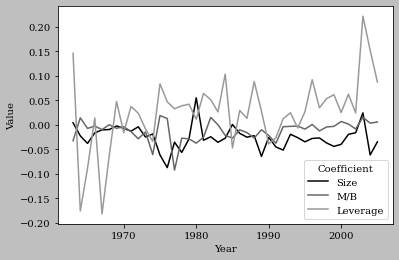

##### Replication Khan and Watt - Full Sample #####


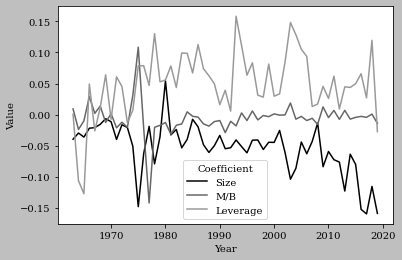

##### Full Sample Basic #####


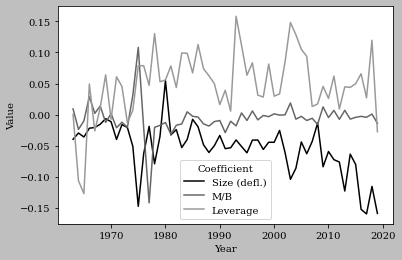

##### Full Sample KW #####


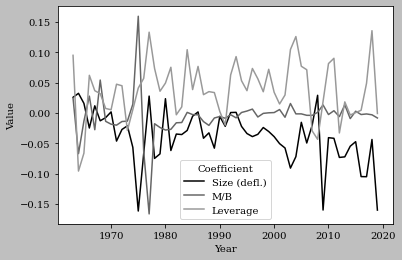

In [13]:
# Plot coefs over time
print('##### Replication Khan and Watt #####')
cs.plot_time_coefs(specparam_rep)
print('##### Replication Khan and Watt - Full Sample #####')
cs.plot_time_coefs(specparam_rep, fullsample=True)
print('##### Full Sample Basic #####')
cs.plot_time_coefs(specparam_basic, fullsample=True)
print('##### Full Sample KW #####')
cs.plot_time_coefs(specparam_kw, fullsample=True)


G Score


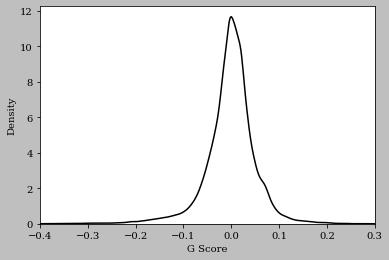

G+C Scores


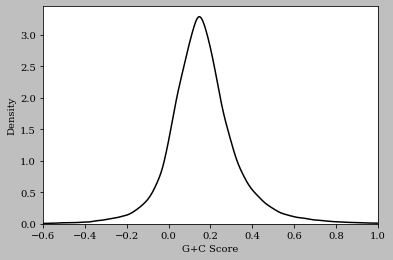

In [152]:
# Densities g and g+c scores
print('G Score')
xlim=(-.4, .3)
cs.plot_score_density('g_Lfmy', data, specparam_basic, sample='full', xlim=xlim, score='G Score')
print('G+C Scores')
xlim=(-.6, 1.)
cs.plot_score_density('gc_Lfmy', data, specparam_basic, sample='full', xlim=xlim, score='G+C Score')


## Analysis of negative G and G+C observations

In [165]:
cs.desc_stats(data[data.g_Lfmy < 0], specparam_basic, suffix='_neg_g_kw')

count       mean        std        min       25%  \
Earnings        111029  -0.019949   0.239214  -2.796728 -0.046232   
Return          111029   0.172834   0.968793  -0.962464 -0.326069   
Size            111029   5.184422   2.067739  -0.098364  3.640893   
M/B ratio       111029   2.712258   5.766837 -60.220364  0.975875   
Leverage        111029   0.860122   1.673811   0.000000  0.036075   
Volatility      110484   0.036009   0.020652   0.001706  0.020663   
NOAcc            86616  -0.031380   0.137432  -3.571336 -0.045902   
CFOA            103705   0.016758   0.236476  -4.808947 -0.007560   
Inv. Cycle      106350   0.042244   0.040111   0.000000  0.015004   
Age             111029  16.945719  14.434735   0.865753  7.002740   
Problit          78002   0.036417   0.157615   0.000000  0.000662   
PIN              61907   0.251944   0.138052   0.000000  0.149000   
Bid-Ask Spread   95134   0.023654   0.032307   0.000118  0.002155   

                         50%        75%        max  
Earnings        3.928275e-02   0.079955   1.150493  
Return         -5.960464e-08   0.366062  12.904747  
Size            5.033717e+00   6.653676  11.532546  
M/B ratio       1.594183e+00   2.847087  79.906525  
Leverage        2.943421e-01   0.910152  22.361755  
Volatility      3.119162e-02   0.045983   0.144385  
NOAcc          -1.251818e-02   0.006069   0.708343  
CFOA            5.354966e-02   0.116562   0.611941  
Inv. Cycle      3.528581e-02   0.056853   0.634297  
Age             1.249589e+01  22.512329  94.063011  
Problit         1.851796e-03   0.005132   1.000000  
PIN             2.220000e-01   0.325000   1.000000  
Bid-Ask Spread  1.158345e-02   0.032173   0.280801

In [166]:
cs.desc_stats(data[data.gc_Lfmy < 0], specparam_basic, suffix='_neg_gc_kw')

count       mean        std        min        25%        50%  \
Earnings        26350   0.047558   0.111426  -2.796728   0.030591   0.056217   
Return          26350   0.385659   0.956419  -0.889115  -0.037054   0.192537   
Size            26350   8.272650   1.870311   0.456713   7.288886   8.489159   
M/B ratio       26350   5.744407   9.236001 -52.704338   1.754915   3.051690   
Leverage        26350   0.334745   0.560035   0.000000   0.047407   0.169824   
Volatility      26203   0.022977   0.013286   0.004184   0.014384   0.019036   
NOAcc           22673  -0.015889   0.096765  -2.631633  -0.031190  -0.009480   
CFOA            25573   0.094643   0.194295  -4.808947   0.054253   0.108209   
Inv. Cycle      25392   0.045951   0.035333   0.000000   0.025237   0.039625   
Age             26350  27.176363  20.468328   1.000000  11.005480  21.517809   
Problit         20748   0.013278   0.078843   0.000000   0.001838   0.003563   
PIN             10197   0.131802   0.079845   0.000000   0.083000   0.113000   
Bid-Ask Spread  19449   0.004869   0.011445   0.000118   0.000337   0.000890   

                      75%        max  
Earnings         0.083260   1.150493  
Return           0.504352  12.904747  
Size             9.576261  11.532546  
M/B ratio        5.838320  92.052177  
Leverage         0.403785  11.411613  
Volatility       0.027394   0.144385  
NOAcc            0.006005   0.708343  
CFOA             0.168882   0.611941  
Inv. Cycle       0.058746   0.634297  
Age             40.027397  94.063011  
Problit          0.006599   1.000000  
PIN              0.159000   1.000000  
Bid-Ask Spread   0.005482   0.261526

In [ ]:
df = data[data.gc_Lfmy < 0]

# Cross-Validation Neural Network

## Basic specification

      n_iterations  layer_size  learning_rate   r2valid       std
9             5100          50          0.001  0.204791  0.002757
19            5200          50          0.001  0.205181  0.002716
29            5300          50          0.001  0.205495  0.002601
39            5400          50          0.001  0.205776  0.002483
49            5500          50          0.001  0.206052  0.002382
...            ...         ...            ...       ...       ...
1046         15500          35          0.001  0.208744  0.002780
1056         15600          35          0.001  0.208708  0.002938
1066         15700          35          0.001  0.208587  0.003038
1076         15800          35          0.001  0.208429  0.003134
1086         15900          35          0.001  0.208247  0.003375

[109 rows x 5 columns]


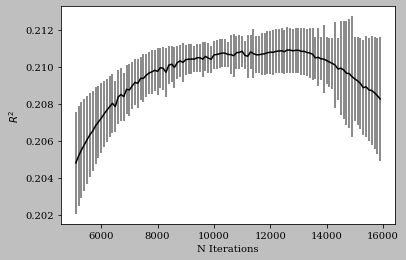

      n_iterations  layer_size  learning_rate   r2valid       std
1080         15900           5          0.001  0.200615  0.002689
1081         15900          10          0.001  0.207443  0.002414
952          14600          15          0.001  0.209658  0.001820
873          13800          20          0.001  0.209895  0.001654
754          12600          25          0.001  0.210902  0.001222
695          12000          30          0.001  0.210451  0.000922
766          12700          35          0.001  0.210728  0.001067
527          10300          40          0.001  0.210361  0.000677
548          10500          45          0.001  0.209913  0.000801
599          11000          50          0.001  0.210837  0.000841


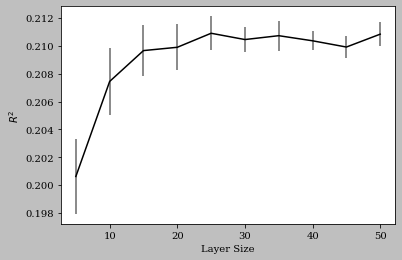

     n_iterations  layer_size  learning_rate   r2valid       std
754         12600          25          0.001  0.210902  0.001222


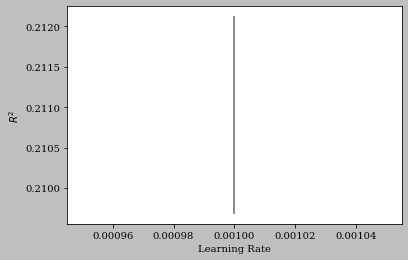

In [6]:
# Without years FE
cs.plot_cv(specparam_basic, 'nn', yfe=False, min_niter=5000, max_niter=16000, params={})#, 'layer_size': 50})

In [5]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
#opt_basic = {'n_iterations': 4000, 'layer_size': 50, 'learning_rate': .005, 'verbose': 1}
#opt_basic = {'n_iterations': 9000, 'layer_size': 70, 'learning_rate': .005, 'verbose': 1} # 04-16-2021
#opt_basic = {'n_iterations': 10000, 'layer_size': 10, 'learning_rate': 2.5e-3, 'verbose': 1} # 04-20-2021 (n_iterations=10000)
opt_basic = {'n_iterations': 12000, 'layer_size': 25, 'learning_rate': 1e-3, 'verbose': 1} # 05-26-2021 (learning_rate=1e-3)

     n_iterations  layer_size  learning_rate   r2valid       std
7            1100          40          0.001  0.263020  0.015483
17           1200          40          0.001  0.266261  0.014410
27           1300          40          0.001  0.268985  0.013494
37           1400          40          0.001  0.271301  0.012670
47           1500          40          0.001  0.273312  0.011930
57           1600          40          0.001  0.275065  0.011245
67           1700          40          0.001  0.276599  0.010595
77           1800          40          0.001  0.277997  0.010053
87           1900          40          0.001  0.279220  0.009534
97           2000          40          0.001  0.280307  0.009058
107          2100          40          0.001  0.281230  0.008609
117          2200          40          0.001  0.282110  0.008214
127          2300          40          0.001  0.282848  0.007839
137          2400          40          0.001  0.283471  0.007478
147          2500        

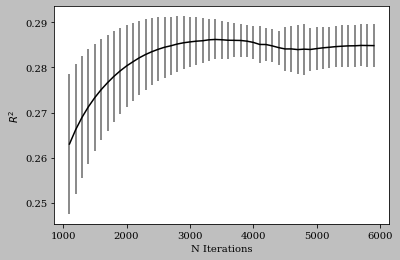

     n_iterations  layer_size  learning_rate   r2valid       std
480          5900           5          0.001  0.269707  0.007881
461          5700          10          0.001  0.282581  0.003245
462          5700          15          0.001  0.284857  0.004644
333          4400          20          0.001  0.281234  0.005272
304          4100          25          0.001  0.281532  0.004982
355          4600          30          0.001  0.284083  0.005117
266          3700          35          0.001  0.284868  0.004831
237          3400          40          0.001  0.286178  0.004433
288          3900          45          0.001  0.282900  0.003771
319          4200          50          0.001  0.283243  0.002847


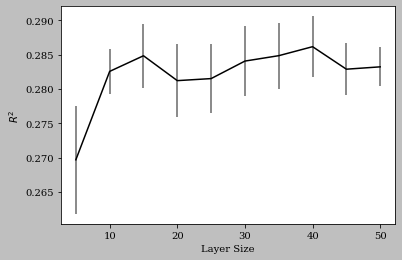

     n_iterations  layer_size  learning_rate   r2valid       std
237          3400          40          0.001  0.286178  0.004433


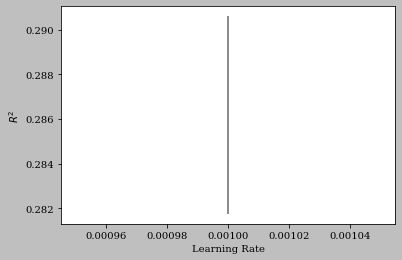

In [8]:
# With years FE
cs.plot_cv(specparam_basic, 'nn', yfe=True, min_niter=1000, max_niter=6000)#, params={'layer_size':40})

In [6]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
#opt_basic_yfe = {'n_iterations': 4000, 'layer_size': 70, 'learning_rate': .001, 'verbose': 1}
#opt_basic_yfe = {'n_iterations': 5000, 'layer_size': 70, 'learning_rate': .001, 'verbose': 1} # 04-16-2021
#opt_basic_yfe = {'n_iterations': 10000, 'layer_size': 10, 'learning_rate': 5e-4, 'verbose': 1} # 04-20-2021 (n_iterations=10000)
opt_basic_yfe = {'n_iterations': 4000, 'layer_size': 40, 'learning_rate': 1e-3, 'verbose': 1} # 05-26-2021 (learning_rate=1e-3)

## KW specification

     n_iterations  layer_size  learning_rate   r2valid       std
7            8100          40          0.001  0.439444  0.004676
17           8200          40          0.001  0.439753  0.004674
27           8300          40          0.001  0.439803  0.004808
37           8400          40          0.001  0.440337  0.004638
47           8500          40          0.001  0.440525  0.004556
..            ...         ...            ...       ...       ...
641         14500          10          0.001  0.435165  0.005221
651         14600          10          0.001  0.434787  0.005632
661         14700          10          0.001  0.435049  0.006020
671         14800          10          0.001  0.434982  0.006513
681         14900          10          0.001  0.434778  0.006952

[69 rows x 5 columns]


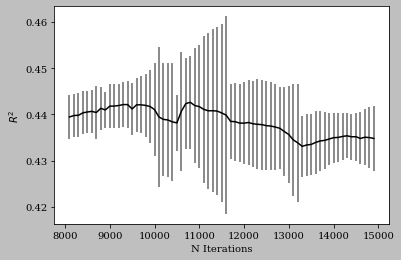

     n_iterations  layer_size  learning_rate   r2valid       std
400         12100           5          0.001  0.402433  0.007758
621         14300          10          0.001  0.435363  0.004885
402         12100          15          0.001  0.432008  0.014542
323         11300          20          0.001  0.439084  0.006778
134          9400          25          0.001  0.438779  0.006621
125          9300          30          0.001  0.437586  0.006146
136          9400          35          0.001  0.434151  0.012501
277         10800          40          0.001  0.442614  0.010037
88           8900          45          0.001  0.439442  0.007503
9            8100          50          0.001  0.437931  0.008691


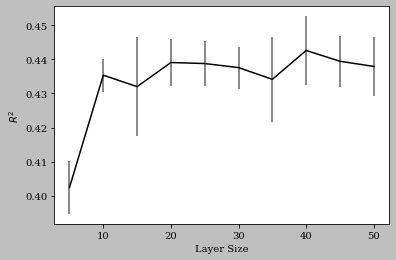

     n_iterations  layer_size  learning_rate   r2valid       std
277         10800          40          0.001  0.442614  0.010037


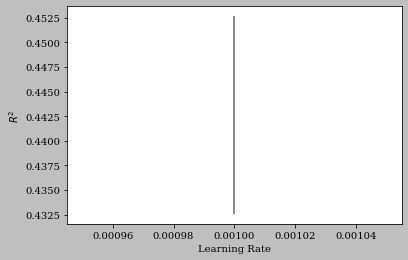

In [23]:
# Without years FE
cs.plot_cv(specparam_kw, 'nn', yfe=False, min_niter=8000, max_niter=15000)#, params={'layer_size':10})#,'layer_size': 30})

In [7]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
#opt_kw = {'n_iterations': 7000, 'layer_size': 30, 'learning_rate': .005, 'verbose': 1}
#opt_kw = {'n_iterations': 5000, 'layer_size': 40, 'learning_rate': .005, 'verbose': 1} Gives negative correlation with volatility
#opt_kw = {'n_iterations': 8000, 'layer_size': 30, 'learning_rate': .005, 'verbose': 1} # 04-16-2021
#opt_kw = {'n_iterations': 14000, 'layer_size': 10, 'learning_rate': .001, 'verbose': 1}
#opt_kw = {'n_iterations': 10000, 'layer_size': 10, 'learning_rate': 2.5e-3, 'verbose': 1} # 04-20-2021 (n_iterations=10000)
opt_kw = {'n_iterations': 10000, 'layer_size': 40, 'learning_rate': 1e-3, 'verbose': 1} # 05-26-2021 (learning_rate=1e-3)

     n_iterations  layer_size  learning_rate   r2valid       std
9            2100          50          0.001  0.452596  0.009724
19           2200          50          0.001  0.454934  0.009004
29           2300          50          0.001  0.457090  0.008376
39           2400          50          0.001  0.459018  0.007794
49           2500          50          0.001  0.460770  0.007393
59           2600          50          0.001  0.462309  0.007003
69           2700          50          0.001  0.463630  0.006539
79           2800          50          0.001  0.464945  0.006382
89           2900          50          0.001  0.466062  0.006104
99           3000          50          0.001  0.467075  0.005832
109          3100          50          0.001  0.468016  0.005723
119          3200          50          0.001  0.468823  0.005598
129          3300          50          0.001  0.469587  0.005496
139          3400          50          0.001  0.470241  0.005400
149          3500        

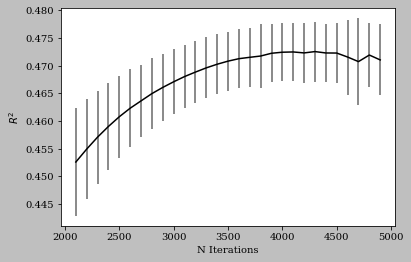

     n_iterations  layer_size  learning_rate   r2valid       std
280          4900           5          0.001  0.432787  0.015090
261          4700          10          0.001  0.457367  0.019780
282          4900          15          0.001  0.468142  0.006552
283          4900          20          0.001  0.469872  0.009747
104          3100          25          0.001  0.453357  0.018760
205          4100          30          0.001  0.463345  0.010240
106          3100          35          0.001  0.453610  0.023767
197          4000          40          0.001  0.467810  0.005542
168          3700          45          0.001  0.468330  0.011797
229          4300          50          0.001  0.472523  0.005405


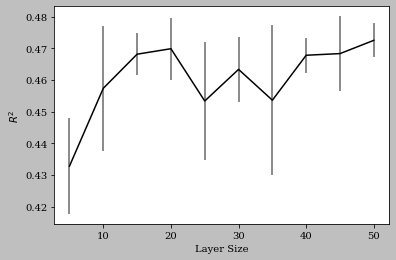

     n_iterations  layer_size  learning_rate   r2valid       std
229          4300          50          0.001  0.472523  0.005405


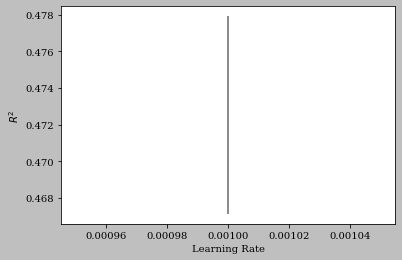

In [25]:
# With years FE
cs.plot_cv(specparam_kw, 'nn', yfe=True, min_niter=2000, max_niter=5000)#, params={'layer_size': 25})#, 'layer_size': 25})

In [8]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
#opt_kw_yfe = {'n_iterations': 4000, 'layer_size': 25, 'learning_rate': .001, 'verbose': 1}
#opt_kw_yfe = {'n_iterations': 5000, 'layer_size': 25, 'learning_rate': .001, 'verbose': 1} # 04-16-2021
#opt_kw_yfe = {'n_iterations': 10000, 'layer_size': 10, 'learning_rate': 5e-4, 'verbose': 1} # 04-20-2021 (n_iterations=10000)
opt_kw_yfe = {'n_iterations': 4500, 'layer_size': 50, 'learning_rate': 1e-3, 'verbose': 1} # 05-26-2021 (learning_rate=1e-3)

# Training

## Linear

In [9]:
recompute = True
# Train the models
L_basic_train, L_r2_basic_train = cs.train_linear(data, specparam_basic, fullsample=False, recompute=recompute)
L_basic, L_r2_basic= cs.train_linear(data, specparam_basic, fullsample=True, recompute=recompute)
L_kw_train, L_r2_kw_train = cs.train_linear(data, specparam_kw, fullsample=False, recompute=recompute)
L_kw, L_r2_kw= cs.train_linear(data, specparam_kw, fullsample=True, recompute=recompute)
print("##### R2 Training #####")
print('Basic: ', L_r2_basic_train)
print('KW: ', L_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', L_r2_basic)
print('KW: ', L_r2_kw)

##### R2 Training #####
Basic:  {'train': 0.11493917755002714, 'test': 0.10726935578987629}
KW:  {'train': 0.3154522862455491, 'test': 0.31547973204261526}
##### R2 Full #####
Basic:  {'full': 0.11352603974242947}
KW:  {'full': 0.31565056257157664}


In [10]:
# Compute
data['c_L_basic'] = cs.c(L_basic, data, specparam_basic)
data['c_L_kw'] = cs.c(L_kw, data, specparam_kw)

## FM Yearly

In [11]:
Lfmy_r2_basic_train = cs.r2_fmy(data, specparam_basic, fullsample=False)
Lfmy_r2_basic = cs.r2_fmy(data, specparam_basic, fullsample=True)
Lfmy_r2_kw_train = cs.r2_fmy(data, specparam_kw, fullsample=False)
Lfmy_r2_kw = cs.r2_fmy(data, specparam_kw, fullsample=True)
print("##### R2 Training #####")
print('Basic: ', Lfmy_r2_basic_train)
print('KW: ', Lfmy_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', Lfmy_r2_basic)
print('KW: ', Lfmy_r2_kw)

##### R2 Training #####
Basic:  {'train': 0.25576862248708077, 'test': 0.22917042408559052}
KW:  {'train': 0.4492393685363919, 'test': 0.40473973094548465}
##### R2 Full #####
Basic:  {'full': 0.2523009827187558}
KW:  {'full': 0.4450226675727841}


In [12]:
# Compute
data['c_Lfmy_basic'] = cs.c_score_fmy(data, specparam_basic, fullsample=True)
data['c_Lfmy_kw'] = cs.c_score_fmy(data, specparam_kw, fullsample=True)

## Neural Networks

### Without Years FE

In [45]:
###### NOTE: Long to compute. Run externally! #####
# Without Years FE
recompute = True
nmodels=100

print("#### Train for specification 'basic' #####")
print(opt_basic)
print('Training Sample')
cs.train_nn(data, specparam_basic, cv=False, fullsample=False, params=opt_basic, recompute=recompute, yfe=False, nmodels=nmodels)
print('Full Sample')
cs.train_nn(data, specparam_basic, cv=False, fullsample=True, params=opt_basic, recompute=recompute, yfe=False, nmodels=nmodels)
print("#### Train for specification 'kw' #####")
print(opt_kw)
print('Training Sample')
cs.train_nn(data, specparam_kw, cv=False, fullsample=False, params=opt_kw, recompute=recompute, yfe=False, nmodels=nmodels)
print('Full Sample')
cs.train_nn(data, specparam_kw, cv=False, fullsample=True, params=opt_kw, recompute=recompute, yfe=False, nmodels=nmodels)

#### Train for specification 'basic' #####
{'n_iterations': 12000, 'layer_size': 25, 'learning_rate': 0.001, 'verbose': 1}
Training Sample
Train 100 models.
Model 0
{'train': 0.21661317348480225, 'test': 0.20091015100479126}
Model 1
 87%

KeyboardInterrupt: 

In [13]:
nmodels=100
model0index=0
NN_r2_basic_train = cs.r2_nn(data, specparam_basic, fullsample=False, yfe=False, nmodels=nmodels, model0index=model0index)
NN_r2_basic = cs.r2_nn(data, specparam_basic, fullsample=True, yfe=False, nmodels=nmodels, model0index=model0index)
NN_r2_kw_train = cs.r2_nn(data, specparam_kw, fullsample=False, yfe=False, nmodels=nmodels, model0index=model0index)
NN_r2_kw = cs.r2_nn(data, specparam_kw, fullsample=True, yfe=False, nmodels=nmodels, model0index=model0index)
print("##### R2 Training #####")
print('Basic: ', NN_r2_basic_train)
print('KW: ', NN_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', NN_r2_basic)
print('KW: ', NN_r2_kw)

##### R2 Training #####
Basic:  {'train': 0.2175299135144786, 'test': 0.20363554361449765}
KW:  {'train': 0.48209017359710327, 'test': 0.4554662312173511}
##### R2 Full #####
Basic:  {'full': 0.21509175401590053}
KW:  {'full': 0.4773576512416635}


### With Years FE

In [ ]:
###### NOTE: Long to compute. Run externally! #####
# With Years FE
recompute = True
nmodels=100

print("#### Train for specification 'basic' #####")
print(opt_basic_yfe)
print('Training Sample')
cs.train_nn(data, specparam_basic, cv=False, fullsample=False, params=opt_basic_yfe, recompute=recompute, yfe=True, nmodels=nmodels)
print('Full Sample')
cs.train_nn(data, specparam_basic, cv=False, fullsample=True, params=opt_basic_yfe, recompute=recompute, yfe=True, nmodels=nmodels)
print("#### Train for specification 'kw' #####")
print(opt_kw_yfe)
print('Training Sample')
cs.train_nn(data, specparam_kw, cv=False, fullsample=False, params=opt_kw_yfe, recompute=recompute, yfe=True, nmodels=nmodels)
print('Full Sample')
cs.train_nn(data, specparam_kw, cv=False, fullsample=True, params=opt_kw_yfe, recompute=recompute, yfe=True, nmodels=nmodels)


In [14]:
nmodels=100
NNy_r2_basic_train = cs.r2_nn(data, specparam_basic, fullsample=False, yfe=True, nmodels=nmodels)
NNy_r2_basic = cs.r2_nn(data, specparam_basic, fullsample=True, yfe=True, nmodels=nmodels)
NNy_r2_kw_train = cs.r2_nn(data, specparam_kw, fullsample=False, yfe=True, nmodels=nmodels)
NNy_r2_kw = cs.r2_nn(data, specparam_kw, fullsample=True, yfe=True, nmodels=nmodels)
print("##### R2 Training #####")
print('Basic: ', NNy_r2_basic_train)
print('KW: ', NNy_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', NNy_r2_basic)
print('KW: ', NNy_r2_kw)

##### R2 Training #####
Basic:  {'train': 0.32071169348167694, 'test': 0.2904696762045256}
KW:  {'train': 0.5540041708310888, 'test': 0.4997011986352625}
##### R2 Full #####
Basic:  {'full': 0.313910432246598}
KW:  {'full': 0.5442821806327778}


### Compute

In [15]:
nmodels=100
model0index=0
# C scores
data['c_NN_basic'] = cs.c_score_nn(data, specparam_basic, fullsample=True, yfe=False, nmodels=nmodels, model0index=model0index)
data['c_NN_kw'] = cs.c_score_nn(data, specparam_kw, fullsample=True, yfe=False, nmodels=nmodels, model0index=model0index)
data['c_NNy_basic'] = cs.c_score_nn(data, specparam_basic, fullsample=True, yfe=True, nmodels=nmodels, model0index=model0index)
data['c_NNy_kw'] = cs.c_score_nn(data, specparam_kw, fullsample=True, yfe=True, nmodels=nmodels, model0index=model0index)
# G scores
data['g_L_basic'] = cs.g(L_basic, data, specparam_basic)
data['g_L_kw'] = cs.g(L_kw, data, specparam_kw)
data['g_Lfmy_basic'] = cs.g_score_fmy(data, specparam_basic, fullsample=True)
data['g_Lfmy_kw'] = cs.g_score_fmy(data, specparam_kw, fullsample=True)
data['g_NN_basic'] = cs.g_score_nn(data, specparam_basic, fullsample=True, yfe=False, nmodels=nmodels, model0index=model0index)
data['g_NN_kw'] = cs.g_score_nn(data, specparam_kw, fullsample=True, yfe=False, nmodels=nmodels, model0index=model0index)
data['g_NNy_basic'] = cs.g_score_nn(data, specparam_basic, fullsample=True, yfe=True, nmodels=nmodels, model0index=model0index)
data['g_NNy_kw'] = cs.g_score_nn(data, specparam_kw, fullsample=True, yfe=True, nmodels=nmodels, model0index=model0index)
# G+C Scores
data['gc_L_basic'] = data.g_L_basic + data.c_L_basic
data['gc_L_kw'] = data.g_L_kw + data.c_L_kw
data['gc_Lfmy_basic'] = data.g_Lfmy_basic + data.c_Lfmy_basic
data['gc_Lfmy_kw'] = data.g_Lfmy_kw + data.c_Lfmy_kw
data['gc_NN_basic'] = data.g_NN_basic + data.c_NN_basic
data['gc_NN_kw'] = data.g_NN_kw + data.c_NN_kw
data['gc_NNy_basic'] = data.g_NNy_basic + data.c_NNy_basic
data['gc_NNy_kw'] = data.g_NNy_kw + data.c_NNy_kw

### Train the C networks on models' average

In [16]:
# Without years FE
## Basic
p = specparam_basic
df = cs.full_sample(data, p)
X, Y = cs.get_sets(df, p, p['features_all'], yfe=False)
opt = opt_basic.copy()
opt['verbose'] = 2
print('Basic: ', opt)
X = df['c_NN_basic']
nn_basic = cs.CNetwork(**opt)
nn_basic.fit(Y,X)
## KW
p = specparam_kw
df = cs.full_sample(data, p)
X, Y = cs.get_sets(df, p, p['features_all'], yfe=False)
opt = opt_kw.copy()
opt['verbose'] = 2
#opt['layer_size'] = 30
opt['n_iterations'] = 30000
print('KW: ', opt)
X = df['c_NN_kw']
nn_kw = cs.CNetwork(**opt)
nn_kw.fit(Y,X)

# With years FE
## Basic
p = specparam_basic
df = cs.full_sample(data, p)
X, Y = cs.get_sets(df, p, p['features_all'], yfe=True)
opt = opt_basic_yfe.copy()
opt['verbose'] = 2
print('Basic YFE: ', opt)
X = df['c_NNy_basic']
nny_basic = cs.CNetwork(**opt)
nny_basic.fit(Y,X)
## KW
p = specparam_kw
df = cs.full_sample(data, p)
X, Y = cs.get_sets(df, p, p['features_all'], yfe=True)
opt = opt_kw_yfe.copy()
opt['verbose'] = 2
print('KW YFE: ', opt)
X = df['c_NNy_kw']
nny_kw = cs.CNetwork(**opt)
nny_kw.fit(Y,X)


Basic:  {'n_iterations': 12000, 'layer_size': 25, 'learning_rate': 0.001, 'verbose': 2}
step: 0, loss: 0.099959, R2: -0.179457
step: 1200, loss: 0.000247, R2: 0.914669
step: 2400, loss: 0.000138, R2: 0.951713
step: 3600, loss: 0.000093, R2: 0.966939
step: 4800, loss: 0.000069, R2: 0.975255
step: 6000, loss: 0.000050, R2: 0.981949
step: 7200, loss: 0.000041, R2: 0.985118
step: 8400, loss: 0.000037, R2: 0.986433
step: 9600, loss: 0.000035, R2: 0.987224
step: 10800, loss: 0.000033, R2: 0.987799
KW:  {'n_iterations': 30000, 'layer_size': 40, 'learning_rate': 0.001, 'verbose': 2}
step: 0, loss: 0.059760, R2: -0.636322
step: 3000, loss: 0.000110, R2: 0.761077
step: 6000, loss: 0.000059, R2: 0.872551
step: 9000, loss: 0.000050, R2: 0.892855
step: 12000, loss: 0.000043, R2: 0.907666
step: 15000, loss: 0.000038, R2: 0.918374
step: 18000, loss: 0.000034, R2: 0.925850
step: 21000, loss: 0.000032, R2: 0.930967
step: 24000, loss: 0.000030, R2: 0.934900
step: 27000, loss: 0.000029, R2: 0.937870
Basi

In [17]:
# Compute
## Basic No FE
p = specparam_basic
X, Y = cs.get_sets(data, p, p['features_all'], yfe=False)
data['c_NN_basic_final_C'] = nn_basic.predict(Y)
## KW No FE
p = specparam_kw
X, Y = cs.get_sets(data, p, p['features_all'], yfe=False)
data['c_NN_kw_final_C'] = nn_kw.predict(Y)
## Basic YFE
p = specparam_basic
X, Y = cs.get_sets(data, p, p['features_all'], yfe=True)
data['c_NNy_basic_final_C'] = nny_basic.predict(Y)
## KW YFE
p = specparam_kw
X, Y = cs.get_sets(data, p, p['features_all'], yfe=True)
data['c_NNy_kw_final_C'] = nny_kw.predict(Y)

In [18]:
# Save the models for external use
nn_basic.model.save(folder+'/nn_basic.h5')
nn_kw.model.save(folder+'/nn_kw.h5')
nny_basic.model.save(folder+'/nny_basic.h5')
nny_kw.model.save(folder+'/nny_kw.h5')

In [19]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(nn_basic.model, folder+'/nn_basic_js')
tfjs.converters.save_keras_model(nn_kw.model, folder+'/nn_kw_js')
tfjs.converters.save_keras_model(nny_basic.model, folder+'/nny_basic_js')
tfjs.converters.save_keras_model(nny_kw.model, folder+'/nny_kw_js')

In [20]:
# Save data features for use in webapp
p = specparam_kw
df = data[['gvkey', 'fyear']+p['features']]
df.to_csv(folder+'/data_kw.csv', index=False)

In [101]:
# Save C scores for distribution
cols_cscore = ['c_L_basic', 'c_L_kw',
               'c_Lfmy_basic', 'c_Lfmy_kw',
               'c_NN_basic', 'c_NN_kw',
               'c_NNy_basic', 'c_NNy_kw',
               'c_NN_basic_final_C', 'c_NN_kw_final_C',
               'c_NNy_basic_final_C', 'c_NNy_kw_final_C']
data_c = data[['gvkey', 'fyear']+cols_cscore]
data_c.columns = ['gvkey', 'fyear', 'L1', 'L2', 'L1y', 'L2y', 'MLC1_mean', 'MLC2_mean', 'MLC1y_mean', 'MLC2y_mean', 'MLC1', 'MLC2', 'MLC1y', 'MLC2y']
data_c.to_parquet('data/cscores_'+folder+'.parquet', compression=None, index=False)
data_c.to_csv('data/cscores_'+folder+'.csv', index=False)
data_raw = pd.read_parquet("data/data.parquet")
data_raw = data_raw[data_raw.fyear.notnull()]
data_c = data_raw.merge(data_c, how='left', on=['gvkey', 'fyear'])
data_c.to_parquet('data/data_'+folder+'.parquet', compression=None, index=False)
data_c.to_csv('data/data_'+folder+'.csv', index=False)


PermissionError: [Errno 13] Permission denied: 'data/cscores_results_06-21-2021.parquet'

# Measures Analyses

## Fit and Trainable Parameters

In [28]:
import tensorflow.keras.backend as K

# Trainable parameters to fit earnings
nyears = 57
ncoefs_full = {}
ncoefs_full['L1'] = (3+1)*4
ncoefs_full['L1y'] = (3+1)*4*nyears
nn = cs.load_full_model(specparam_basic, fullsample=False, yfe=False)
ncoefs_full['MLC1'] = np.sum([K.count_params(w) for w in nn.model.trainable_weights])
nn = cs.load_full_model(specparam_basic, fullsample=False, yfe=True)
ncoefs_full['MLC1y'] = np.sum([K.count_params(w) for w in nn.model.trainable_weights])

ncoefs_full['L2'] = (8+1)*4
ncoefs_full['L2y'] = (8+1)*4*nyears
nn = cs.load_full_model(specparam_kw, fullsample=False, yfe=False)
ncoefs_full['MLC2'] = np.sum([K.count_params(w) for w in nn.model.trainable_weights])
nn = cs.load_full_model(specparam_kw, fullsample=False, yfe=True)
ncoefs_full['MLC2y'] = np.sum([K.count_params(w) for w in nn.model.trainable_weights])

# Trainable parameters for C score
nyears = 57
ncoefs_c = {}
ncoefs_c['L1'] = (3+1)
ncoefs_c['L1y'] = (3+1)*nyears
ncoefs_c['MLC1'] = np.sum([K.count_params(w) for w in nn_basic.model.trainable_weights])
ncoefs_c['MLC1y'] = np.sum([K.count_params(w) for w in nny_basic.model.trainable_weights])

ncoefs_c['L2'] = (8+1)
ncoefs_c['L2y'] = (8+1)*nyears
ncoefs_c['MLC2'] = np.sum([K.count_params(w) for w in nn_kw.model.trainable_weights])
ncoefs_c['MLC2y'] = np.sum([K.count_params(w) for w in nny_kw.model.trainable_weights])

ncoefs = pd.DataFrame([ncoefs_full, ncoefs_c])
ncoefs.index = ['Full Model', 'C score']
#filename='ncoefs'
#ncoefs.to_latex(cs.folder_tables+filename+'.tex', escape=True)
#ncoefs


L1  L1y  MLC1  MLC1y  L2   L2y  MLC2  MLC2y
Full Model  16  912   504   9924  36  2052  1604  13404
C score      4  228   126   2481   9   513   401   3351

In [83]:
# Fit table
models = {'train_models': [L_r2_basic_train, Lfmy_r2_basic_train, NN_r2_basic_train, NNy_r2_basic_train, L_r2_kw_train, Lfmy_r2_kw_train, NN_r2_kw_train, NNy_r2_kw_train],
          'full_models': [L_r2_basic, Lfmy_r2_basic, NN_r2_basic, NNy_r2_basic, L_r2_kw, Lfmy_r2_kw, NN_r2_kw, NNy_r2_kw]}
labels = ['L1', 'L1y', 'MLC1', 'MLC1y', 'L2', 'L2y', 'MLC2', 'MLC2y']
fit = cs.fit_table(models, labels, ncoefs, suffix='')
fit

L1         L1y        MLC1        MLC1y  \
{\bf R squared}                     NaN         NaN         NaN          NaN   
Training Sample                0.114939    0.255769    0.217530     0.320712   
Test Sample                    0.107269    0.229170    0.203636     0.290470   
Full Sample                    0.113526    0.252301    0.215092     0.313910   
{\bf Number of coefficients}        NaN         NaN         NaN          NaN   
Full Model                    16.000000  912.000000  504.000000  9924.000000   
C score                        4.000000  228.000000  126.000000  2481.000000   

                                     L2          L2y         MLC2  \
{\bf R squared}                     NaN          NaN          NaN   
Training Sample                0.315452     0.449239     0.482090   
Test Sample                    0.315480     0.404740     0.455466   
Full Sample                    0.315651     0.445023     0.477358   
{\bf Number of coefficients}        NaN          NaN          NaN   
Full Model                    36.000000  2052.000000  1604.000000   
C score                        9.000000   513.000000   401.000000   

                                     MLC2y  
{\bf R squared}                        NaN  
Training Sample                   0.554004  
Test Sample                       0.499701  
Full Sample                       0.544282  
{\bf Number of coefficients}           NaN  
Full Model                    13404.000000  
C score                        3351.000000

## Correlations

### Using average

In [33]:
variables = ['c_L_basic', 'c_Lfmy_basic', 'c_NN_basic', 'c_NNy_basic', 'c_L_kw', 'c_Lfmy_kw', 'c_NN_kw', 'c_NNy_kw']
legends = ['L1', 'L1y', 'MLC1', 'MLC1y','L2', 'L2y', 'MLC2', 'MLC2y']
# Correlation between C scores
cs.corr_table(variables, specparam_kw, legends, data, suffix='_average')

L1      L1y     MLC1    MLC1y       L2      L2y     MLC2  \
L1                  NaN   0.718*   0.662*   0.614*   0.805*   0.522*   0.489*   
L1y              0.735*      NaN   0.499*   0.776*   0.578*   0.599*   0.329*   
MLC1             0.774*   0.587*      NaN   0.574*   0.640*   0.413*   0.562*   
MLC1y            0.633*   0.760*   0.675*      NaN   0.580*   0.454*   0.404*   
L2               0.785*   0.573*   0.712*   0.607*      NaN   0.549*   0.576*   
L2y              0.562*   0.535*   0.502*   0.413*   0.604*      NaN   0.335*   
MLC2             0.592*   0.419*   0.654*   0.480*   0.770*   0.480*      NaN   
MLC2y            0.446*   0.346*   0.433*   0.511*   0.694*   0.467*   0.647*   
Size            -0.901*  -0.579*  -0.633*  -0.408*  -0.678*  -0.514*  -0.546*   
M/B ratio       -0.571*  -0.411*  -0.677*  -0.598*  -0.606*  -0.387*  -0.525*   
Leverage         0.331*   0.283*   0.467*   0.473*   0.398*   0.302*   0.463*   
Volatility       0.405*   0.323*   0.182*   0.113*   0.074*   0.192*   0.046*   
Problit         -0.187*  -0.114*  -0.011*   0.084*  -0.081*  -0.069*   0.034*   
PIN              0.617*   0.531*   0.491*   0.409*   0.454*   0.412*   0.347*   
Bid-Ask Spread   0.690*   0.441*   0.490*   0.234*   0.424*   0.501*   0.328*   

                  MLC2y     Size M/B ratio Leverage Volatility  Problit  \
L1               0.466*  -0.860*   -0.426*   0.524*     0.376*   0.298*   
L1y              0.441*  -0.539*   -0.223*   0.491*     0.287*   0.306*   
MLC1             0.378*  -0.557*   -0.268*   0.414*     0.150*   0.183*   
MLC1y            0.645*  -0.360*   -0.236*   0.617*     0.149*   0.365*   
L2               0.588*  -0.654*   -0.420*   0.521*     0.051*   0.277*   
L2y              0.498*  -0.471*   -0.163*   0.348*     0.162*   0.193*   
MLC2             0.506*  -0.464*   -0.135*   0.316*     0.047*   0.077*   
MLC2y               NaN  -0.346*   -0.151*   0.571*     0.025*   0.348*   
Size            -0.382*      NaN    0.128*  -0.142*    -0.416*  -0.085*   
M/B ratio       -0.465*   0.369*       NaN  -0.137*     0.054*  -0.038*   
Leverage         0.451*  -0.100*   -0.476*      NaN     0.078*   0.721*   
Volatility      -0.066*  -0.447*   -0.014*  -0.112*        NaN   0.160*   
Problit          0.075*   0.364*   -0.127*   0.557*    -0.092*      NaN   
PIN              0.198*  -0.645*   -0.304*   0.123*     0.109*  -0.378*   
Bid-Ask Spread   0.206*  -0.801*   -0.215*   0.023*     0.516*  -0.408*   

                    PIN Bid-Ask Spread  
L1               0.536*         0.534*  
L1y              0.422*         0.286*  
MLC1             0.433*         0.397*  
MLC1y            0.328*         0.191*  
L2               0.416*         0.336*  
L2y              0.307*         0.313*  
MLC2             0.307*         0.314*  
MLC2y            0.211*         0.220*  
Size            -0.574*        -0.641*  
M/B ratio       -0.130*        -0.056*  
Leverage         0.117*         0.071*  
Volatility       0.084*         0.569*  
Problit          0.017*         0.031*  
PIN                 NaN         0.507*  
Bid-Ask Spread   0.651*            NaN

### Using C model

In [34]:
variables = ['c_L_basic', 'c_Lfmy_basic', 'c_NN_basic_final_C', 'c_NNy_basic_final_C', 'c_L_kw', 'c_Lfmy_kw', 'c_NN_kw_final_C', 'c_NNy_kw_final_C']
legends = ['L1', 'L1y', 'MLC1', 'MLC1y','L2', 'L2y', 'MLC2', 'MLC2y']
# Correlation between C scores
cs.corr_table(variables, specparam_kw, legends, data, suffix='_final')

L1      L1y     MLC1    MLC1y       L2      L2y     MLC2  \
L1                  NaN   0.718*   0.668*   0.617*   0.805*   0.522*   0.508*   
L1y              0.735*      NaN   0.502*   0.780*   0.578*   0.599*   0.341*   
MLC1             0.775*   0.588*      NaN   0.581*   0.642*   0.414*   0.583*   
MLC1y            0.631*   0.762*   0.672*      NaN   0.583*   0.456*   0.421*   
L2               0.785*   0.573*   0.713*   0.606*      NaN   0.549*   0.597*   
L2y              0.562*   0.535*   0.502*   0.414*   0.604*      NaN   0.343*   
MLC2             0.576*   0.416*   0.640*   0.477*   0.750*   0.462*      NaN   
MLC2y            0.433*   0.337*   0.427*   0.498*   0.681*   0.461*   0.632*   
Size            -0.901*  -0.579*  -0.634*  -0.406*  -0.678*  -0.514*  -0.526*   
M/B ratio       -0.571*  -0.411*  -0.679*  -0.591*  -0.606*  -0.387*  -0.520*   
Leverage         0.331*   0.283*   0.468*   0.475*   0.398*   0.302*   0.446*   
Volatility       0.405*   0.323*   0.182*   0.112*   0.074*   0.192*   0.047*   
Problit         -0.187*  -0.114*  -0.010*   0.084*  -0.081*  -0.069*   0.039*   
PIN              0.617*   0.531*   0.491*   0.406*   0.454*   0.412*   0.321*   
Bid-Ask Spread   0.690*   0.441*   0.490*   0.235*   0.424*   0.501*   0.305*   

                  MLC2y     Size M/B ratio Leverage Volatility  Problit  \
L1               0.473*  -0.860*   -0.426*   0.524*     0.376*   0.298*   
L1y              0.447*  -0.539*   -0.223*   0.491*     0.287*   0.306*   
MLC1             0.386*  -0.561*   -0.269*   0.420*     0.151*   0.184*   
MLC1y            0.653*  -0.362*   -0.236*   0.620*     0.148*   0.367*   
L2               0.597*  -0.654*   -0.420*   0.521*     0.051*   0.277*   
L2y              0.500*  -0.471*   -0.163*   0.348*     0.162*   0.193*   
MLC2             0.521*  -0.480*   -0.145*   0.327*     0.048*   0.079*   
MLC2y               NaN  -0.351*   -0.153*   0.579*     0.025*   0.352*   
Size            -0.371*      NaN    0.128*  -0.142*    -0.416*  -0.085*   
M/B ratio       -0.453*   0.369*       NaN  -0.137*     0.054*  -0.038*   
Leverage         0.449*  -0.100*   -0.476*      NaN     0.078*   0.721*   
Volatility      -0.066*  -0.447*   -0.014*  -0.112*        NaN   0.160*   
Problit          0.078*   0.364*   -0.127*   0.557*    -0.092*      NaN   
PIN              0.187*  -0.645*   -0.304*   0.123*     0.109*  -0.378*   
Bid-Ask Spread   0.199*  -0.801*   -0.215*   0.023*     0.516*  -0.408*   

                    PIN Bid-Ask Spread  
L1               0.536*         0.534*  
L1y              0.422*         0.286*  
MLC1             0.439*         0.400*  
MLC1y            0.329*         0.192*  
L2               0.416*         0.336*  
L2y              0.307*         0.313*  
MLC2             0.315*         0.322*  
MLC2y            0.209*         0.224*  
Size            -0.574*        -0.641*  
M/B ratio       -0.130*        -0.056*  
Leverage         0.117*         0.071*  
Volatility       0.084*         0.569*  
Problit          0.017*         0.031*  
PIN                 NaN         0.507*  
Bid-Ask Spread   0.651*            NaN

## Densities of C scores

### Linear

Basic


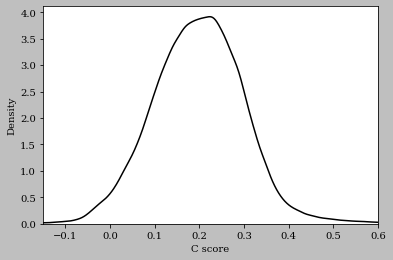

KW


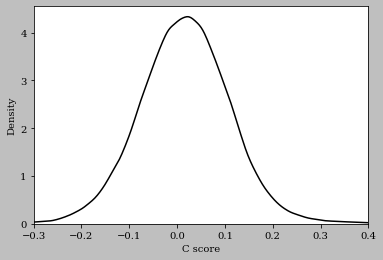

In [30]:
print('Basic')
xlim=(-0.15, 0.6)
cs.plot_score_density('c_L_basic', data, specparam_basic, sample='full', xlim=xlim)
print('KW')
xlim=(-0.3, 0.4)
cs.plot_score_density('c_L_kw', data, specparam_kw, sample='full', xlim=xlim)

### FM Yearly

Basic


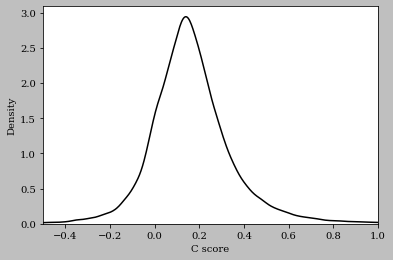

KW


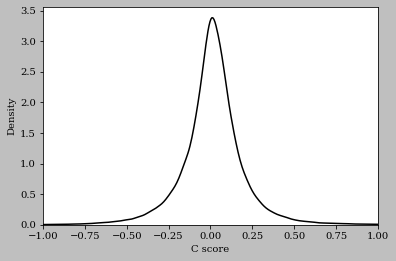

In [31]:
xlim=None
print('Basic')
xlim=(-.5, 1)
cs.plot_score_density('c_Lfmy_basic', data, specparam_basic, sample='full', xlim=xlim)
print('KW')
xlim=(-1,1)
cs.plot_score_density('c_Lfmy_kw', data, specparam_kw, sample='full', xlim=xlim)

### NN without YFE

Basic


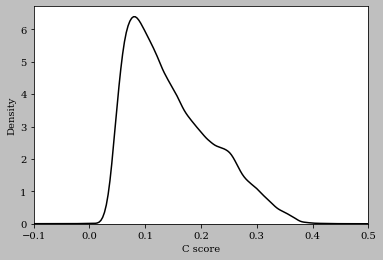

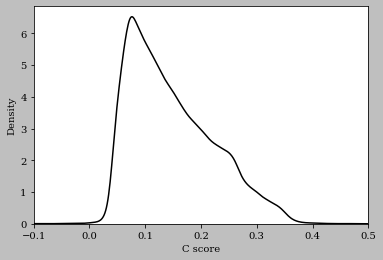

KW


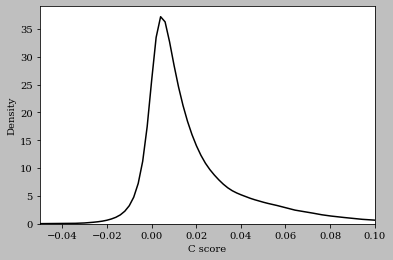

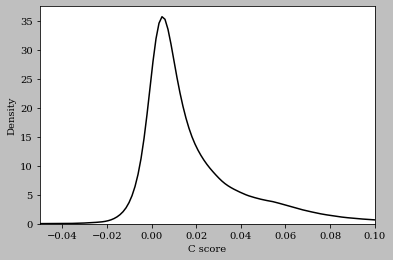

In [32]:
xlim=None
print('Basic')
xlim=(-.1, .5)
cs.plot_score_density('c_NN_basic', data, specparam_basic, sample='full', xlim=xlim)
cs.plot_score_density('c_NN_basic_final_C', data, specparam_basic, sample='full', xlim=xlim)
print('KW')
xlim=(-.05, .1)
#xlim=None
cs.plot_score_density('c_NN_kw', data, specparam_kw, sample='full', xlim=xlim)
cs.plot_score_density('c_NN_kw_final_C', data, specparam_kw, sample='full', xlim=xlim)

### NN with YFE

Basic


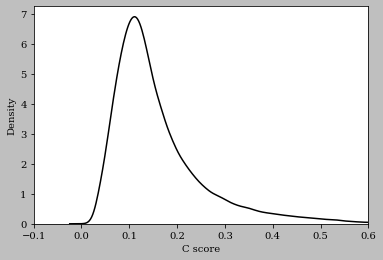

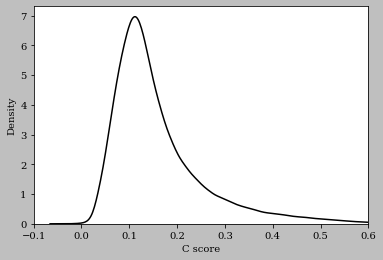

KW


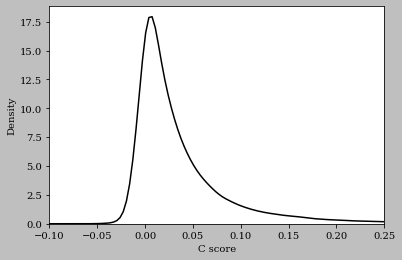

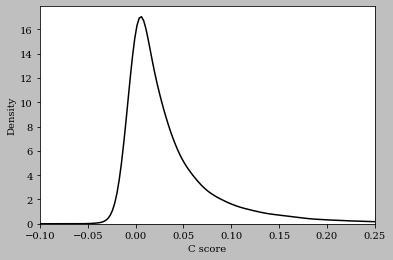

In [38]:
xlim=None
print('Basic')
xlim=(-.1, .6)
cs.plot_score_density('c_NNy_basic', data, specparam_basic, sample='full', xlim=xlim)
cs.plot_score_density('c_NNy_basic_final_C', data, specparam_basic, sample='full', xlim=xlim)
print('KW')
xlim=(-.1, .25)
cs.plot_score_density('c_NNy_kw', data, specparam_basic, sample='full', xlim=xlim)
cs.plot_score_density('c_NNy_kw_final_C', data, specparam_basic, sample='full', xlim=xlim)

## Densities of G and G+C scores

### FM Yearly

G Score


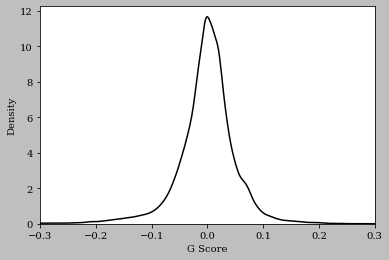

G+C Scores


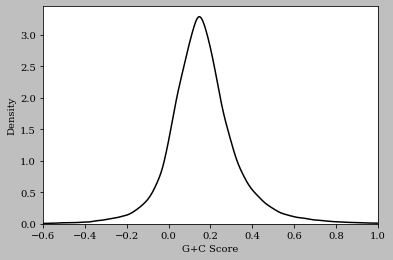

In [34]:
# Densities g and g+c scores
xlim=None
print('G Score')
xlim=(-.3, .3)
cs.plot_score_density('g_Lfmy_basic', data, specparam_basic, sample='full', xlim=xlim, score='G Score')
print('G+C Scores')
xlim=(-.6, 1.)
cs.plot_score_density('gc_Lfmy_basic', data, specparam_basic, sample='full', xlim=xlim, score='G+C Score')


### NN without YFE

Basic
G Score


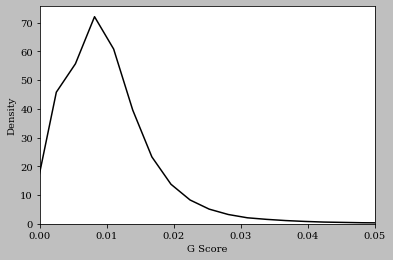

G+C Scores


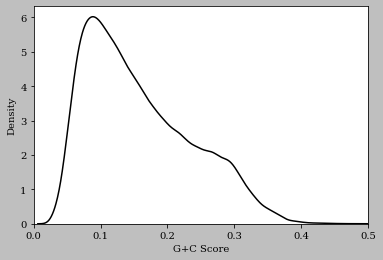

KW
G Score


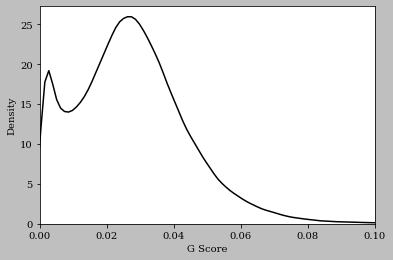

G+C Scores


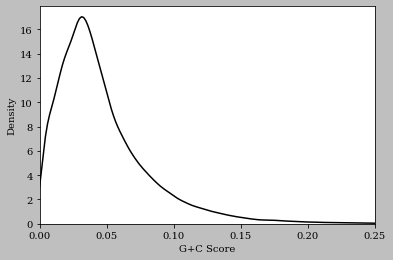

In [35]:
# Densities g and g+c scores
xlim=None
print('Basic')
print('G Score')
xlim=(0, .05)
cs.plot_score_density('g_NN_basic', data, specparam_basic, sample='full', xlim=xlim, score='G Score')
print('G+C Scores')
xlim=(0, .5)
cs.plot_score_density('gc_NN_basic', data, specparam_basic, sample='full', xlim=xlim, score='G+C Score')
print('KW')
print('G Score')
xlim=(0, .1)
cs.plot_score_density('g_NN_kw', data, specparam_basic, sample='full', xlim=xlim, score='G Score')
print('G+C Scores')
xlim=(0, .25)
cs.plot_score_density('gc_NN_kw', data, specparam_basic, sample='full', xlim=xlim, score='G+C Score')


### NN with YFE

Basic
G Score


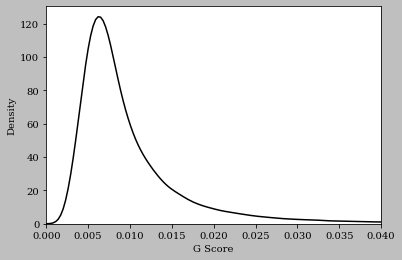

G+C Scores


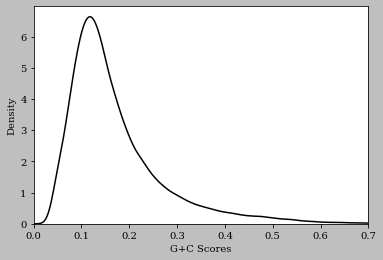

KW
G Score


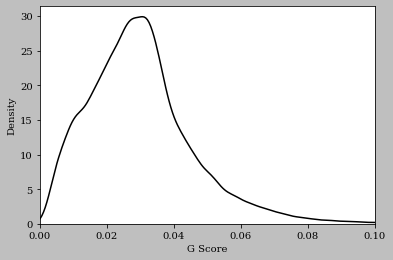

G+C Scores


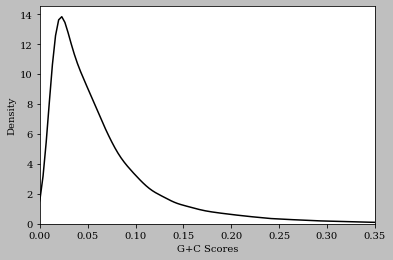

In [36]:
# Densities g and g+c scores
xlim=None
print('Basic')
print('G Score')
xlim=(0, .04)
cs.plot_score_density('g_NNy_basic', data, specparam_basic, sample='full', xlim=xlim, score='G Score')
print('G+C Scores')
xlim=(0, .7)
cs.plot_score_density('gc_NNy_basic', data, specparam_basic, sample='full', xlim=xlim, score='G+C Scores')
print('KW')
print('G Score')
xlim=(0, .1)
cs.plot_score_density('g_NNy_kw', data, specparam_basic, sample='full', xlim=xlim, score='G Score')
print('G+C Scores')
xlim=(0, .35)
cs.plot_score_density('gc_NNy_kw', data, specparam_basic, sample='full', xlim=xlim, score='G+C Scores')


## Time Trends

In [37]:
estimator = 'mean'
ci = 'sd'
#ci = None

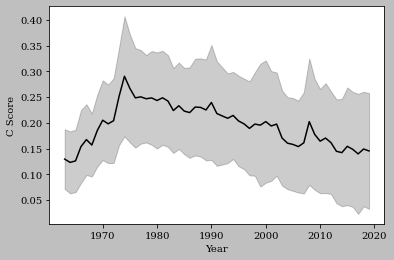

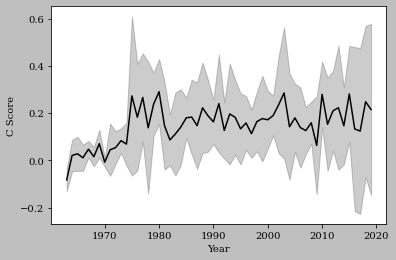

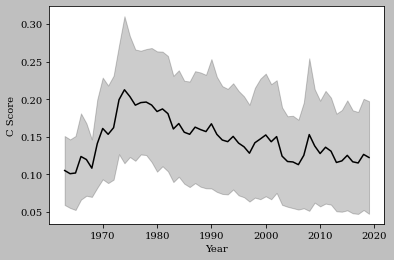

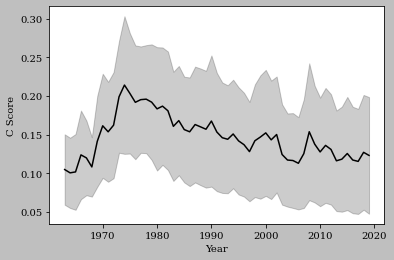

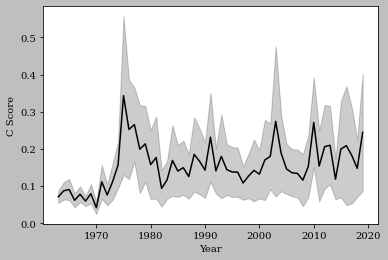

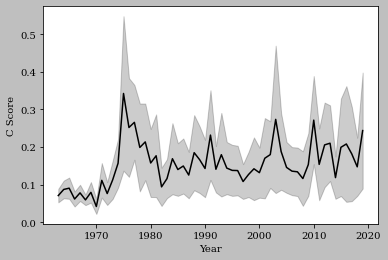

In [38]:
# Basic specification
cs.plot_time(data, specparam_basic, 'c_L_basic', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_basic, 'c_Lfmy_basic', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_basic, 'c_NN_basic', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_basic, 'c_NN_basic_final_C', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_basic, 'c_NNy_basic', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_basic, 'c_NNy_basic_final_C', estimator=estimator, ci=ci)

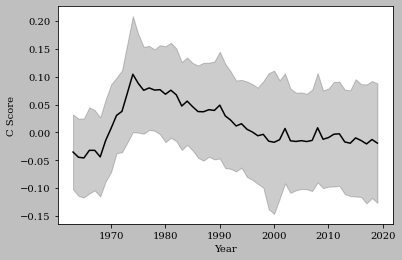

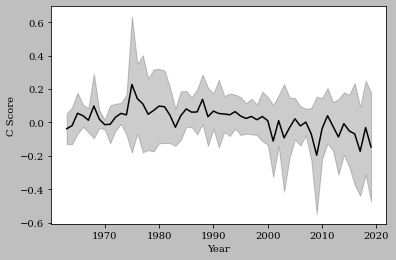

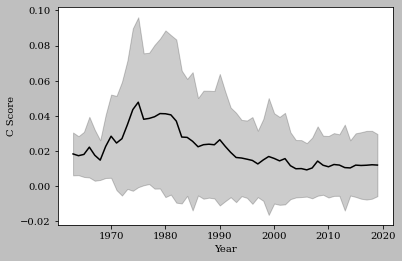

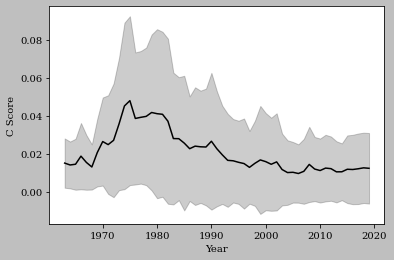

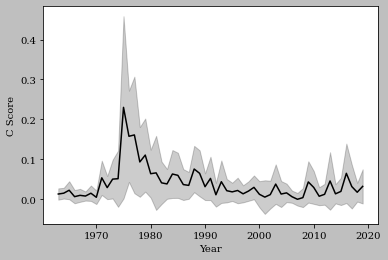

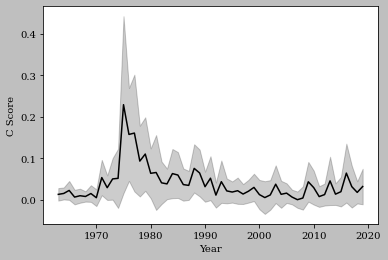

In [39]:
# KW specification
cs.plot_time(data, specparam_kw, 'c_L_kw', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_kw, 'c_Lfmy_kw', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_kw, 'c_NN_kw', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_kw, 'c_NN_kw_final_C', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_kw, 'c_NNy_kw', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_kw, 'c_NNy_kw_final_C', estimator=estimator, ci=ci)

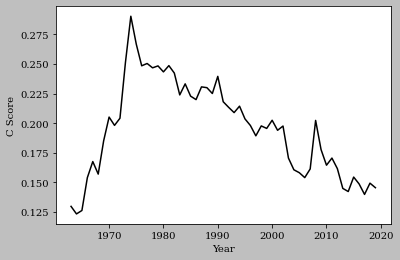

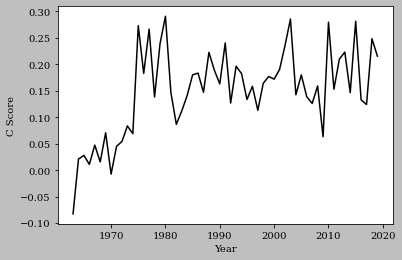

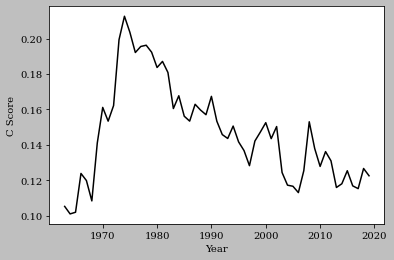

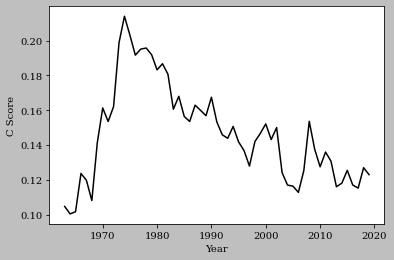

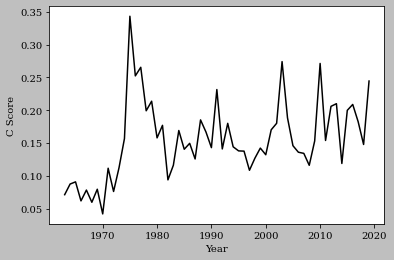

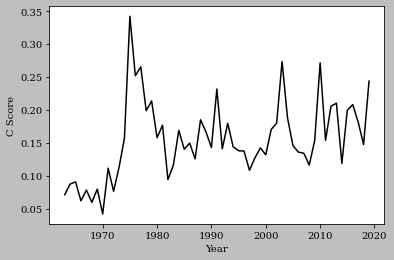

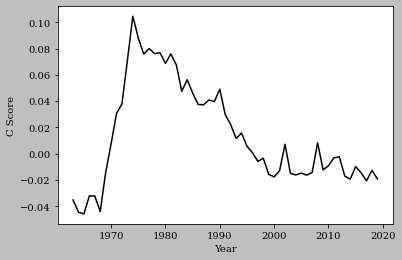

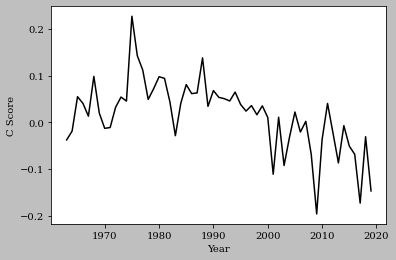

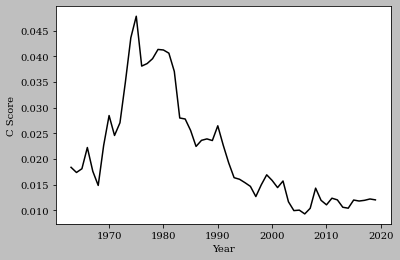

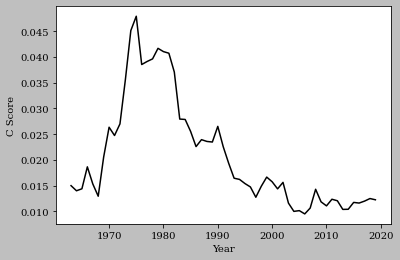

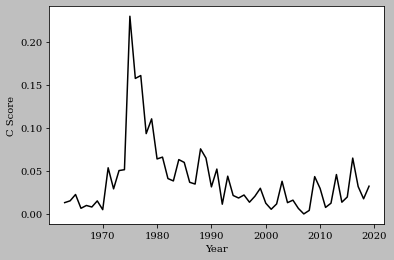

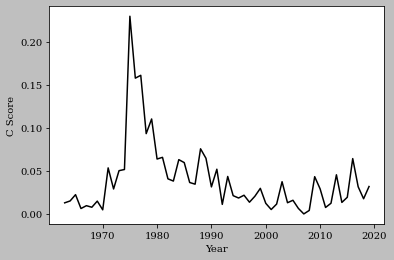

In [62]:
# Plot without the standard errors
cs.plot_time(data, specparam_basic, 'c_L_basic', estimator=estimator, ci=None, suffix='_nosd')
cs.plot_time(data, specparam_basic, 'c_Lfmy_basic', estimator=estimator, ci=None, suffix='_nosd')
cs.plot_time(data, specparam_basic, 'c_NN_basic', estimator=estimator, ci=None, suffix='_nosd')
cs.plot_time(data, specparam_basic, 'c_NN_basic_final_C', estimator=estimator, ci=None, suffix='_nosd')
cs.plot_time(data, specparam_basic, 'c_NNy_basic', estimator=estimator, ci=None, suffix='_nosd')
cs.plot_time(data, specparam_basic, 'c_NNy_basic_final_C', estimator=estimator, ci=None, suffix='_nosd')

cs.plot_time(data, specparam_kw, 'c_L_kw', estimator=estimator, ci=None, suffix='_nosd')
cs.plot_time(data, specparam_kw, 'c_Lfmy_kw', estimator=estimator, ci=None, suffix='_nosd')
cs.plot_time(data, specparam_kw, 'c_NN_kw', estimator=estimator, ci=None, suffix='_nosd')
cs.plot_time(data, specparam_kw, 'c_NN_kw_final_C', estimator=estimator, ci=None, suffix='_nosd')
cs.plot_time(data, specparam_kw, 'c_NNy_kw', estimator=estimator, ci=None, suffix='_nosd')
cs.plot_time(data, specparam_kw, 'c_NNy_kw_final_C', estimator=estimator, ci=None, suffix='_nosd')

Linear Basic


<Figure size 720x360 with 0 Axes>

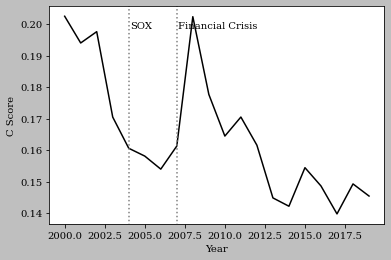

Linear KW


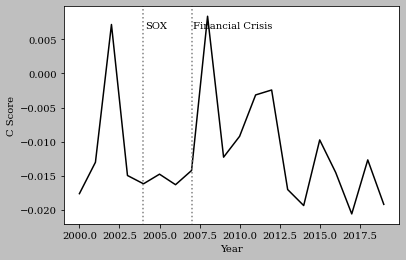

FM Basic


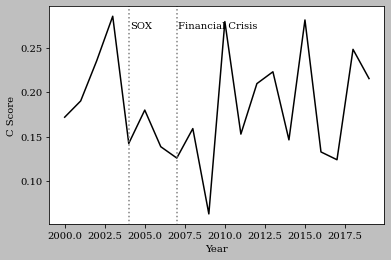

FM KW


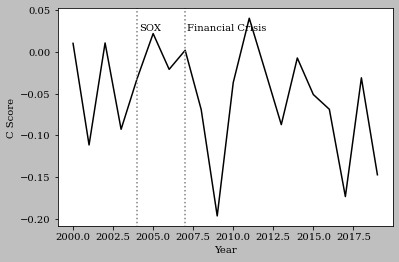

NN Basic


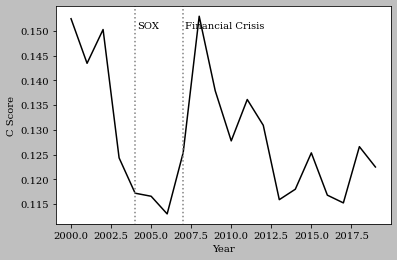

NN KW


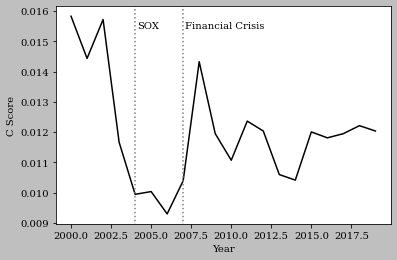

NNy Basic


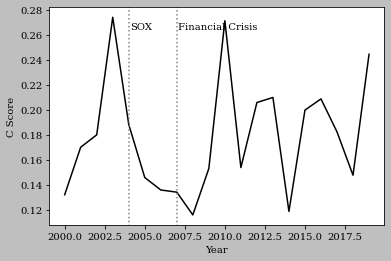

NNy KW


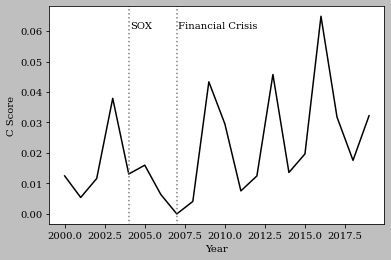

NN Basic final


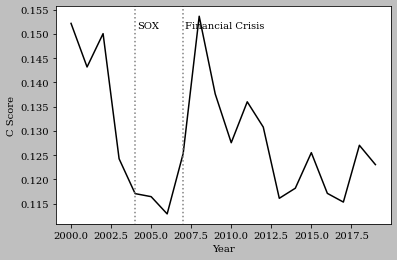

NN KW final


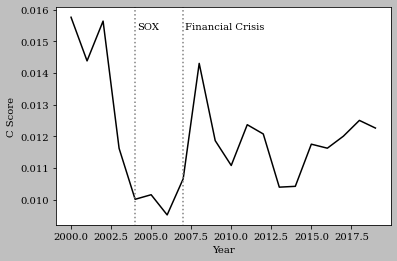

NNy Basic final


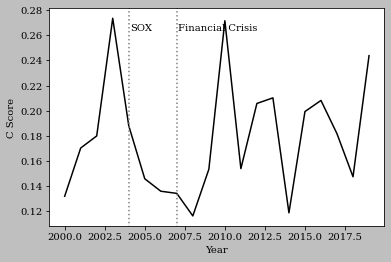

NNy KW final


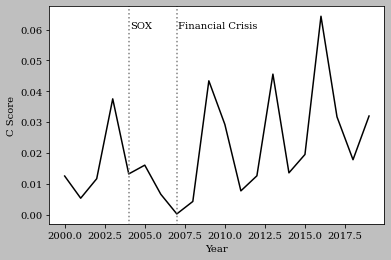

In [43]:
from matplotlib.pyplot import figure
figure(figsize=(10,5))
print("Linear Basic")
cs.plot_time(data[data.fyear>=2000], specparam_basic, 'c_L_basic', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)
print("Linear KW")
cs.plot_time(data[data.fyear>=2000], specparam_kw, 'c_L_kw', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)
print("FM Basic")
cs.plot_time(data[data.fyear>=2000], specparam_basic, 'c_Lfmy_basic', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)
print("FM KW")
cs.plot_time(data[data.fyear>=2000], specparam_kw, 'c_Lfmy_kw', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)
print("NN Basic")
cs.plot_time(data[data.fyear>=2000], specparam_basic, 'c_NN_basic', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)
print("NN KW")
cs.plot_time(data[data.fyear>=2000], specparam_kw, 'c_NN_kw', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)
print("NNy Basic")
cs.plot_time(data[data.fyear>=2000], specparam_basic, 'c_NNy_basic', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)
print("NNy KW")
cs.plot_time(data[data.fyear>=2000], specparam_kw, 'c_NNy_kw', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)

print("NN Basic final")
cs.plot_time(data[data.fyear>=2000], specparam_basic, 'c_NN_basic_final_C', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)
print("NN KW final")
cs.plot_time(data[data.fyear>=2000], specparam_kw, 'c_NN_kw_final_C', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)
print("NNy Basic final")
cs.plot_time(data[data.fyear>=2000], specparam_basic, 'c_NNy_basic_final_C', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)
print("NNy KW final")
cs.plot_time(data[data.fyear>=2000], specparam_kw, 'c_NNy_kw_final_C', estimator=estimator, ci=None, suffix='_nosd_recent', add_events=True)



## Regressions on lags

### Linear

In [54]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_L_basic')

In [55]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_L_kw')

### FM Yearly

In [44]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_Lfmy_basic')

In [46]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_Lfmy_kw')

### NN without YFE

In [45]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_NN_basic')

In [47]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_NN_kw')

In [48]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_NN_basic_final_C')

In [49]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_NN_kw_final_C')

### NN with YFE

In [50]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_NNy_basic')

In [51]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_NNy_kw')

In [52]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_NNy_basic_final_C')

In [53]:
# Regression of C score on lags
cs.regression_cscore_lags(data, 'c_NNy_kw_final_C')

## Regressions

In [59]:
drop_features = ['pin']
variables1 = ['c_L_basic', 'c_Lfmy_basic', 'c_NN_basic', 'c_NNy_basic']
variables1_final = ['c_L_basic', 'c_Lfmy_basic', 'c_NN_basic_final_C', 'c_NNy_basic_final_C']
legend1 = ['L1', 'L1y', 'MLC1', 'MLC1y']
variables2 = ['c_L_kw', 'c_Lfmy_kw', 'c_NN_kw', 'c_NNy_kw']
variables2_final = ['c_L_kw', 'c_Lfmy_kw', 'c_NN_kw_final_C', 'c_NNy_kw_final_C']
legend2 = ['L2', 'L2y', 'MLC2', 'MLC2y']

In [60]:
cs.regression(variables1, legend1, data, specparam_basic, drop_features, suffix='')

In [61]:
cs.regression(variables1_final, legend1, data, specparam_basic, drop_features, suffix='_final')

In [32]:
cs.regression(variables2, legend2, data, specparam_kw, drop_features, suffix='')

In [32]:
cs.regression(variables2_final, legend2, data, specparam_kw, drop_features, suffix='_final')

## Plots

In [75]:
# Number of points to consider for the plots
nq = 20
xlim=None

### Linear

##### Plot for x:logeq, y:c_L_basic #####


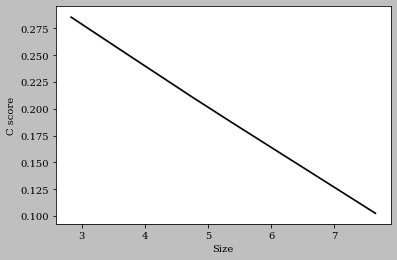

##### Plot for x:logeqdef, y:c_L_basic #####


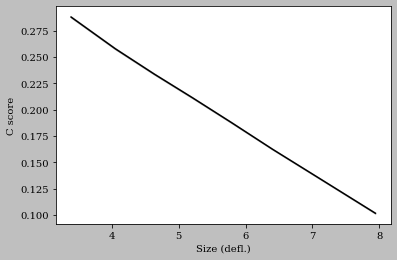

##### Plot for x:m_b, y:c_L_basic #####


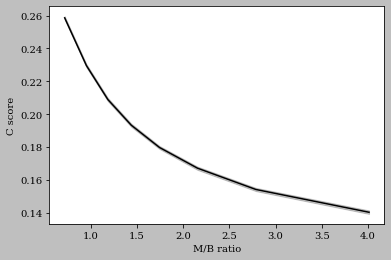

##### Plot for x:flev, y:c_L_basic #####


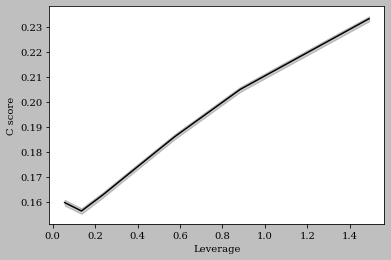

##### Plot for x:yvolatd, y:c_L_basic #####


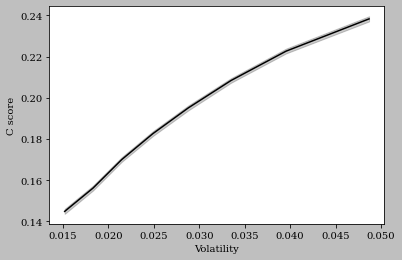

##### Plot for x:noacc, y:c_L_basic #####


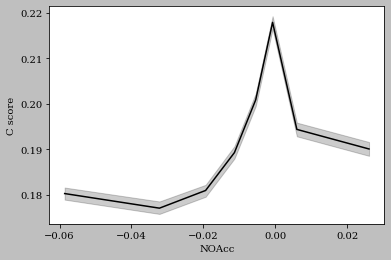

##### Plot for x:cfoa, y:c_L_basic #####


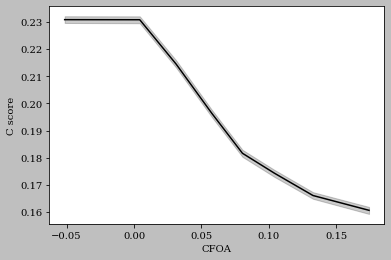

##### Plot for x:invcycle, y:c_L_basic #####


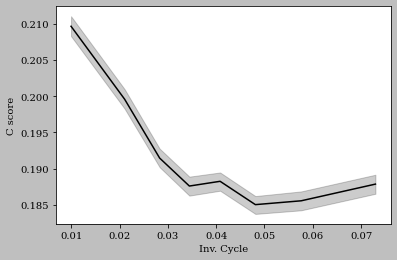

##### Plot for x:age, y:c_L_basic #####


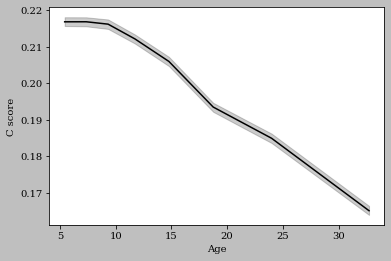

##### Plot for x:problit, y:c_L_basic #####


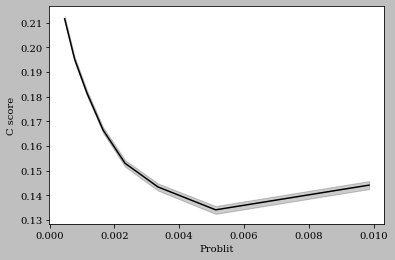

##### Plot for x:pin, y:c_L_basic #####


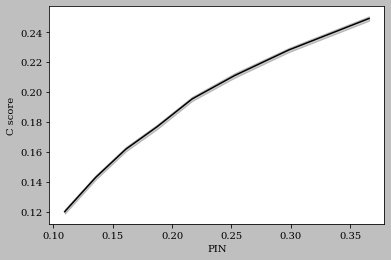

##### Plot for x:dbas, y:c_L_basic #####


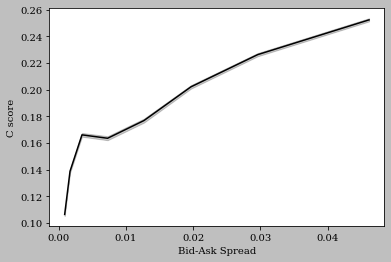

##### Plot for x:logeq, y:c_L_kw #####


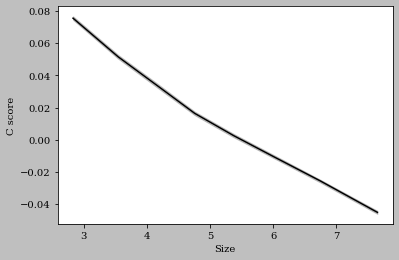

##### Plot for x:logeqdef, y:c_L_kw #####


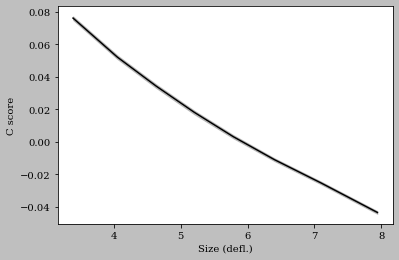

##### Plot for x:m_b, y:c_L_kw #####


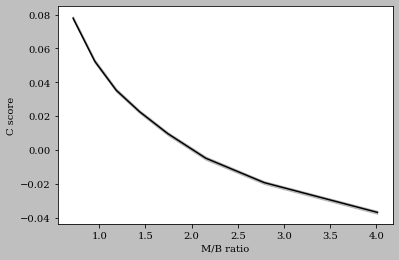

##### Plot for x:flev, y:c_L_kw #####


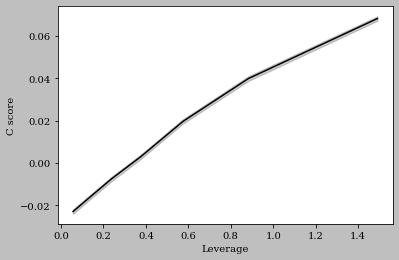

##### Plot for x:yvolatd, y:c_L_kw #####


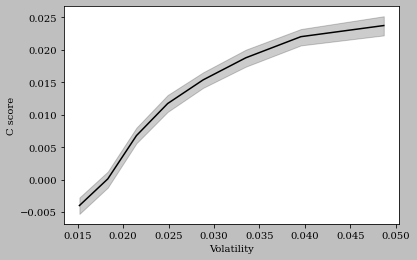

##### Plot for x:noacc, y:c_L_kw #####


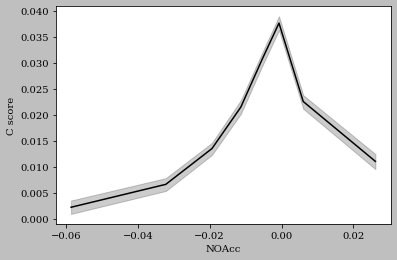

##### Plot for x:cfoa, y:c_L_kw #####


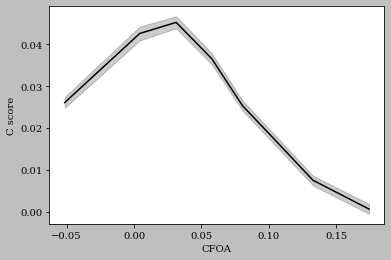

##### Plot for x:invcycle, y:c_L_kw #####


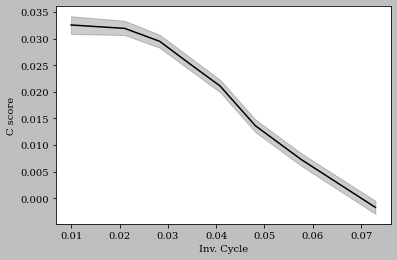

##### Plot for x:age, y:c_L_kw #####


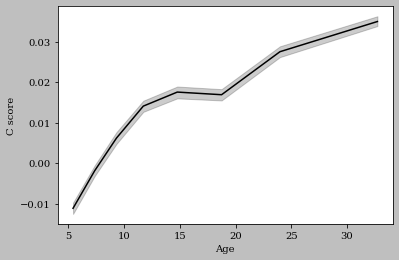

##### Plot for x:problit, y:c_L_kw #####


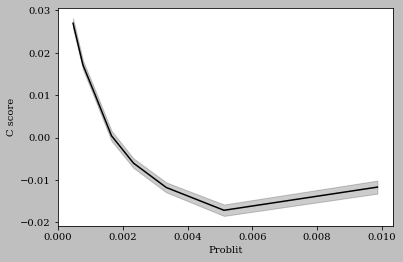

##### Plot for x:pin, y:c_L_kw #####


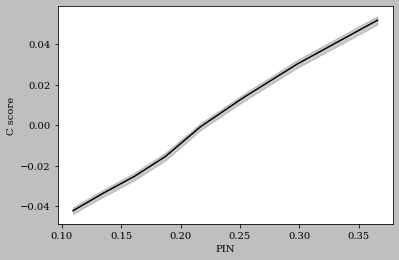

##### Plot for x:dbas, y:c_L_kw #####


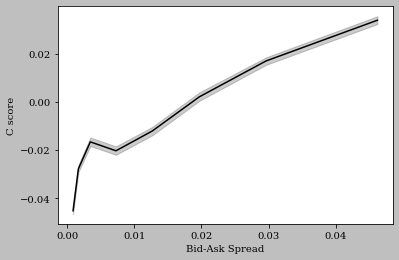

In [49]:
# Basic
cs.plot_all_vars('c_L_basic', data, specparam_basic, nq=nq, quantiles=True, xlim=xlim, sample='full')
# KW
cs.plot_all_vars('c_L_kw', data, specparam_kw, nq=nq, quantiles=True, xlim=xlim, sample='full')

### FM Yearly

##### Plot for x:logeq, y:c_Lfmy_basic #####


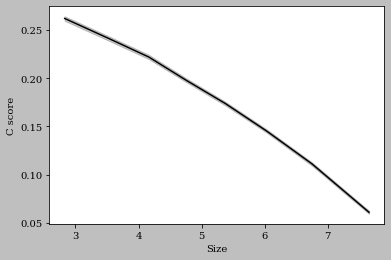

##### Plot for x:logeqdef, y:c_Lfmy_basic #####


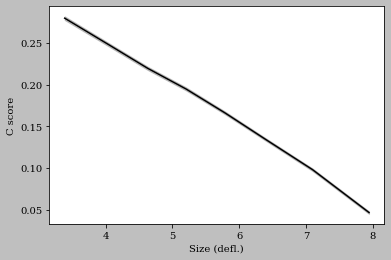

##### Plot for x:m_b, y:c_Lfmy_basic #####


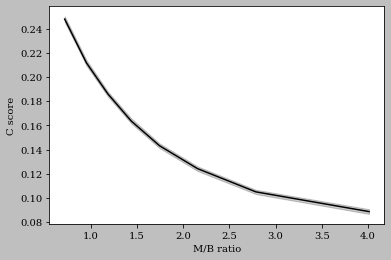

##### Plot for x:flev, y:c_Lfmy_basic #####


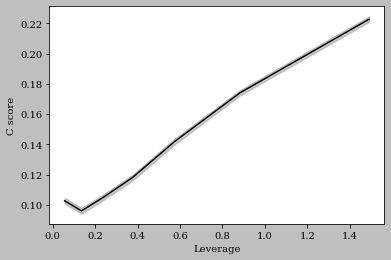

##### Plot for x:yvolatd, y:c_Lfmy_basic #####


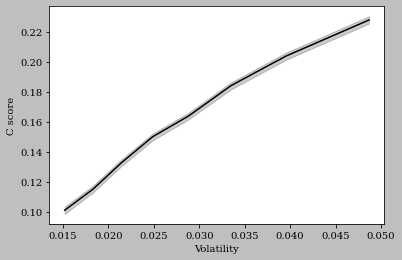

##### Plot for x:noacc, y:c_Lfmy_basic #####


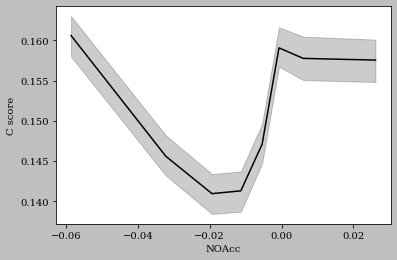

##### Plot for x:cfoa, y:c_Lfmy_basic #####


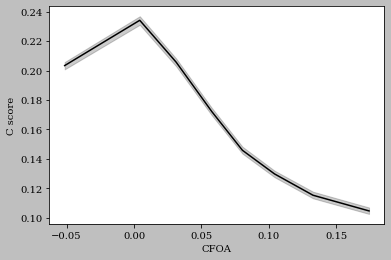

##### Plot for x:invcycle, y:c_Lfmy_basic #####


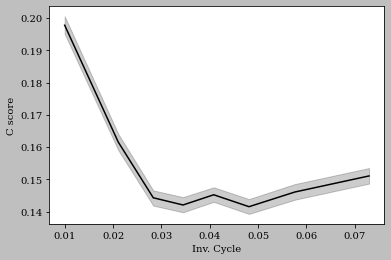

##### Plot for x:age, y:c_Lfmy_basic #####


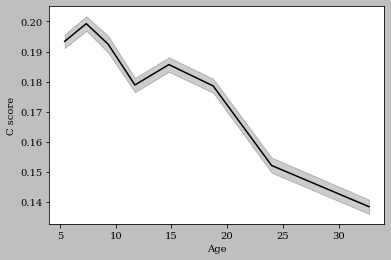

##### Plot for x:problit, y:c_Lfmy_basic #####


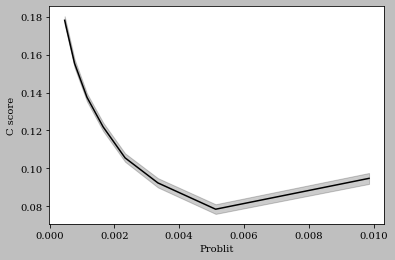

##### Plot for x:pin, y:c_Lfmy_basic #####


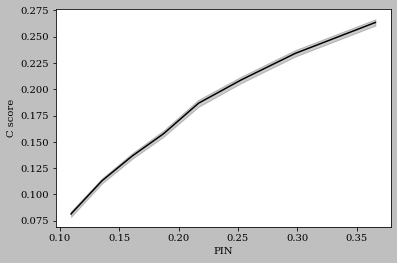

##### Plot for x:dbas, y:c_Lfmy_basic #####


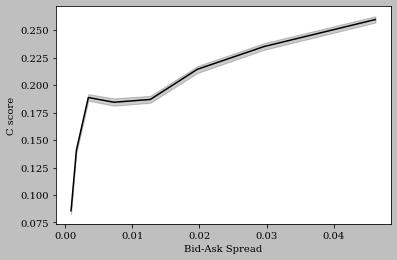

##### Plot for x:logeq, y:c_Lfmy_kw #####


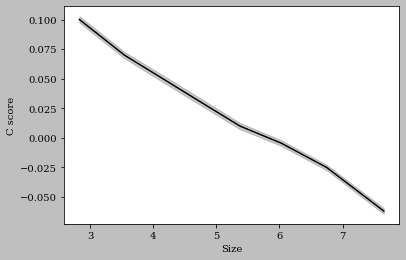

##### Plot for x:logeqdef, y:c_Lfmy_kw #####


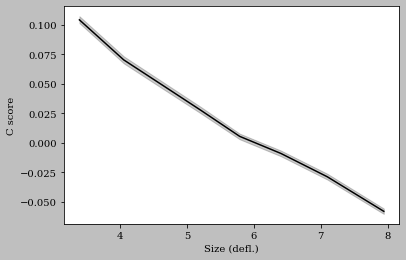

##### Plot for x:m_b, y:c_Lfmy_kw #####


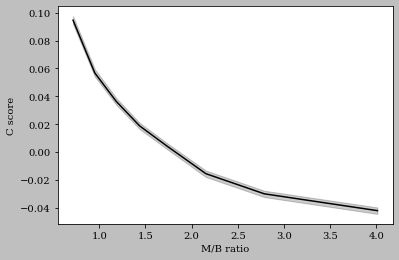

##### Plot for x:flev, y:c_Lfmy_kw #####


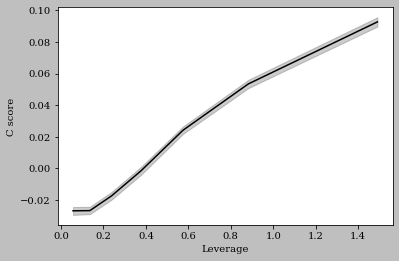

##### Plot for x:yvolatd, y:c_Lfmy_kw #####


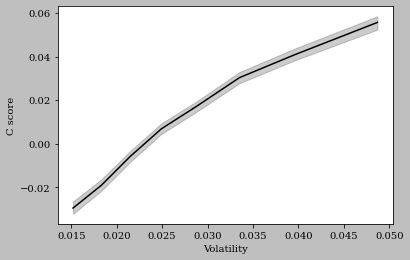

##### Plot for x:noacc, y:c_Lfmy_kw #####


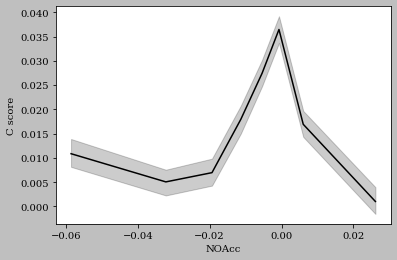

##### Plot for x:cfoa, y:c_Lfmy_kw #####


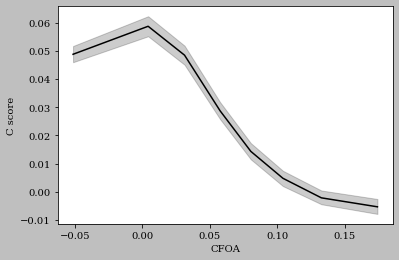

##### Plot for x:invcycle, y:c_Lfmy_kw #####


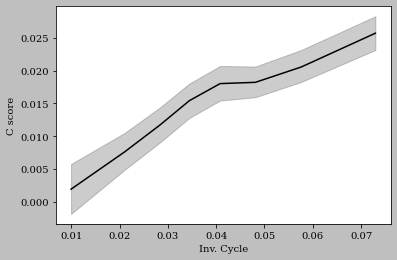

##### Plot for x:age, y:c_Lfmy_kw #####


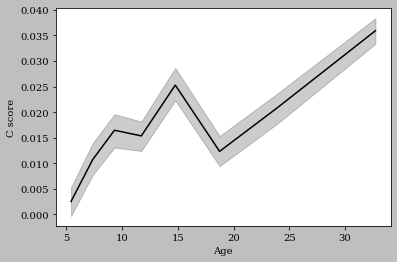

##### Plot for x:problit, y:c_Lfmy_kw #####


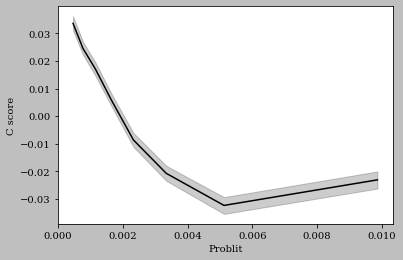

##### Plot for x:pin, y:c_Lfmy_kw #####


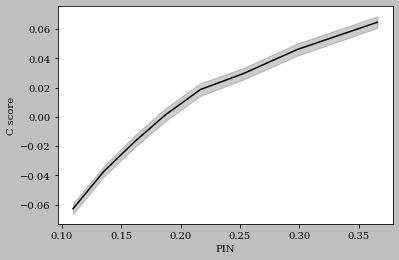

##### Plot for x:dbas, y:c_Lfmy_kw #####


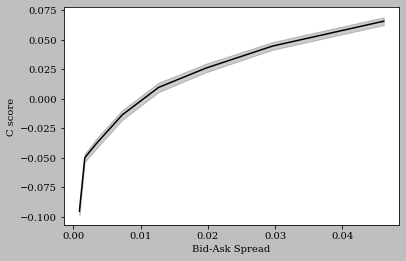

In [50]:
# Basic
cs.plot_all_vars('c_Lfmy_basic', data, specparam_basic, nq=nq, quantiles=True, xlim=xlim, sample='full')
# KW
cs.plot_all_vars('c_Lfmy_kw', data, specparam_kw, nq=nq, quantiles=True, xlim=xlim, sample='full')

### NN without YFE

##### Plot for x:logeq, y:c_NN_basic #####


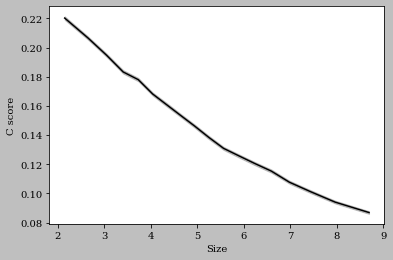

##### Plot for x:logeqdef, y:c_NN_basic #####


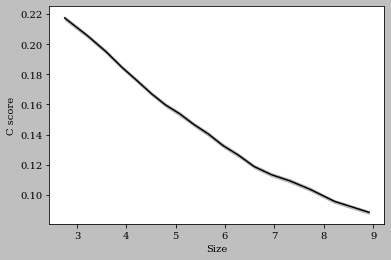

##### Plot for x:m_b, y:c_NN_basic #####


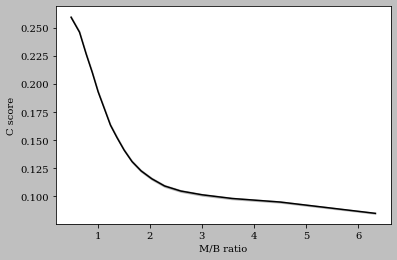

##### Plot for x:flev, y:c_NN_basic #####


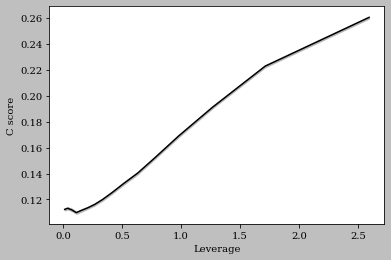

##### Plot for x:yvolatd, y:c_NN_basic #####


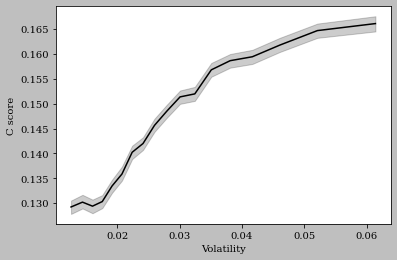

##### Plot for x:noacc, y:c_NN_basic #####


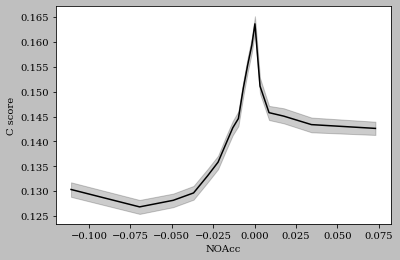

##### Plot for x:cfoa, y:c_NN_basic #####


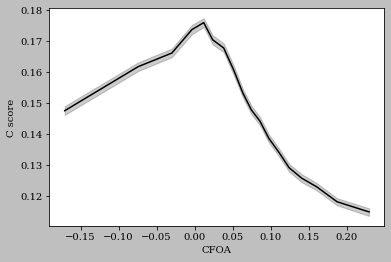

##### Plot for x:invcycle, y:c_NN_basic #####


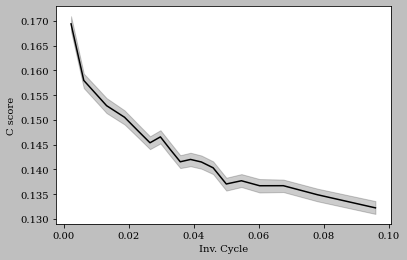

##### Plot for x:age, y:c_NN_basic #####


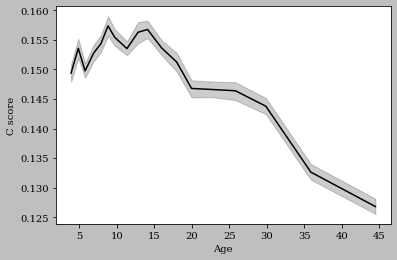

##### Plot for x:problit, y:c_NN_basic #####


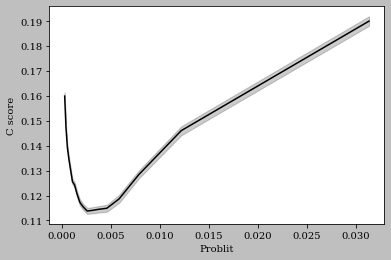

##### Plot for x:pin, y:c_NN_basic #####


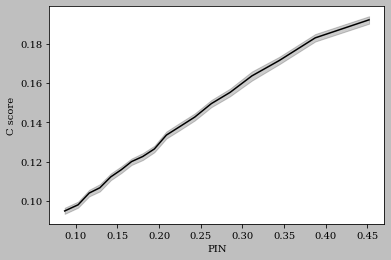

##### Plot for x:dbas, y:c_NN_basic #####


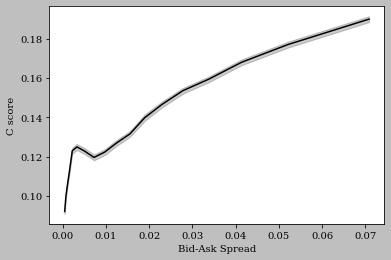

##### Plot for x:logeq, y:c_NN_kw #####


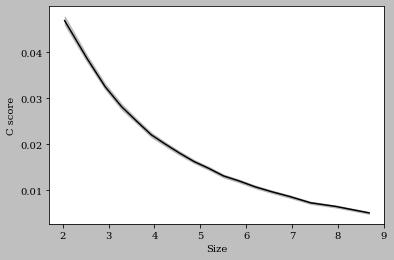

##### Plot for x:logeqdef, y:c_NN_kw #####


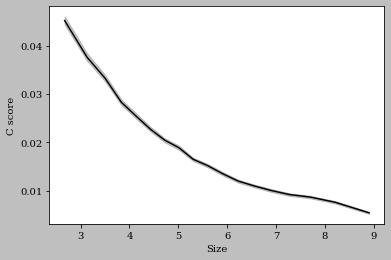

##### Plot for x:m_b, y:c_NN_kw #####


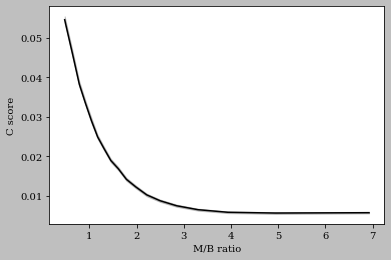

##### Plot for x:flev, y:c_NN_kw #####


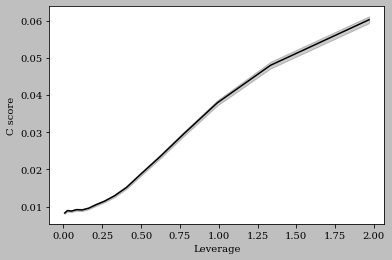

##### Plot for x:yvolatd, y:c_NN_kw #####


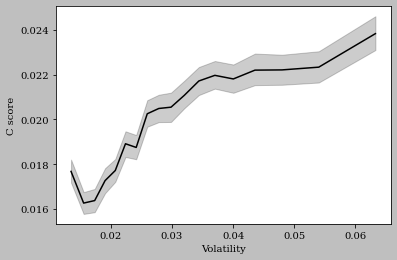

##### Plot for x:noacc, y:c_NN_kw #####


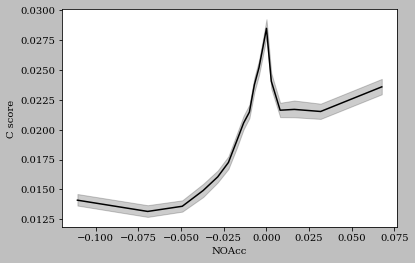

##### Plot for x:cfoa, y:c_NN_kw #####


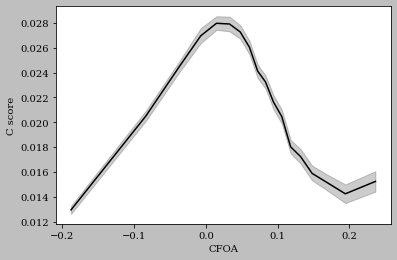

##### Plot for x:invcycle, y:c_NN_kw #####


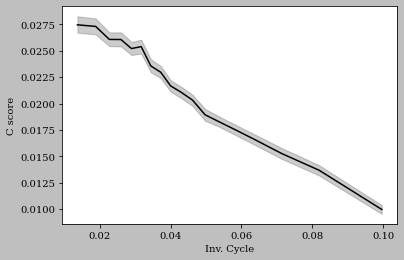

##### Plot for x:age, y:c_NN_kw #####


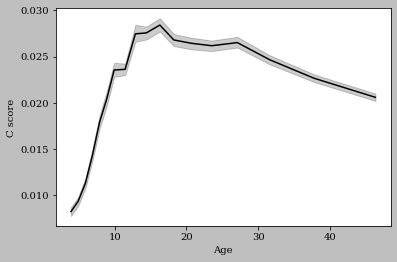

##### Plot for x:problit, y:c_NN_kw #####


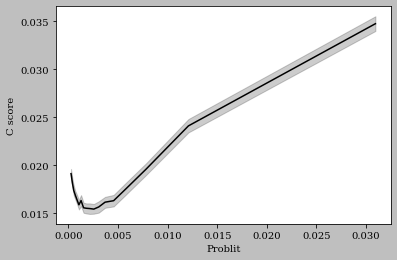

##### Plot for x:pin, y:c_NN_kw #####


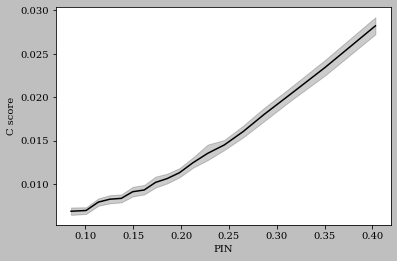

##### Plot for x:dbas, y:c_NN_kw #####


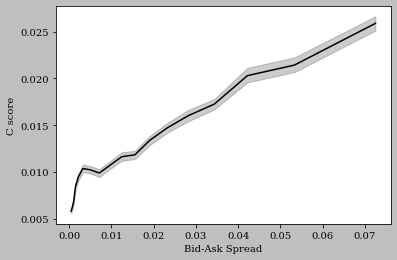

In [76]:
# Basic
cs.plot_all_vars('c_NN_basic', data, specparam_basic, nq=nq, quantiles=True, xlim=xlim, sample='full')
# KW
cs.plot_all_vars('c_NN_kw', data, specparam_kw, nq=nq, quantiles=True, xlim=xlim, sample='full')

##### Plot for x:logeq, y:c_NN_basic_final_C #####


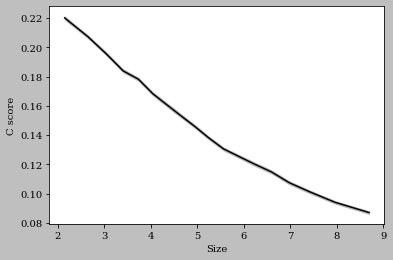

##### Plot for x:logeqdef, y:c_NN_basic_final_C #####


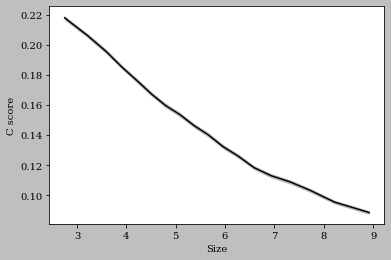

##### Plot for x:m_b, y:c_NN_basic_final_C #####


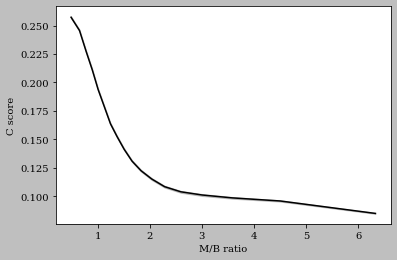

##### Plot for x:flev, y:c_NN_basic_final_C #####


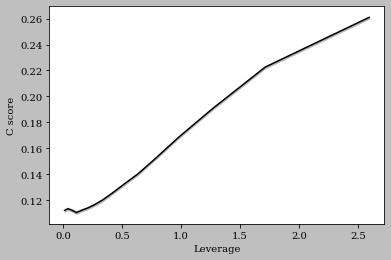

##### Plot for x:yvolatd, y:c_NN_basic_final_C #####


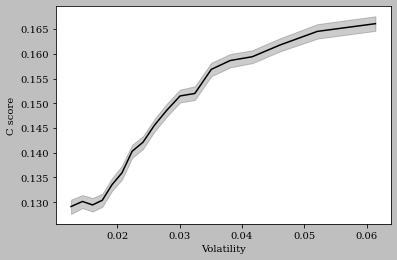

##### Plot for x:noacc, y:c_NN_basic_final_C #####


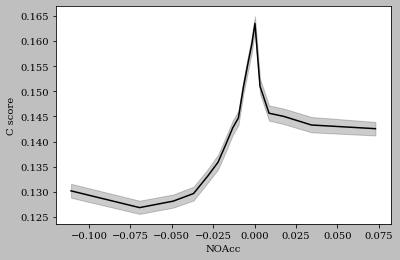

##### Plot for x:cfoa, y:c_NN_basic_final_C #####


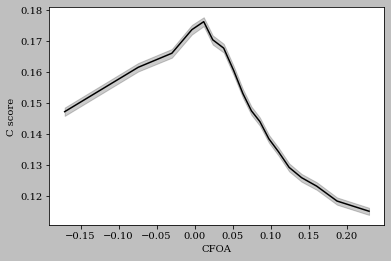

##### Plot for x:invcycle, y:c_NN_basic_final_C #####


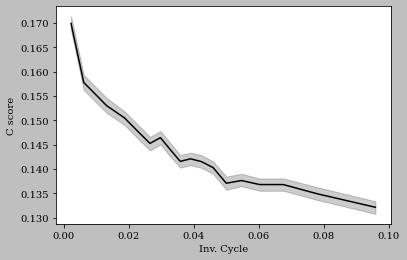

##### Plot for x:age, y:c_NN_basic_final_C #####


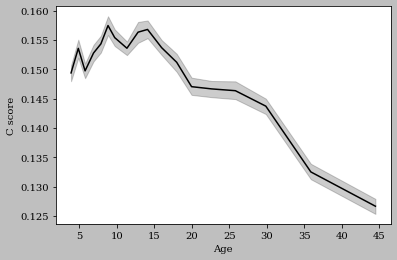

##### Plot for x:problit, y:c_NN_basic_final_C #####


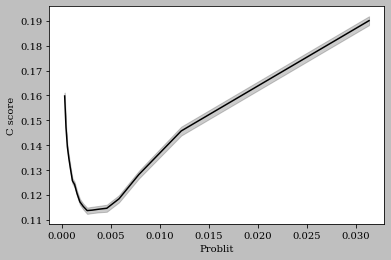

##### Plot for x:pin, y:c_NN_basic_final_C #####


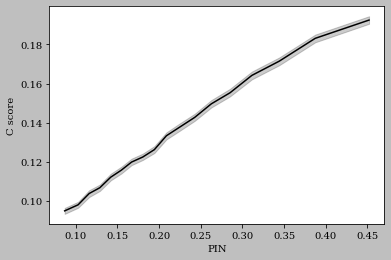

##### Plot for x:dbas, y:c_NN_basic_final_C #####


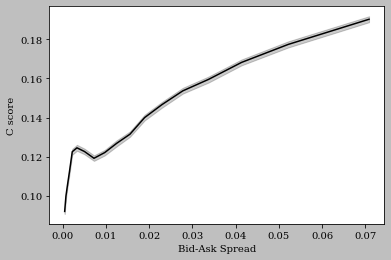

##### Plot for x:logeq, y:c_NN_kw_final_C #####


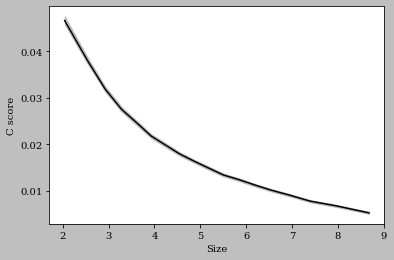

##### Plot for x:logeqdef, y:c_NN_kw_final_C #####


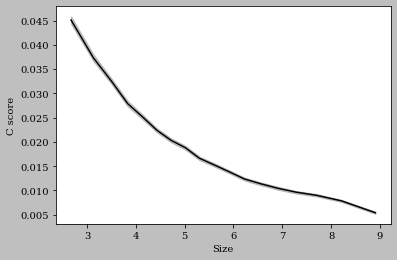

##### Plot for x:m_b, y:c_NN_kw_final_C #####


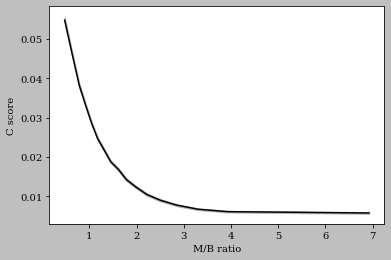

##### Plot for x:flev, y:c_NN_kw_final_C #####


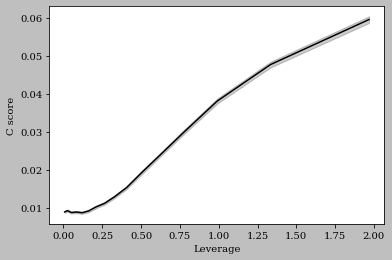

##### Plot for x:yvolatd, y:c_NN_kw_final_C #####


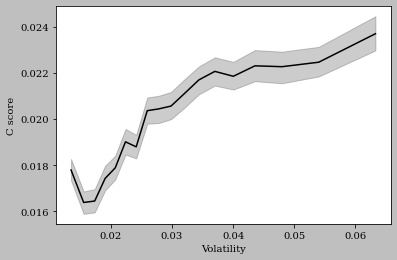

##### Plot for x:noacc, y:c_NN_kw_final_C #####


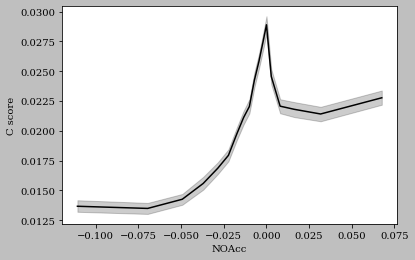

##### Plot for x:cfoa, y:c_NN_kw_final_C #####


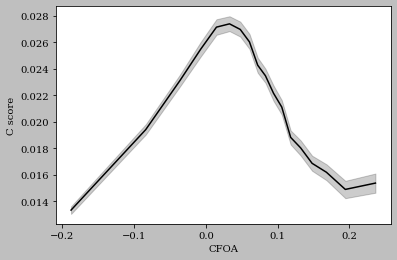

##### Plot for x:invcycle, y:c_NN_kw_final_C #####


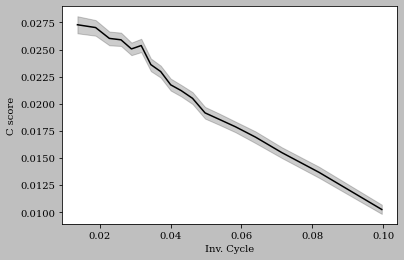

##### Plot for x:age, y:c_NN_kw_final_C #####


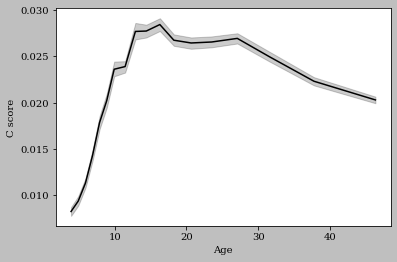

##### Plot for x:problit, y:c_NN_kw_final_C #####


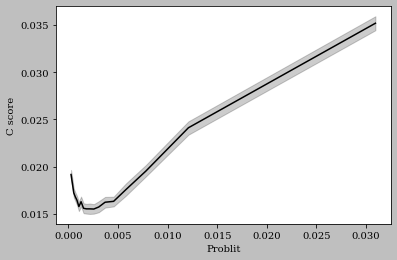

##### Plot for x:pin, y:c_NN_kw_final_C #####


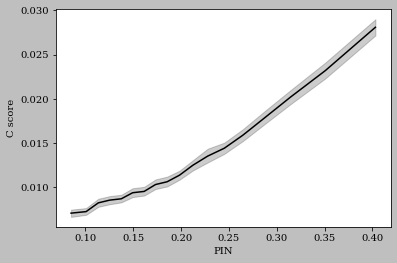

##### Plot for x:dbas, y:c_NN_kw_final_C #####


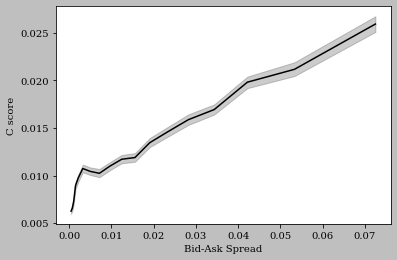

In [77]:
# Basic
cs.plot_all_vars('c_NN_basic_final_C', data, specparam_basic, nq=nq, quantiles=True, xlim=xlim, sample='full')
# KW
cs.plot_all_vars('c_NN_kw_final_C', data, specparam_kw, nq=nq, quantiles=True, xlim=xlim, sample='full')

### NN with YFE

##### Plot for x:logeq, y:c_NNy_basic #####


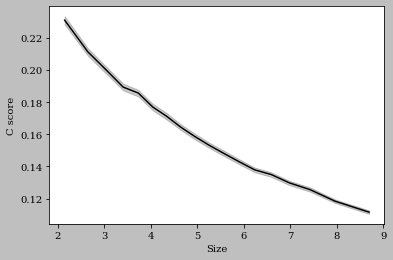

##### Plot for x:logeqdef, y:c_NNy_basic #####


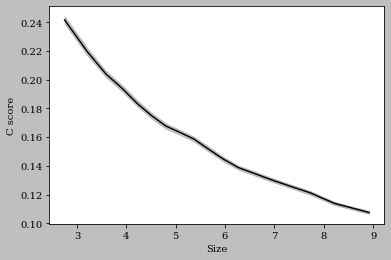

##### Plot for x:m_b, y:c_NNy_basic #####


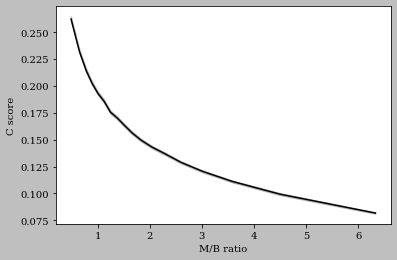

##### Plot for x:flev, y:c_NNy_basic #####


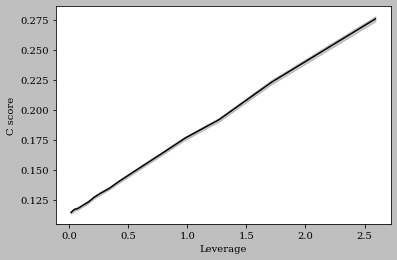

##### Plot for x:yvolatd, y:c_NNy_basic #####


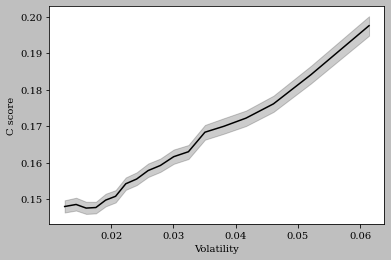

##### Plot for x:noacc, y:c_NNy_basic #####


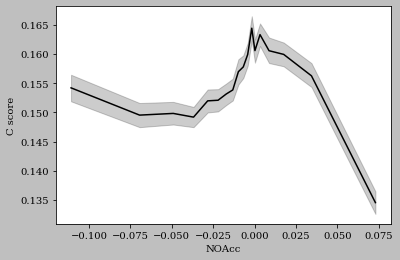

##### Plot for x:cfoa, y:c_NNy_basic #####


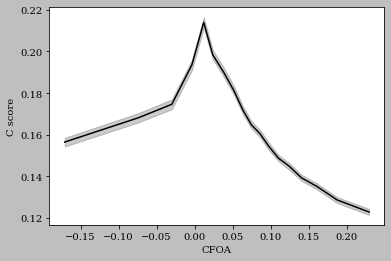

##### Plot for x:invcycle, y:c_NNy_basic #####


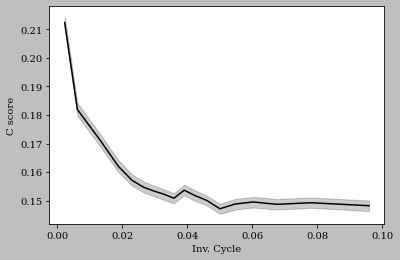

##### Plot for x:age, y:c_NNy_basic #####


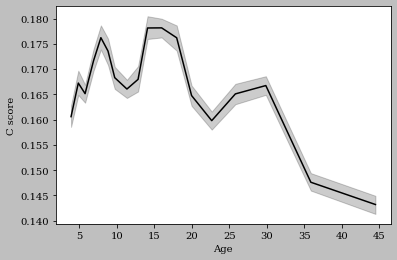

##### Plot for x:problit, y:c_NNy_basic #####


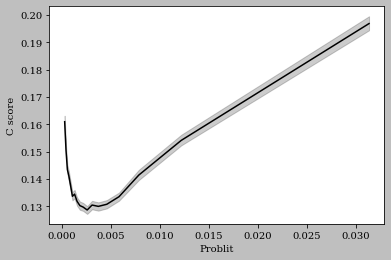

##### Plot for x:pin, y:c_NNy_basic #####


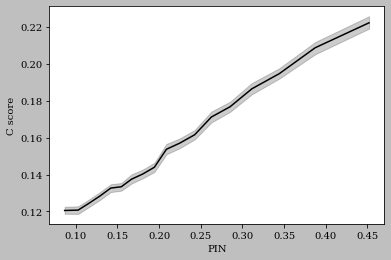

##### Plot for x:dbas, y:c_NNy_basic #####


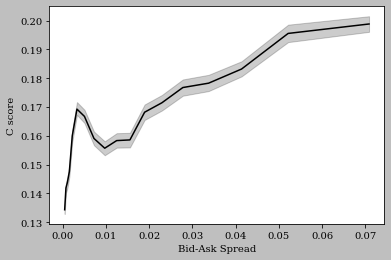

##### Plot for x:logeq, y:c_NNy_kw #####


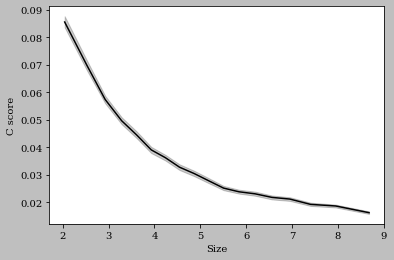

##### Plot for x:logeqdef, y:c_NNy_kw #####


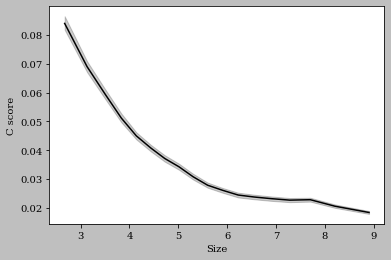

##### Plot for x:m_b, y:c_NNy_kw #####


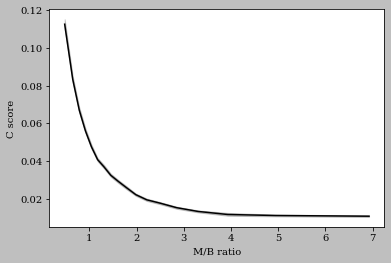

##### Plot for x:flev, y:c_NNy_kw #####


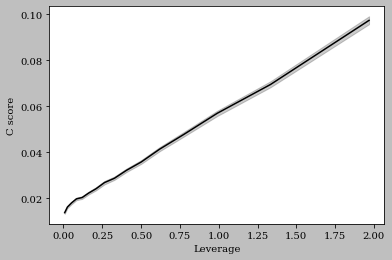

##### Plot for x:yvolatd, y:c_NNy_kw #####


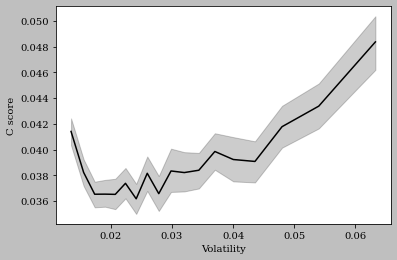

##### Plot for x:noacc, y:c_NNy_kw #####


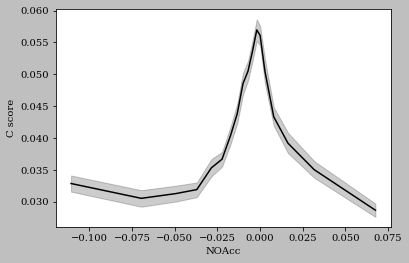

##### Plot for x:cfoa, y:c_NNy_kw #####


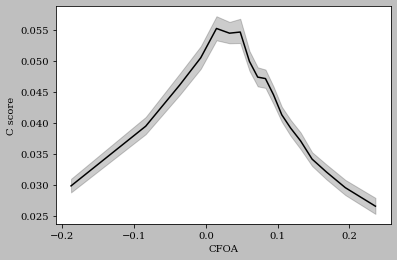

##### Plot for x:invcycle, y:c_NNy_kw #####


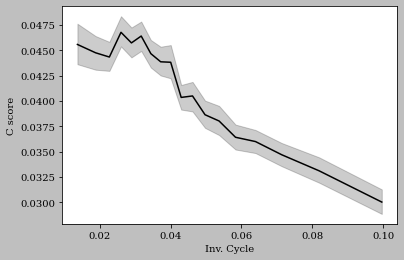

##### Plot for x:age, y:c_NNy_kw #####


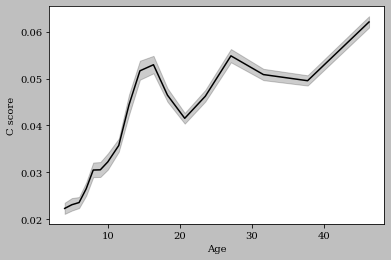

##### Plot for x:problit, y:c_NNy_kw #####


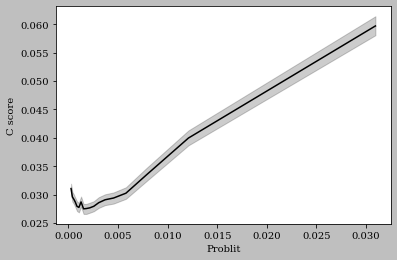

##### Plot for x:pin, y:c_NNy_kw #####


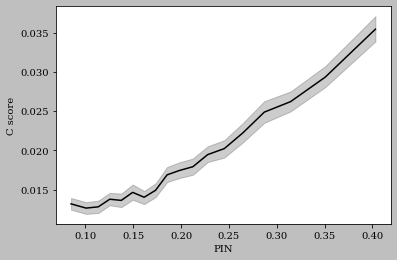

##### Plot for x:dbas, y:c_NNy_kw #####


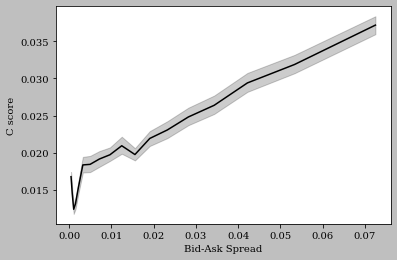

In [78]:
# Basic
cs.plot_all_vars('c_NNy_basic', data, specparam_basic, nq=nq, quantiles=True, xlim=xlim, sample='full')
# KW
cs.plot_all_vars('c_NNy_kw', data, specparam_kw, nq=nq, quantiles=True, xlim=xlim, sample='full')

##### Plot for x:logeq, y:c_NNy_basic_final_C #####


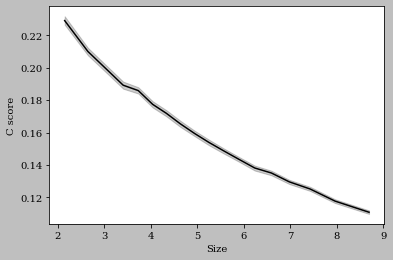

##### Plot for x:logeqdef, y:c_NNy_basic_final_C #####


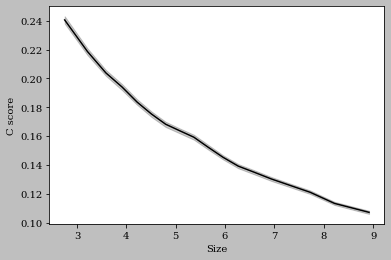

##### Plot for x:m_b, y:c_NNy_basic_final_C #####


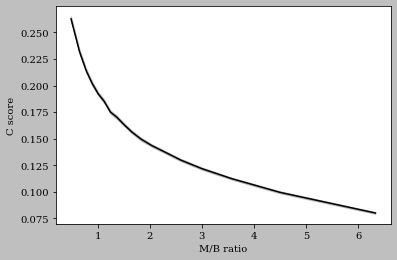

##### Plot for x:flev, y:c_NNy_basic_final_C #####


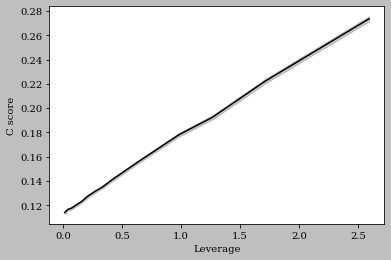

##### Plot for x:yvolatd, y:c_NNy_basic_final_C #####


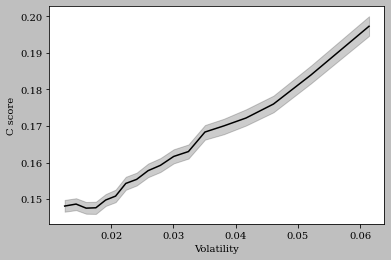

##### Plot for x:noacc, y:c_NNy_basic_final_C #####


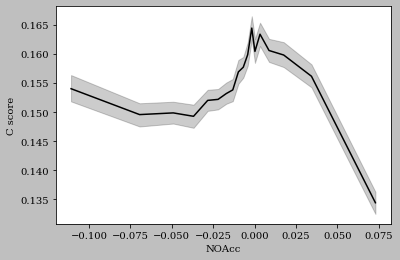

##### Plot for x:cfoa, y:c_NNy_basic_final_C #####


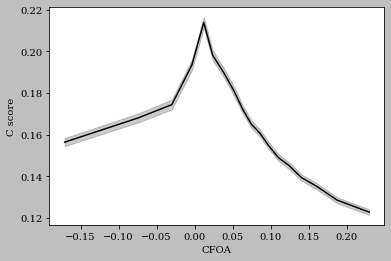

##### Plot for x:invcycle, y:c_NNy_basic_final_C #####


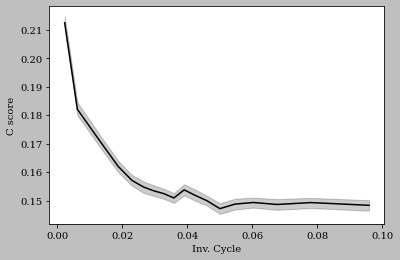

##### Plot for x:age, y:c_NNy_basic_final_C #####


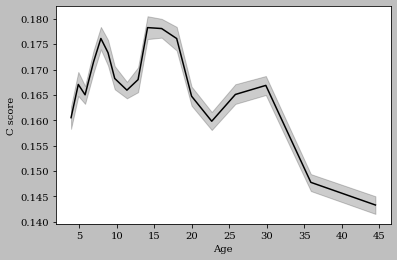

##### Plot for x:problit, y:c_NNy_basic_final_C #####


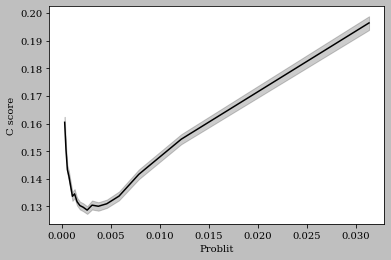

##### Plot for x:pin, y:c_NNy_basic_final_C #####


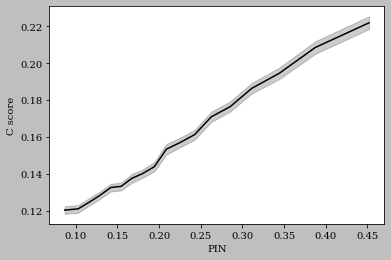

##### Plot for x:dbas, y:c_NNy_basic_final_C #####


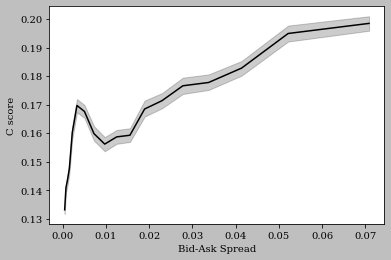

##### Plot for x:logeq, y:c_NNy_kw_final_C #####


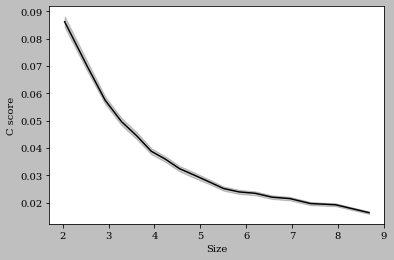

##### Plot for x:logeqdef, y:c_NNy_kw_final_C #####


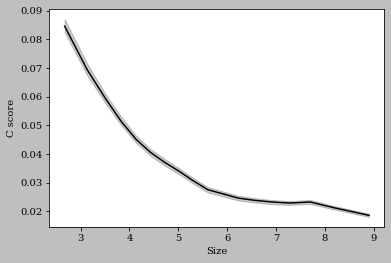

##### Plot for x:m_b, y:c_NNy_kw_final_C #####


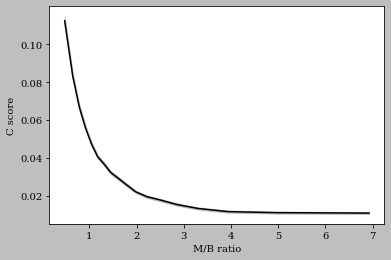

##### Plot for x:flev, y:c_NNy_kw_final_C #####


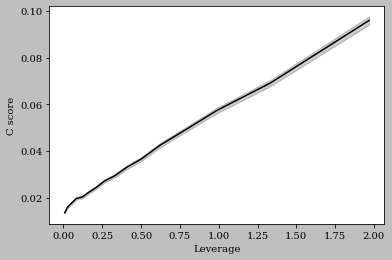

##### Plot for x:yvolatd, y:c_NNy_kw_final_C #####


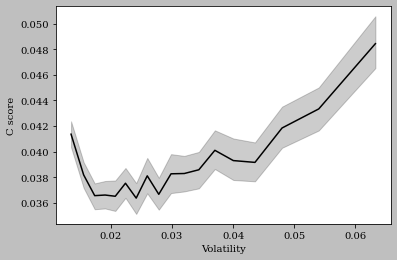

##### Plot for x:noacc, y:c_NNy_kw_final_C #####


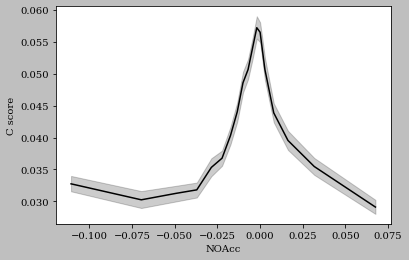

##### Plot for x:cfoa, y:c_NNy_kw_final_C #####


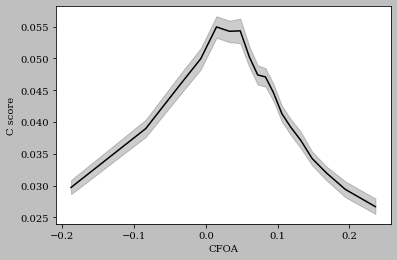

##### Plot for x:invcycle, y:c_NNy_kw_final_C #####


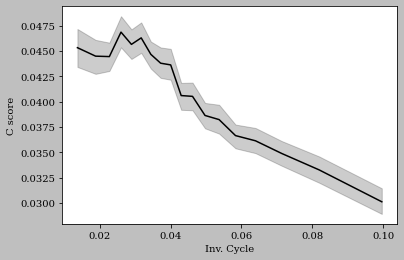

##### Plot for x:age, y:c_NNy_kw_final_C #####


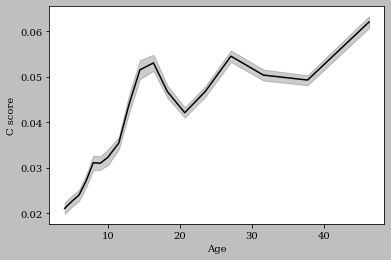

##### Plot for x:problit, y:c_NNy_kw_final_C #####


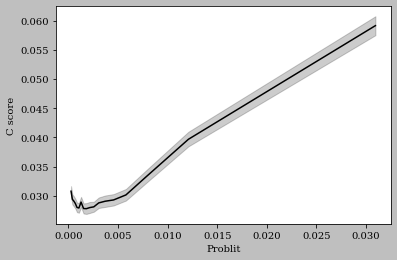

##### Plot for x:pin, y:c_NNy_kw_final_C #####


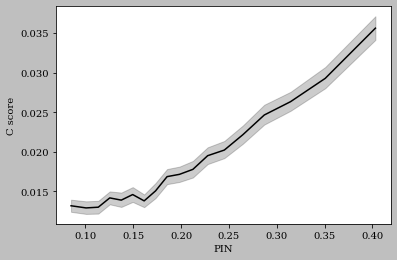

##### Plot for x:dbas, y:c_NNy_kw_final_C #####


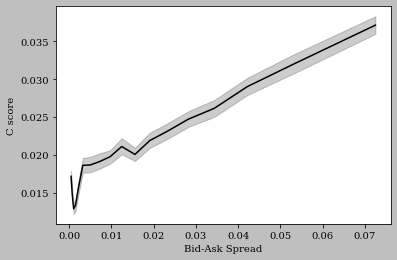

In [79]:
# Basic
cs.plot_all_vars('c_NNy_basic_final_C', data, specparam_basic, nq=nq, quantiles=True, xlim=xlim, sample='full')
# KW
cs.plot_all_vars('c_NNy_kw_final_C', data, specparam_kw, nq=nq, quantiles=True, xlim=xlim, sample='full')

# Laboratory Experiments

## Robust laboratory

In [64]:
n_iter_lab=100

In [149]:
print('# Errors with no noise #')
cs.table_lab_robust(n_iter_lab, table='errors', noise_var=0, coef_cscore=0)

# Errors with no noise #


DGP                                              \
                         L1        L1y       MLC1      MLC1y         L2   
Estimation L1y     0.422***   0.223***   1.044***   0.785***   1.448***   
                  [163.536]  [179.337]    [299.0]  [264.396]  [400.423]   
           MLC1    0.287***   0.528***    0.16***   0.469***   1.458***   
                  [126.712]  [876.061]   [53.258]  [429.501]  [436.168]   
           MLC1y   0.472***   0.356***   0.529***    0.33***    1.26***   
                  [119.118]  [313.932]   [87.668]   [79.777]  [306.028]   
           L2      0.061***   0.474***   0.561***   0.594***   0.062***   
                   [38.566]   [921.03]  [234.252]  [349.548]   [30.052]   
           L2y     0.689***   0.325***   1.199***   0.847***   0.648***   
                  [235.515]  [254.508]  [274.604]  [294.085]  [261.234]   
           MLC2    0.333***   0.524***   0.273***   0.462***   0.441***   
                  [111.492]  [641.096]   [68.725]  [243.505]  [151.695]   
           MLC2y   0.571***   0.411***   0.644***   0.402***   0.562***   
                   [73.765]   [226.23]   [73.954]   [64.707]  [148.565]   

                                                    
                         L2y       MLC2      MLC2y  
Estimation L1y      0.771***   4.949***   2.106***  
                   [609.142]  [518.484]  [550.636]  
           MLC1     0.873***   4.454***   1.734***  
                   [873.679]  [430.505]  [403.679]  
           MLC1y    0.771***   3.521***   1.479***  
                   [596.826]   [303.83]  [278.008]  
           L2       0.555***   2.025***   0.793***  
                  [2231.862]  [311.836]  [357.783]  
           L2y      0.304***   3.299***   1.432***  
                    [239.56]  [363.851]  [406.629]  
           MLC2     0.584***   0.505***   0.408***  
                  [1017.629]   [48.984]  [192.465]  
           MLC2y    0.551***   0.931***   0.376***  
                   [638.046]   [43.564]   [57.685]

In [155]:
print('# Coefs with no noise and coef C score=3 #')
cs.table_lab_robust(n_iter_lab, table='coefs', noise_var=0, coef_cscore=3)

# Coefs with no noise and coef C score=3 #


DGP                                              \
                        L1        L1y       MLC1      MLC1y         L2   
Estimation L1y       0.0**   2.484***   0.276***   1.082***   -0.02***   
                   [2.018]   [230.96]   [60.476]  [160.818]    [-7.79]   
           MLC1       -0.0   0.107***    3.01***   1.531***   0.288***   
                  [-0.297]    [8.102]   [206.36]  [132.747]   [15.103]   
           MLC1y      -0.0   2.413***    1.39***   2.007***     0.1***   
                  [-0.807]  [125.625]   [58.224]  [107.935]   [16.528]   
           L2          0.0   0.956***   1.775***   0.709***   3.015***   
                   [0.446]   [44.757]   [49.845]   [93.809]  [213.681]   
           L2y         0.0   1.933***   0.082***   0.636***   0.586***   
                   [0.629]  [197.445]   [39.644]  [111.926]  [103.649]   
           MLC2       -0.0   0.387***   2.663***   1.479***   2.641***   
                  [-0.941]   [25.188]  [114.061]   [60.376]  [129.764]   
           MLC2y      -0.0   1.925***   0.909***   1.634***   1.222***   
                   [-0.67]    [70.23]   [35.034]    [59.57]   [33.008]   

                                                   
                        L2y       MLC2      MLC2y  
Estimation L1y     1.633***  -0.053***   0.153***  
                   [181.13]  [-58.125]   [46.148]  
           MLC1    0.549***   0.274***   0.268***  
                   [37.712]   [47.134]   [38.091]  
           MLC1y   1.193***  -0.008***   0.386***  
                   [67.092]   [-3.712]   [62.002]  
           L2      2.299***   0.332***   1.264***  
                  [217.018]  [131.687]  [188.003]  
           L2y     2.452***   0.026***   0.367***  
                  [232.309]   [30.412]   [113.72]  
           MLC2    2.562***   1.638***   1.916***  
                   [57.879]   [30.438]    [37.26]  
           MLC2y   2.298***   0.571***   1.809***  
                   [85.861]   [22.549]   [59.236]

In [153]:
print('# Coefs with no noise and coef C score=0 #')
#cs.table_lab_robust(n_iter_lab, table='coefs', noise_var=0, coef_cscore=0)
cs.table_lab_robust(100, table='coefs', noise_var=0, coef_cscore=0)

# Coefs with no noise and coef C score=0 #


DGP                                                    \
                        L1       L1y      MLC1     MLC1y        L2       L2y   
Estimation L1y       0.0**    0.0***       0.0       0.0     -0.0*      -0.0   
                   [1.917]   [2.898]   [0.592]   [0.154]  [-1.402]   [-0.22]   
           MLC1       -0.0      -0.0       0.0       0.0       0.0       0.0   
                  [-0.447]  [-0.694]   [0.434]   [0.072]   [1.172]   [0.314]   
           MLC1y      -0.0      0.0*      -0.0       0.0       0.0      -0.0   
                  [-0.772]   [1.514]  [-0.859]   [0.547]   [0.424]  [-0.964]   
           L2          0.0     0.0**      -0.0     -0.0*       0.0      -0.0   
                   [0.925]    [1.75]  [-1.018]  [-1.476]   [0.155]  [-0.973]   
           L2y         0.0      0.0*      -0.0       0.0    -0.0**      -0.0   
                    [0.46]   [1.585]  [-0.152]   [0.975]  [-1.821]  [-0.979]   
           MLC2       -0.0      -0.0      -0.0      -0.0      -0.0      -0.0   
                  [-0.996]  [-0.959]  [-1.133]  [-0.573]  [-0.258]  [-0.097]   
           MLC2y      -0.0   -0.0***      -0.0     -0.0*      -0.0    -0.0**   
                  [-0.733]  [-2.675]  [-0.558]  [-1.504]  [-0.682]  [-1.842]   

                                      
                      MLC2     MLC2y  
Estimation L1y      -0.0**      -0.0  
                  [-2.008]   [-0.35]  
           MLC1        0.0     0.0**  
                   [0.036]   [1.731]  
           MLC1y       0.0      0.0*  
                   [0.372]   [1.555]  
           L2          0.0      -0.0  
                   [0.644]  [-0.712]  
           L2y         0.0       0.0  
                   [0.881]   [0.176]  
           MLC2       -0.0      -0.0  
                  [-0.078]  [-1.227]  
           MLC2y       0.0       0.0  
                   [0.247]   [0.139]

In [71]:
print('# Fraction of significant coefs with noise (5) and coef C score=3 #')
cs.table_lab_sig(n_iter_lab, noise_var=5, coef_cscore=3)

# Fraction of significant coefs with noise (5) and coef C score=3 #


DGP                                          
                    L1   L1y  MLC1 MLC1y    L2   L2y  MLC2 MLC2y
Estimation L1y    0.02  1.00  0.41  1.00  0.01  1.00  0.03  0.19
           MLC1   0.01  0.03  1.00  1.00  0.01  0.16  0.05  0.07
           MLC1y  0.03  1.00  1.00  1.00  0.01  1.00  0.02  0.79
           L2     0.01  0.37  0.42  0.17  1.00  1.00  0.09  0.98
           L2y    0.01  1.00  0.05  1.00  1.00  1.00  0.02  0.96
           MLC2   0.00  0.16  1.00  0.96  1.00  1.00  0.71  0.95
           MLC2y  0.00  1.00  0.99  1.00  1.00  1.00  0.38  1.00

In [16]:
print('# Fraction of significant coefs with noise (5) and coef C score=0 #')
cs.table_lab_sig(n_iter_lab, noise_var=5, coef_cscore=0)

# Fraction of significant coefs with noise (5) and coef C score=0 #


DGP                                          
                    L1   L1y  MLC1 MLC1y    L2   L2y  MLC2 MLC2y
Estimation L1y    0.02  0.01  0.02  0.00  0.02  0.01  0.00  0.02
           MLC1   0.00  0.00  0.00  0.00  0.02  0.00  0.00  0.01
           MLC1y  0.00  0.01  0.02  0.00  0.03  0.00  0.01  0.01
           L2     0.01  0.00  0.03  0.00  0.00  0.02  0.00  0.00
           L2y    0.00  0.02  0.02  0.02  0.01  0.00  0.01  0.01
           MLC2   0.00  0.00  0.01  0.01  0.01  0.03  0.00  0.00
           MLC2y  0.01  0.00  0.02  0.02  0.02  0.00  0.03  0.01

# Robustness Tests

## 1 - Neural Networks without positivity constraints

### Cross-Validation

      n_iterations  layer_size  learning_rate   r2valid
1280          8000          35          0.001  0.213979


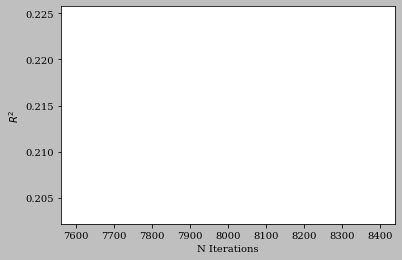

      n_iterations  layer_size  learning_rate   r2valid
80            8000           5          0.001  0.190840
280           8000          10          0.001  0.210238
480           8000          15          0.001  0.209084
680           8000          20          0.001  0.213596
880           8000          25          0.001  0.208666
1080          8000          30          0.001  0.211148
1280          8000          35          0.001  0.213979
1480          8000          40          0.001  0.211981
1680          8000          45          0.001  0.212384
1880          8000          50          0.001  0.210811


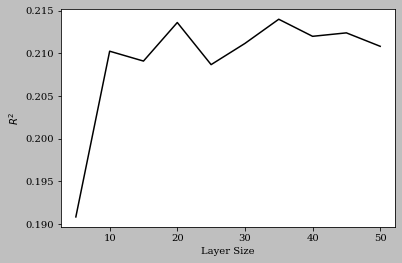

      n_iterations  layer_size  learning_rate   r2valid
1280          8000          35          0.001  0.213979


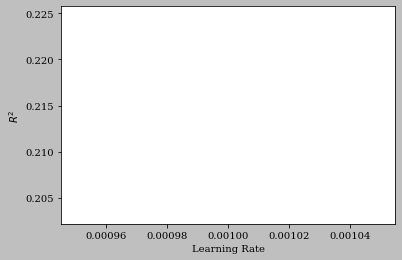

In [157]:
# Basic - Without years FE
cs.plot_cv(specparam_basic, 'nn', yfe=False, min_niter=3000, params={'n_iterations': 8000}, suffix='_robust_nopos')

In [167]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
opt_basic = {'n_iterations': 8000, 'layer_size': 35, 'learning_rate': 1e-3, 'verbose': 1}

      n_iterations  layer_size  learning_rate  r2valid
1630          3000          45          0.001  0.29295


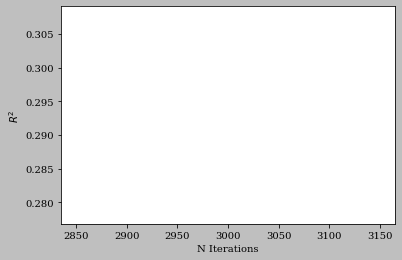

      n_iterations  layer_size  learning_rate   r2valid
30            3000           5          0.001  0.268937
230           3000          10          0.001  0.280743
430           3000          15          0.001  0.285660
630           3000          20          0.001  0.288593
830           3000          25          0.001  0.277455
1030          3000          30          0.001  0.283822
1230          3000          35          0.001  0.283697
1430          3000          40          0.001  0.283515
1630          3000          45          0.001  0.292950
1830          3000          50          0.001  0.288481


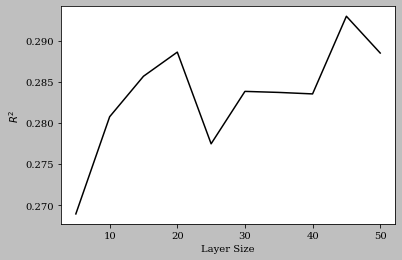

      n_iterations  layer_size  learning_rate  r2valid
1630          3000          45          0.001  0.29295


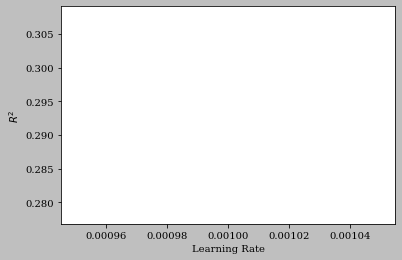

In [161]:
# Basic - With years FE
cs.plot_cv(specparam_basic, 'nn', yfe=True, min_niter=1500, max_niter=10000, params={'n_iterations': 3000}, suffix='_robust_nopos')

In [168]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
opt_basic_yfe = {'n_iterations': 3000, 'layer_size': 45, 'learning_rate': 1e-3, 'verbose': 1}

      n_iterations  layer_size  learning_rate   r2valid
1821          2100          50          0.001  0.407659
1422          2200          40          0.001  0.408120
1423          2300          40          0.001  0.410918
1424          2400          40          0.001  0.412907
1425          2500          40          0.001  0.415920
...            ...         ...            ...       ...
395          19500          10          0.001  0.443662
396          19600          10          0.001  0.443550
397          19700          10          0.001  0.443531
398          19800          10          0.001  0.443508
399          19900          10          0.001  0.443494

[179 rows x 4 columns]


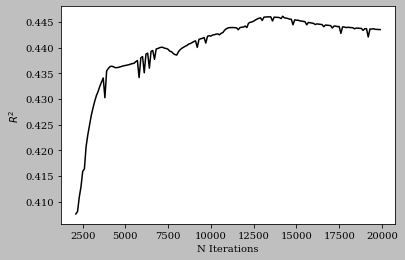

      n_iterations  layer_size  learning_rate   r2valid
199          19900           5          0.001  0.421968
342          14200          10          0.001  0.446088
599          19900          15          0.001  0.433812
797          19700          20          0.001  0.441079
999          19900          25          0.001  0.436233
1085          8500          30          0.001  0.432783
1274          7400          35          0.001  0.437495
1471          7100          40          0.001  0.440063
1650          5000          45          0.001  0.425289
1854          5400          50          0.001  0.425370


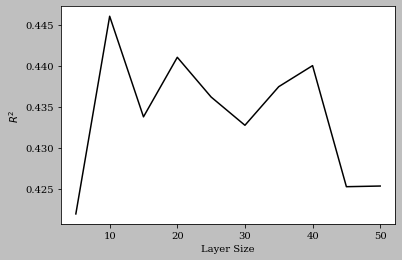

     n_iterations  layer_size  learning_rate   r2valid
342         14200          10          0.001  0.446088


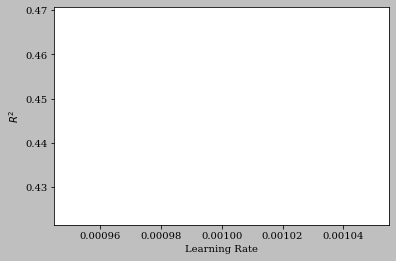

In [142]:
# KW - Without years FE
cs.plot_cv(specparam_kw, 'nn', yfe=False, min_niter=2000, params={}, suffix='_robust_nopos')#, params={'layer_size': 30})

In [169]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
opt_kw = {'n_iterations': 15000, 'layer_size': 10, 'learning_rate': 1e-3, 'verbose': 1}

     n_iterations  layer_size  learning_rate   r2valid
240          4000          10          0.001  0.470904


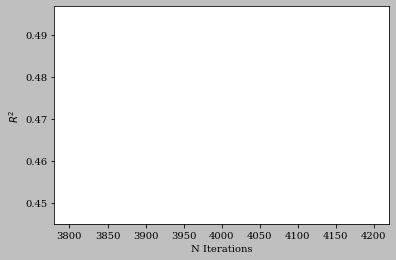

      n_iterations  layer_size  learning_rate   r2valid
40            4000           5          0.001  0.460741
240           4000          10          0.001  0.470904
440           4000          15          0.001  0.452107
640           4000          20          0.001  0.456408
840           4000          25          0.001  0.449103
1040          4000          30          0.001  0.430722
1240          4000          35          0.001  0.437137
1440          4000          40          0.001  0.445225
1640          4000          45          0.001  0.425247
1840          4000          50          0.001  0.454458


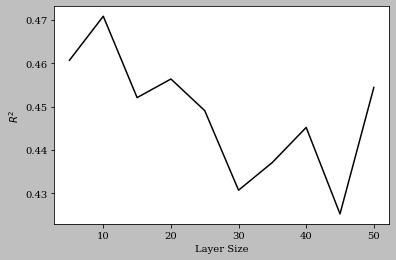

     n_iterations  layer_size  learning_rate   r2valid
240          4000          10          0.001  0.470904


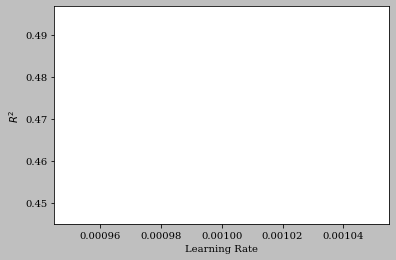

In [163]:
# KW - With years FE
cs.plot_cv(specparam_kw, 'nn', yfe=True, min_niter=2000, params={'n_iterations': 4000}, suffix='_robust_nopos')#, params={'layer_size': 25})

In [170]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
opt_kw_yfe = {'n_iterations': 4000, 'layer_size': 10, 'learning_rate': 1e-3, 'verbose': 1}

### Training

In [171]:
# Without Years FE
recompute = True
suffix = '_robust_nopos'
pos_constraint = False

print("#### Train for specification 'basic' #####")
print(opt_basic)
print('Training Sample')
_, NN_r2_basic_train = cs.train_nn(data, specparam_basic, cv=False, fullsample=False, params=opt_basic, recompute=recompute, yfe=False, pos_constraint=pos_constraint, suffix=suffix)
print('Full Sample')
NN_basic, NN_r2_basic = cs.train_nn(data, specparam_basic, cv=False, fullsample=True, params=opt_basic, recompute=recompute, yfe=False, pos_constraint=pos_constraint, suffix=suffix)
print("#### Train for specification 'kw' #####")
print(opt_kw)
print('Training Sample')
_, NN_r2_kw_train = cs.train_nn(data, specparam_kw, cv=False, fullsample=False, params=opt_kw, recompute=recompute, yfe=False, pos_constraint=pos_constraint, suffix=suffix)
print('Full Sample')
NN_kw, NN_r2_kw = cs.train_nn(data, specparam_kw, cv=False, fullsample=True, params=opt_kw, recompute=recompute, yfe=False, pos_constraint=pos_constraint, suffix=suffix)

print("##### R2 Training #####")
print('Basic: ', NN_r2_basic_train)
print('KW: ', NN_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', NN_r2_basic)
print('KW: ', NN_r2_kw)

#### Train for specification 'basic' #####
{'n_iterations': 8000, 'layer_size': 35, 'learning_rate': 0.001, 'verbose': 1}
Training Sample
Full Sample
#### Train for specification 'kw' #####
{'n_iterations': 15000, 'layer_size': 10, 'learning_rate': 0.001, 'verbose': 1}
Training Sample
Full Sample
##### R2 Training #####
Basic:  {'train': 0.2244071364402771, 'test': 0.19716531038284302}
KW:  {'train': 0.47346246242523193, 'test': 0.4442538619041443}
##### R2 Full #####
Basic:  {'full': 0.2202969193458557}
KW:  {'full': 0.4699056148529053}


In [172]:
# With Years FE
recompute = True
suffix = '_robust_nopos'
pos_constraint = False

print("#### Train for specification 'basic' #####")
print(opt_basic_yfe)
print('Training Sample')
_, NNy_r2_basic_train = cs.train_nn(data, specparam_basic, cv=False, fullsample=False, params=opt_basic_yfe, recompute=recompute, yfe=True, pos_constraint=pos_constraint, suffix=suffix)
print('Full Sample')
NNy_basic, NNy_r2_basic = cs.train_nn(data, specparam_basic, cv=False, fullsample=True, params=opt_basic_yfe, recompute=recompute, yfe=True, pos_constraint=pos_constraint, suffix=suffix)
print("#### Train for specification 'kw' #####")
print(opt_kw_yfe)
print('Training Sample')
_, NNy_r2_kw_train = cs.train_nn(data, specparam_kw, cv=False, fullsample=False, params=opt_kw_yfe, recompute=recompute, yfe=True, pos_constraint=pos_constraint, suffix=suffix)
print('Full Sample')
NNy_kw, NNy_r2_kw = cs.train_nn(data, specparam_kw, cv=False, fullsample=True, params=opt_kw_yfe, recompute=recompute, yfe=True, pos_constraint=pos_constraint, suffix=suffix)

print("##### R2 Training #####")
print('Basic: ', NNy_r2_basic_train)
print('KW: ', NNy_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', NNy_r2_basic)
print('KW: ', NNy_r2_kw)

#### Train for specification 'basic' #####
{'n_iterations': 3000, 'layer_size': 45, 'learning_rate': 0.001, 'verbose': 1}
Training Sample
Full Sample
#### Train for specification 'kw' #####
{'n_iterations': 4000, 'layer_size': 10, 'learning_rate': 0.001, 'verbose': 1}
Training Sample
Full Sample
##### R2 Training #####
Basic:  {'train': 0.3293558359146118, 'test': 0.2963957190513611}
KW:  {'train': 0.5196795165538788, 'test': 0.4860597252845764}
##### R2 Full #####
Basic:  {'full': 0.32469111680984497}
KW:  {'full': 0.5188511908054352}


## Compute

In [185]:
data_rob1 = data.copy()
# Compute the C Scores
data_rob1['c_L_basic'] = cs.c(L_basic, data, specparam_basic)
data_rob1['c_L_kw'] = cs.c(L_kw, data, specparam_kw)
data_rob1['c_Lfmy_basic'] = cs.c_score_fmy(data, specparam_basic, fullsample=True)
data_rob1['c_Lfmy_kw'] = cs.c_score_fmy(data, specparam_kw, fullsample=True)
data_rob1['c_NN_basic'] = cs.c_score_nn(NN_basic, data, specparam_basic, yfe=False)
data_rob1['c_NN_kw'] = cs.c_score_nn(NN_kw, data, specparam_kw, yfe=False)
data_rob1['c_NNy_basic'] = cs.c_score_nn(NNy_basic, data, specparam_basic, yfe=True)
data_rob1['c_NNy_kw'] = cs.c_score_nn(NNy_kw, data, specparam_kw, yfe=True)
# Compute the G Scores
data_rob1['g_L_basic'] = cs.g(L_basic, data, specparam_basic)
data_rob1['g_L_kw'] = cs.g(L_kw, data, specparam_kw)
data_rob1['g_Lfmy_basic'] = cs.g_score_fmy(data, specparam_basic, fullsample=True)
data_rob1['g_Lfmy_kw'] = cs.g_score_fmy(data, specparam_kw, fullsample=True)
data_rob1['g_NN_basic'] = cs.g_score_nn(NN_basic, data, specparam_basic, yfe=False)
data_rob1['g_NN_kw'] = cs.g_score_nn(NN_kw, data, specparam_kw, yfe=False)
data_rob1['g_NNy_basic'] = cs.g_score_nn(NNy_basic, data, specparam_basic, yfe=True)
data_rob1['g_NNy_kw'] = cs.g_score_nn(NNy_kw, data, specparam_kw, yfe=True)
# Compute G+C Scores
data_rob1['gc_L_basic'] = data.g_L_basic + data.c_L_basic
data_rob1['gc_L_kw'] = data.g_L_kw + data.c_L_kw
data_rob1['gc_Lfmy_basic'] = data.g_Lfmy_basic + data.c_Lfmy_basic
data_rob1['gc_Lfmy_kw'] = data.g_Lfmy_kw + data.c_Lfmy_kw
data_rob1['gc_NN_basic'] = data.g_NN_basic + data.c_NN_basic
data_rob1['gc_NN_kw'] = data.g_NN_kw + data.c_NN_kw
data_rob1['gc_NNy_basic'] = data.g_NNy_basic + data.c_NNy_basic
data_rob1['gc_NNy_kw'] = data.g_NNy_kw + data.c_NNy_kw

### Fit

In [177]:
models1 = {'train_models': [NN_r2_basic_train, NNy_r2_basic_train],
          'full_models': [NN_r2_basic, NNy_r2_basic]}
models2 = {'train_models': [NN_r2_kw_train, NNy_r2_kw_train],
          'full_models': [NN_r2_kw, NNy_r2_kw]}

labels1 = ['MLC1', 'MLC1y']
labels2 = ['MLC2', 'MLC2y']

In [178]:
cs.fit_table(models1, labels1, suffix='1_robust_nopos')

MLC1     MLC1y
Training Sample  0.224407  0.329356
Test Sample      0.197165  0.296396
Full Sample      0.220297  0.324691

In [179]:
cs.fit_table(models2, labels2, suffix='2_robust_nopos')

MLC2     MLC2y
Training Sample  0.473462  0.519680
Test Sample      0.444254  0.486060
Full Sample      0.469906  0.518851

## Densities G and G+C

G Score


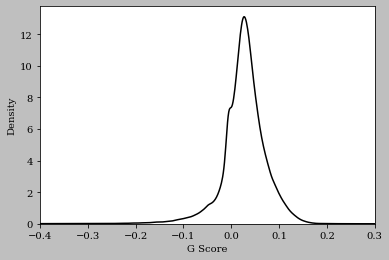

G+C Scores


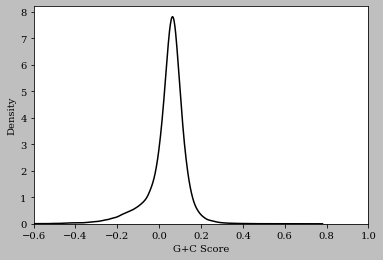

In [250]:
# Densities g and g+c scores
print('G Score')
xlim=(-.4, .3)
cs.plot_score_density('g_NN_kw', data_rob1, specparam_basic, sample='full', xlim=xlim, score='G Score', suffix='_robust_nopos')
print('G+C Scores')
xlim=(-.6, 1.)
cs.plot_score_density('gc_NN_kw', data_rob1, specparam_basic, sample='full', xlim=xlim, score='G+C Score', suffix='_robust_nopos')


### Time Series

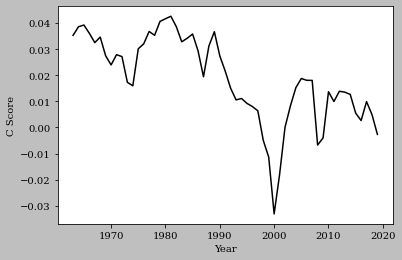

In [251]:
# Plot MLC2 without the standard errors
cs.plot_time(data_rob1, specparam_kw, 'c_NN', estimator=estimator, ci=None, suffix='_robust_nopos_nosd')

<Figure size 720x360 with 0 Axes>

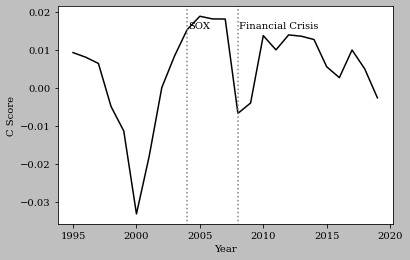

In [252]:
from matplotlib.pyplot import figure
figure(figsize=(10,5))
cs.plot_time(data_rob1[data_rob1.fyear>=1995], specparam_kw, 'c_NN', estimator=estimator, ci=None, suffix='_robust_nopos_nosd_post2000', add_events=True)

## Analysis of negative G and G+C observations

In [253]:
cs.desc_stats(data_rob1[data_rob1.g_NN_kw < 0], specparam_basic, suffix='_neg_g_nn')

count       mean        std        min       25%       50%  \
Earnings        37910  -0.154508   0.314541  -2.796728 -0.212255 -0.069291   
Return          37910   0.207865   1.304835  -0.962464 -0.496553 -0.133216   
Size            37910   4.754992   2.240600  -0.098364  3.137928  4.550045   
M/B ratio       37910   4.289319  10.527558 -60.220364  0.839660  1.867523   
Leverage        37910   0.773040   2.041326   0.000000  0.000182  0.046483   
Volatility      37910   0.049221   0.022873   0.001961  0.032964  0.045356   
NOAcc           37910  -0.068308   0.177109  -3.484312 -0.087283 -0.024471   
CFOA            37910  -0.139690   0.329799  -4.808947 -0.241991 -0.042720   
Inv. Cycle      37910   0.051899   0.048840   0.000000  0.022129  0.040122   
Age             37910  11.688661  10.124558   1.000000  5.002740  8.090411   
Problit         30353   0.083689   0.249967   0.000000  0.000383  0.001381   
PIN             20687   0.220682   0.114363   0.000000  0.142000  0.199000   
Bid-Ask Spread  30269   0.029374   0.039161   0.000118  0.003534  0.014207   

                      75%        max  
Earnings         0.014379   1.150493  
Return           0.397542  12.904747  
Size             6.114393  11.532546  
M/B ratio        6.070174  92.052177  
Leverage         0.298375  22.361755  
Volatility       0.061541   0.144385  
NOAcc            0.000000   0.708343  
CFOA             0.052146   0.611941  
Inv. Cycle       0.066058   0.634297  
Age             15.010959  90.706848  
Problit          0.006109   1.000000  
PIN              0.275000   1.000000  
Bid-Ask Spread   0.039404   0.280801

In [254]:
cs.desc_stats(data_rob1[data_rob1.gc_NN_kw < 0], specparam_basic, suffix='_neg_gc_nn')

count       mean        std        min       25%       50%  \
Earnings        37237  -0.146130   0.310331  -2.796728 -0.206451 -0.067834   
Return          37237   0.199481   1.319545  -0.962464 -0.528253 -0.152795   
Size            37237   5.090854   2.446108  -0.069994  3.322722  4.643000   
M/B ratio       37237   3.113327   7.865871 -60.220364  0.743871  2.006116   
Leverage        37237   0.833931   2.168260   0.000000  0.003806  0.092568   
Volatility      37237   0.051371   0.023283   0.005700  0.035313  0.048127   
NOAcc           37237  -0.067163   0.183944  -3.571336 -0.081418 -0.023406   
CFOA            37237  -0.148496   0.338724  -4.808947 -0.259030 -0.050212   
Inv. Cycle      37237   0.055457   0.050512   0.000000  0.024983  0.043114   
Age             37237  14.507041  17.559107   1.000000  5.002740  8.005480   
Problit         29849   0.095881   0.267764   0.000000  0.000455  0.001945   
PIN             21399   0.209956   0.114417   0.000000  0.131000  0.191000   
Bid-Ask Spread  30736   0.030601   0.040637   0.000118  0.003515  0.014747   

                         75%        max  
Earnings        2.281978e-02   1.150493  
Return          3.888496e-01  12.904747  
Size            6.362330e+00  11.532546  
M/B ratio       4.679112e+00  92.052177  
Leverage        4.249323e-01  22.361755  
Volatility      6.439812e-02   0.144385  
NOAcc           1.990803e-08   0.708343  
CFOA            5.915530e-02   0.611941  
Inv. Cycle      7.035141e-02   0.634297  
Age             1.541644e+01  94.063011  
Problit         8.580199e-03   1.000000  
PIN             2.670000e-01   1.000000  
Bid-Ask Spread  4.168911e-02   0.280801

In [ ]:
df = data[data.gc_Lfmy < 0]

## 2 - Train / Validation / Testing samples using years

In [294]:
#data = cs.prepare_data("data/data_old/data.parquet")
data = cs.prepare_data("data/data.parquet")
#cs.define_samples(data)
specparam_basic = cs.get_specparam('basic', samples='years')
specparam_kw = cs.get_specparam('kw', samples='years')
specparam_rep = cs.get_specparam('replication', samples='years')

In [295]:
df_cvtrain = cs.cv_train_sample(data, specparam_basic)
df_cvvalid = cs.cv_valid_sample(data, specparam_basic)
df_train = cs.train_sample(data, specparam_basic)
df_test = cs.test_sample(data, specparam_basic)
print('CV Train: ', df_cvtrain.fyear.min(), df_cvtrain.fyear.max())
print('CV Validation: ', df_cvvalid.fyear.min(), df_cvvalid.fyear.max())
print('Train: ', df_train.fyear.min(), df_train.fyear.max())
print('Test: ', df_test.fyear.min(), df_test.fyear.max())

CV Train:  1963 1994
CV Validation:  1995 2008
Train:  1963 2008
Test:  2009 2019


### Cross-Validation Neural Network

    n_iterations  layer_size  learning_rate   r2valid
7           1000          40          0.001  0.040228
17          2000          40          0.001  0.102372
27          3000          40          0.001  0.117625
33          4000          20          0.001  0.122596
43          5000          20          0.001  0.128932
53          6000          20          0.001  0.131079
63          7000          20          0.001  0.129919
73          8000          20          0.001  0.132204


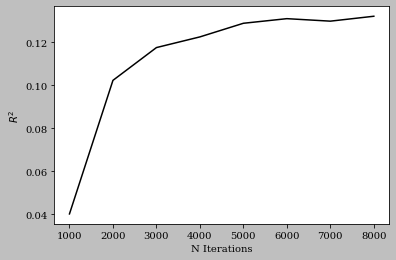

    n_iterations  layer_size  learning_rate   r2valid
70          8000           5          0.001  0.108537
71          8000          10          0.001  0.125506
72          8000          15          0.001  0.124864
73          8000          20          0.001  0.132204
74          8000          25          0.001  0.127684
75          8000          30          0.001  0.130506
76          8000          35          0.001  0.123382
37          4000          40          0.001  0.120801
78          8000          45          0.001  0.124855
69          7000          50          0.001  0.122908


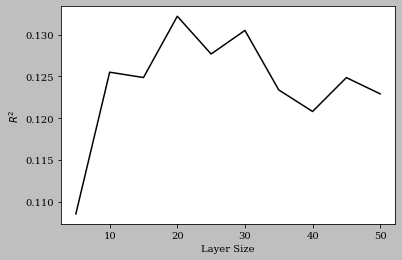

    n_iterations  layer_size  learning_rate   r2valid
73          8000          20          0.001  0.132204


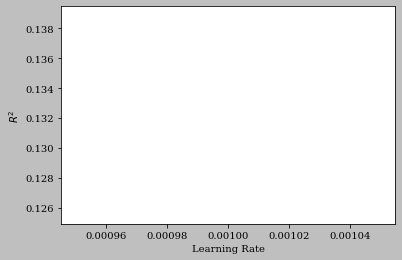

In [300]:
# Basic Without years FE
cs.plot_cv(specparam_basic, 'nn', suffix='_years', yfe=False)

In [20]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
opt_basic = {'n_iterations': 10000, 'layer_size': 10, 'learning_rate': 1e-3, 'verbose': 1} # 04-20-2021 (learning_rate=1e-3)

    n_iterations  layer_size  learning_rate   r2valid
6           1000          35          0.001 -0.021690
13          2000          20          0.001  0.157098
23          3000          20          0.001  0.216848
33          4000          20          0.001  0.267274
43          5000          20          0.001  0.287915
57          6000          40          0.001  0.301651
67          7000          40          0.001  0.313878
77          8000          40          0.001  0.314989


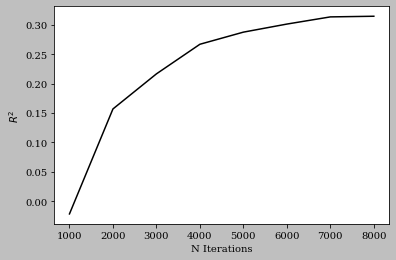

    n_iterations  layer_size  learning_rate   r2valid
70          8000           5          0.001  0.306481
51          6000          10          0.001  0.236921
72          8000          15          0.001  0.303029
43          5000          20          0.001  0.287915
74          8000          25          0.001  0.292253
75          8000          30          0.001  0.283902
76          8000          35          0.001  0.271907
77          8000          40          0.001  0.314989
78          8000          45          0.001 -0.036182
69          7000          50          0.001  0.208528


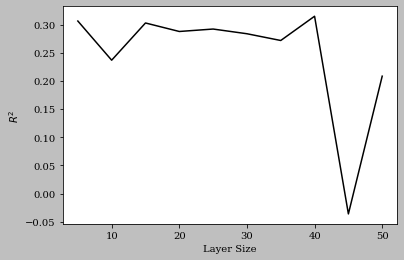

    n_iterations  layer_size  learning_rate   r2valid
77          8000          40          0.001  0.314989


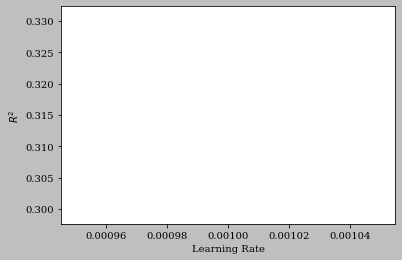

In [302]:
# KE Without years FE
cs.plot_cv(specparam_kw, 'nn', suffix='_years', yfe=False)

In [21]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
opt_kw = {'n_iterations': 12000, 'layer_size': 10, 'learning_rate': 1e-3, 'verbose': 1} # 04-20-2021 (learning_rate=1e-3)

### Training

In [18]:
##### Linear #####
recompute = True
suffix = '_years'
# Train the models
L_basic_train, L_r2_basic_train = cs.train_linear(data, specparam_basic, fullsample=False, recompute=recompute, suffix=suffix)
L_basic, L_r2_basic= cs.train_linear(data, specparam_basic, fullsample=True, recompute=recompute, suffix=suffix)
L_kw_train, L_r2_kw_train = cs.train_linear(data, specparam_kw, fullsample=False, recompute=recompute, suffix=suffix)
L_kw, L_r2_kw= cs.train_linear(data, specparam_kw, fullsample=True, recompute=recompute, suffix=suffix)
print("##### R2 Training #####")
print('Basic: ', L_r2_basic_train)
print('KW: ', L_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', L_r2_basic)
print('KW: ', L_r2_kw)

##### R2 Training #####
Basic:  {'train': 0.12001605934605397, 'test': 0.10292104745598096}
KW:  {'train': 0.30173008459590145, 'test': 0.33380857780446005}
##### R2 Full #####
Basic:  {'full': 0.11352603974242947}
KW:  {'full': 0.31565056257157664}


In [22]:
##### Neural Networks without Years FE #####
recompute = True
suffix = '_years'

print("#### Train for specification 'basic' #####")
print(opt_basic)
print('Training Sample')
_, NN_r2_basic_train = cs.train_nn(data, specparam_basic, cv=False, fullsample=False, params=opt_basic, recompute=recompute, yfe=False, suffix=suffix)
print('Full Sample')
NN_basic, NN_r2_basic = cs.train_nn(data, specparam_basic, cv=False, fullsample=True, params=opt_basic, recompute=recompute, yfe=False, suffix=suffix)
print("#### Train for specification 'kw' #####")
print(opt_kw)
print('Training Sample')
_, NN_r2_kw_train = cs.train_nn(data, specparam_kw, cv=False, fullsample=False, params=opt_kw, recompute=recompute, yfe=False, suffix=suffix)
print('Full Sample')
NN_kw, NN_r2_kw = cs.train_nn(data, specparam_kw, cv=False, fullsample=True, params=opt_kw, recompute=recompute, yfe=False, suffix=suffix)

print("##### R2 Training #####")
print('Basic: ', NN_r2_basic_train)
print('KW: ', NN_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', NN_r2_basic)
print('KW: ', NN_r2_kw)

#### Train for specification 'basic' #####
{'n_iterations': 10000, 'layer_size': 10, 'learning_rate': 0.001, 'verbose': 1}
Training Sample
Full Sample
#### Train for specification 'kw' #####
{'n_iterations': 12000, 'layer_size': 10, 'learning_rate': 0.001, 'verbose': 1}
Training Sample
Full Sample
##### R2 Training #####
Basic:  {'train': 0.22302502393722534, 'test': 0.14813238382339478}
KW:  {'train': 0.42515885829925537, 'test': 0.4486157298088074}
##### R2 Full #####
Basic:  {'full': 0.2061442732810974}
KW:  {'full': 0.4481847286224365}


### Fit

In [29]:
models = {'train_models': [L_r2_basic_train, NN_r2_basic_train, L_r2_kw_train, NN_r2_kw_train],
          'full_models': [L_r2_basic, NN_r2_basic, L_r2_kw, NN_r2_kw]}

labels = ['L1', 'MLC1', 'L2', 'MLC2']

In [30]:
cs.fit_table(models, labels, suffix='_years')

L1      MLC1        L2      MLC2
Training Sample  0.120016  0.223025  0.301730  0.425159
Test Sample      0.102921  0.148132  0.333809  0.448616
Full Sample      0.113526  0.206144  0.315651  0.448185

## 3 -  Use data after 2004

In [34]:
#data = cs.prepare_data("data/data_old/data.parquet")
data = cs.prepare_data("data/data.parquet", min_year=2004)
cs.define_samples(data, suffix='_post2004')
specparam_basic = cs.get_specparam('basic', suffix='_post2004')
specparam_kw = cs.get_specparam('kw', suffix='_post2004')

In [81]:
print(data.fyear.min(), data.fyear.max())
df_cvtrain = cs.cv_train_sample(data, specparam_basic)
df_cvvalid = cs.cv_valid_sample(data, specparam_basic)
df_train = cs.train_sample(data, specparam_basic)
df_test = cs.test_sample(data, specparam_basic)
print('CV Train: ', len(df_cvtrain))
print('CV Validation: ', len(df_cvvalid))
print('Train: ', len(df_train))
print('Test: ', len(df_test))

2004 2019
CV Train:  36080
CV Validation:  21654
Train:  57734
Test:  14434


### Cross-Validation Neural Network

#### Basic specification

    n_iterations  layer_size  learning_rate   r2valid
23          1000          40          0.001  0.166480
31          2000          40          0.001  0.195046
41          3000          50          0.001  0.208240
49          4000          50          0.001  0.215469
57          5000          50          0.001  0.220398
65          6000          50          0.001  0.223456
73          7000          50          0.001  0.225150
89          8000          50          0.001  0.225746
91          9000          15          0.001  0.221411
9          10000          10          0.001  0.217516
10         11000          10          0.001  0.217077
11         12000          10          0.001  0.216356
12         13000          10          0.001  0.215641
13         14000          10          0.001  0.214848
14         15000          10          0.001  0.214390
15         16000          10          0.001  0.213555
16         17000          10          0.001  0.212272
17         18000          10

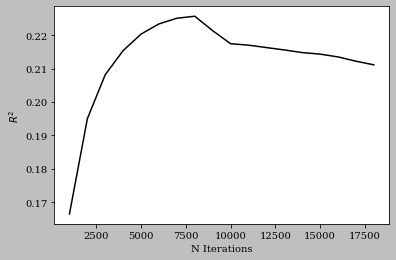

    n_iterations  layer_size  learning_rate   r2valid
90          9000           5          0.001  0.204241
6           7000          10          0.001  0.218225
91          9000          15          0.001  0.221411
67          7000          20          0.001  0.221129
76          8000          25          0.001  0.221266
77          8000          30          0.001  0.225672
86          8000          35          0.001  0.222847
71          7000          40          0.001  0.218557
88          8000          45          0.001  0.220962
89          8000          50          0.001  0.225746


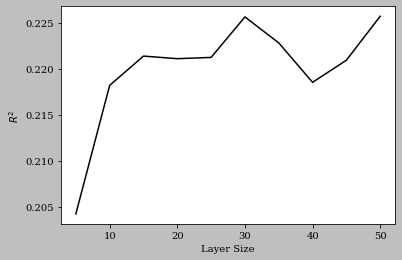

    n_iterations  layer_size  learning_rate   r2valid
89          8000          50          0.001  0.225746


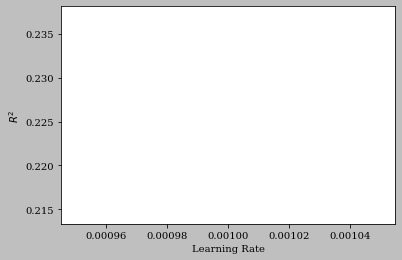

In [197]:
# Without years FE
cs.plot_cv(specparam_basic, 'nn', suffix='_post2004', yfe=False)

In [56]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
opt_basic = {'n_iterations': 7000, 'layer_size': 10, 'learning_rate': 1e-3, 'verbose': 1} # 04-20-2021 (learning_rate=1e-3)

    n_iterations  layer_size  learning_rate   r2valid
0           1000          10          0.001  0.163598
1           2000          10          0.001  0.211311
2           3000          10          0.001  0.225405
3           4000          10          0.001  0.233402
4           5000          10          0.001  0.235080
5           6000          10          0.001  0.236818
6           7000          10          0.001  0.233637
7           8000          10          0.001  0.228466
8           9000          10          0.001  0.222788
9          10000          10          0.001  0.210678
10         11000          10          0.001  0.204101
11         12000          10          0.001  0.199452
12         13000          10          0.001  0.193561


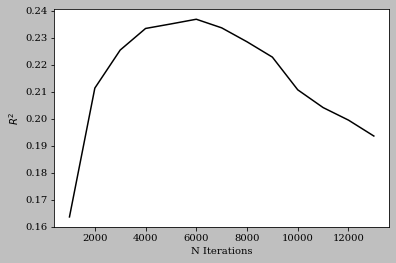

   n_iterations  layer_size  learning_rate   r2valid
5          6000          10          0.001  0.236818


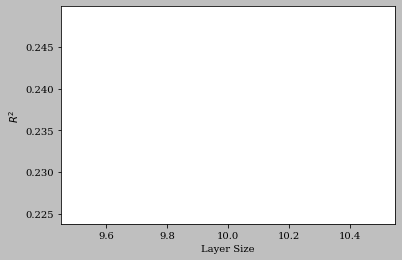

   n_iterations  layer_size  learning_rate   r2valid
5          6000          10          0.001  0.236818


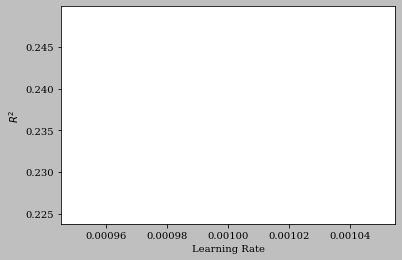

In [44]:
# With years FE
cs.plot_cv(specparam_basic, 'nn', suffix='_post2004', yfe=True)

In [57]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
opt_basic_yfe = {'n_iterations': 6000, 'layer_size': 10, 'learning_rate': 1e-3, 'verbose': 1} # 04-20-2021 (learning_rate=1e-3)

#### KW specification

    n_iterations  layer_size  learning_rate   r2valid
68          1000          40          0.001  0.470847
73          2000          40          0.001  0.505985
77          3000          35          0.001  0.523688
82          4000          35          0.001  0.534714
45          5000          25          0.001  0.539940
59          6000          25          0.001  0.544649
60          7000          25          0.001  0.544027
61          8000          25          0.001  0.538349
62          9000          25          0.001  0.535614
63         10000          25          0.001  0.531613
64         11000          25          0.001  0.522268
11         12000          10          0.001  0.518026
12         13000          10          0.001  0.519241
13         14000          10          0.001  0.511524
14         15000          10          0.001  0.505234
15         16000          10          0.001  0.490213
16         17000          10          0.001  0.453871
17         18000          10

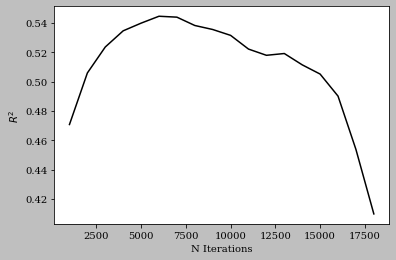

     n_iterations  layer_size  learning_rate   r2valid
120         11000           5          0.001  0.517107
7            8000          10          0.001  0.537171
90           7000          15          0.001  0.527642
91           7000          20          0.001  0.529731
59           6000          25          0.001  0.544649
35           6000          30          0.001  0.532346
46           5000          35          0.001  0.535193
83           4000          40          0.001  0.516208
48           5000          45          0.001  0.524798
21           4000          50          0.001  0.534338
49           5000          55          0.001  0.516607
50           5000          60          0.001  0.500475
51           5000          65          0.001  0.532597
52           5000          70          0.001  0.520661
53           5000          75          0.001  0.531824
54           5000          80          0.001  0.534959


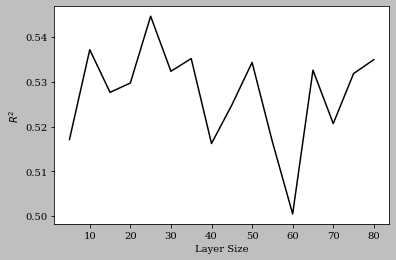

    n_iterations  layer_size  learning_rate   r2valid
59          6000          25          0.001  0.544649


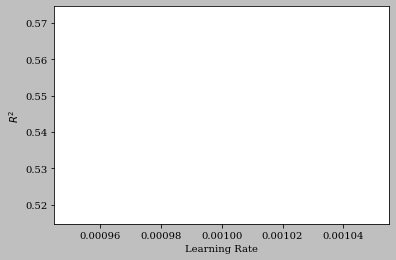

In [198]:
# Without years FE
cs.plot_cv(specparam_kw, 'nn', suffix='_post2004', yfe=False)#, params={'layer_size': 5})

In [186]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
opt_kw = {'n_iterations': 6000, 'layer_size': 25, 'learning_rate': 1e-3, 'verbose': 1} # 04-20-2021 (learning_rate=1e-3)

   n_iterations  layer_size  learning_rate   r2valid
0          1000          10          0.001  0.349063
1          2000          10          0.001  0.471583
2          3000          10          0.001  0.496589
3          4000          10          0.001  0.469705
4          5000          10          0.001  0.477645
5          6000          10          0.001  0.476224
6          7000          10          0.001  0.457205
7          8000          10          0.001  0.219264
8          9000          10          0.001 -0.312298
9         10000          10          0.001 -1.159782


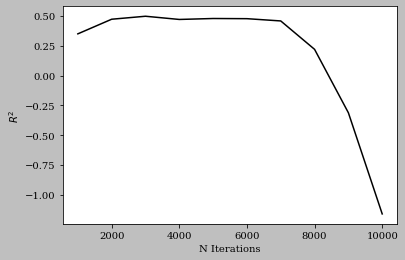

   n_iterations  layer_size  learning_rate   r2valid
2          3000          10          0.001  0.496589


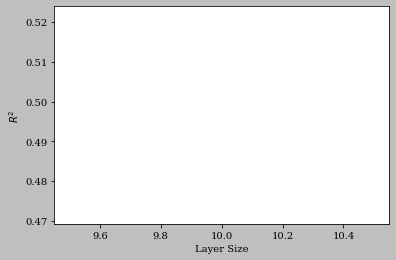

   n_iterations  layer_size  learning_rate   r2valid
2          3000          10          0.001  0.496589


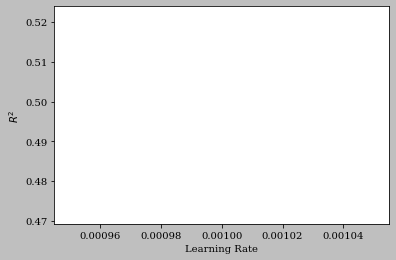

In [55]:
# With years FE
cs.plot_cv(specparam_kw, 'nn', suffix='_post2004', yfe=True)

In [59]:
##### MAKE A CHOICE FOR HYPERPARAMETERS #####
opt_kw_yfe = {'n_iterations': 3000, 'layer_size': 10, 'learning_rate': 1e-3, 'verbose': 1} # 04-20-2021 (learning_rate=1e-3)

### Training

In [60]:
##### Linear Models #####
recompute = True
suffix = '_post2004'
# Train the models
L_basic_train, L_r2_basic_train = cs.train_linear(data, specparam_basic, fullsample=False, recompute=recompute, suffix=suffix)
L_basic, L_r2_basic= cs.train_linear(data, specparam_basic, fullsample=True, recompute=recompute, suffix=suffix)
L_kw_train, L_r2_kw_train = cs.train_linear(data, specparam_kw, fullsample=False, recompute=recompute, suffix=suffix)
L_kw, L_r2_kw= cs.train_linear(data, specparam_kw, fullsample=True, recompute=recompute, suffix=suffix)
print("##### R2 Training #####")
print('Basic: ', L_r2_basic_train)
print('KW: ', L_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', L_r2_basic)
print('KW: ', L_r2_kw)

##### R2 Training #####
Basic:  {'train': 0.16110420054497676, 'test': 0.18029054412249634}
KW:  {'train': 0.39667448222505886, 'test': 0.4103000159433169}
##### R2 Full #####
Basic:  {'full': 0.16503278506809071}
KW:  {'full': 0.39995009403298987}


In [61]:
##### Fama-MacBeth Models #####
suffix = '_post2004'
# On Training Samples
cs.compute_fm_linear(data, specparam_basic, suffix=suffix)
cs.compute_fm_linear(data, specparam_kw, suffix=suffix)
# On Full Samples
cs.compute_fm_linear(data, specparam_basic, fullsample=True, suffix=suffix)
cs.compute_fm_linear(data, specparam_kw, fullsample=True, suffix=suffix)

In [62]:
##### FM Yearly #####
Lfmy_r2_basic_train = cs.r2_fmy(data, specparam_basic, fullsample=False, suffix=suffix)
Lfmy_r2_basic = cs.r2_fmy(data, specparam_basic, fullsample=True, suffix=suffix)
Lfmy_r2_kw_train = cs.r2_fmy(data, specparam_kw, fullsample=False, suffix=suffix)
Lfmy_r2_kw = cs.r2_fmy(data, specparam_kw, fullsample=True, suffix=suffix)
print("##### R2 Training #####")
print('Basic: ', Lfmy_r2_basic_train)
print('KW: ', Lfmy_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', Lfmy_r2_basic)
print('KW: ', Lfmy_r2_kw)

##### R2 Training #####
Basic:  {'train': 0.23120879898269964, 'test': 0.23166357060643183}
KW:  {'train': 0.47807265553860756, 'test': 0.4429558183963711}
##### R2 Full #####
Basic:  {'full': 0.23314911179157316}
KW:  {'full': 0.4759753683990654}


In [187]:
##### NN Without Years FE #####
recompute = True
suffix = '_post2004'

print("#### Train for specification 'basic' #####")
print(opt_basic)
print('Training Sample')
#_, NN_r2_basic_train = cs.train_nn(data, specparam_basic, cv=False, fullsample=False, params=opt_basic, recompute=recompute, yfe=False, suffix=suffix)
print('Full Sample')
#NN_basic, NN_r2_basic = cs.train_nn(data, specparam_basic, cv=False, fullsample=True, params=opt_basic, recompute=recompute, yfe=False, suffix=suffix)
print("#### Train for specification 'kw' #####")
print(opt_kw)
print('Training Sample')
_, NN_r2_kw_train = cs.train_nn(data, specparam_kw, cv=False, fullsample=False, params=opt_kw, recompute=recompute, yfe=False, suffix=suffix)
print('Full Sample')
NN_kw, NN_r2_kw = cs.train_nn(data, specparam_kw, cv=False, fullsample=True, params=opt_kw, recompute=recompute, yfe=False, suffix=suffix)

print("##### R2 Training #####")
print('Basic: ', NN_r2_basic_train)
print('KW: ', NN_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', NN_r2_basic)
print('KW: ', NN_r2_kw)

#### Train for specification 'basic' #####
{'n_iterations': 7000, 'layer_size': 10, 'learning_rate': 0.001, 'verbose': 1}
Training Sample
Full Sample
#### Train for specification 'kw' #####
{'n_iterations': 6000, 'layer_size': 25, 'learning_rate': 0.001, 'verbose': 1}
Training Sample
Full Sample
##### R2 Training #####
Basic:  {'train': 0.22773438692092896, 'test': 0.23518884181976318}
KW:  {'train': 0.557210773229599, 'test': 0.5560092926025391}
##### R2 Full #####
Basic:  {'full': 0.22881734371185303}
KW:  {'full': 0.5616129636764526}


In [64]:
##### NN With Years FE #####
recompute = True
suffix = '_post2004'

print("#### Train for specification 'basic' #####")
print(opt_basic_yfe)
print('Training Sample')
_, NNy_r2_basic_train = cs.train_nn(data, specparam_basic, cv=False, fullsample=False, params=opt_basic_yfe, recompute=recompute, yfe=True, suffix=suffix)
print('Full Sample')
NNy_basic, NNy_r2_basic = cs.train_nn(data, specparam_basic, cv=False, fullsample=True, params=opt_basic_yfe, recompute=recompute, yfe=True, suffix=suffix)
print("#### Train for specification 'kw' #####")
print(opt_kw_yfe)
print('Training Sample')
_, NNy_r2_kw_train = cs.train_nn(data, specparam_kw, cv=False, fullsample=False, params=opt_kw_yfe, recompute=recompute, yfe=True, suffix=suffix)
print('Full Sample')
NNy_kw, NNy_r2_kw = cs.train_nn(data, specparam_kw, cv=False, fullsample=True, params=opt_kw_yfe, recompute=recompute, yfe=True, suffix=suffix)

print("##### R2 Training #####")
print('Basic: ', NNy_r2_basic_train)
print('KW: ', NNy_r2_kw_train)
print("##### R2 Full #####")
print('Basic: ', NNy_r2_basic)
print('KW: ', NNy_r2_kw)

#### Train for specification 'basic' #####
{'n_iterations': 6000, 'layer_size': 10, 'learning_rate': 0.001, 'verbose': 1}
Training Sample
Full Sample
#### Train for specification 'kw' #####
{'n_iterations': 3000, 'layer_size': 10, 'learning_rate': 0.001, 'verbose': 1}
Training Sample
Full Sample
##### R2 Training #####
Basic:  {'train': 0.2845917344093323, 'test': 0.27487027645111084}
KW:  {'train': 0.5207687318325043, 'test': 0.5116255581378937}
##### R2 Full #####
Basic:  {'full': 0.2849200367927551}
KW:  {'full': 0.5267076194286346}


### Compute

In [188]:
suffix = '_post2004'
# Compute the C Scores
data['c_L_basic'] = cs.c(L_basic, data, specparam_basic)
data['c_L_kw'] = cs.c(L_kw, data, specparam_kw)
data['c_Lfmy_basic'] = cs.c_score_fmy(data, specparam_basic, fullsample=True, suffix=suffix)
data['c_Lfmy_kw'] = cs.c_score_fmy(data, specparam_kw, fullsample=True, suffix=suffix)
data['c_NN_basic'] = cs.c_score_nn(NN_basic, data, specparam_basic, yfe=False)
data['c_NN_kw'] = cs.c_score_nn(NN_kw, data, specparam_kw, yfe=False)
data['c_NNy_basic'] = cs.c_score_nn(NNy_basic, data, specparam_basic, yfe=True)
data['c_NNy_kw'] = cs.c_score_nn(NNy_kw, data, specparam_kw, yfe=True)
# Compute the G Scores
data['g_L_basic'] = cs.g(L_basic, data, specparam_basic)
data['g_L_kw'] = cs.g(L_kw, data, specparam_kw)
data['g_Lfmy_basic'] = cs.g_score_fmy(data, specparam_basic, fullsample=True, suffix=suffix)
data['g_Lfmy_kw'] = cs.g_score_fmy(data, specparam_kw, fullsample=True, suffix=suffix)
data['g_NN_basic'] = cs.g_score_nn(NN_basic, data, specparam_basic, yfe=False)
data['g_NN_kw'] = cs.g_score_nn(NN_kw, data, specparam_kw, yfe=False)
data['g_NNy_basic'] = cs.g_score_nn(NNy_basic, data, specparam_basic, yfe=True)
data['g_NNy_kw'] = cs.g_score_nn(NNy_kw, data, specparam_kw, yfe=True)
# Compute G+C Scores
data['gc_L_basic'] = data.g_L_basic + data.c_L_basic
data['gc_L_kw'] = data.g_L_kw + data.c_L_kw
data['gc_Lfmy_basic'] = data.g_Lfmy_basic + data.c_Lfmy_basic
data['gc_Lfmy_kw'] = data.g_Lfmy_kw + data.c_Lfmy_kw
data['gc_NN_basic'] = data.g_NN_basic + data.c_NN_basic
data['gc_NN_kw'] = data.g_NN_kw + data.c_NN_kw
data['gc_NNy_basic'] = data.g_NNy_basic + data.c_NNy_basic
data['gc_NNy_kw'] = data.g_NNy_kw + data.c_NNy_kw

### Fit

In [189]:
models1 = {'train_models': [L_r2_basic_train, Lfmy_r2_basic_train, NN_r2_basic_train, NNy_r2_basic_train],
          'full_models': [L_r2_basic, Lfmy_r2_basic, NN_r2_basic, NNy_r2_basic]}
models2 = {'train_models': [L_r2_kw_train, Lfmy_r2_kw_train, NN_r2_kw_train, NNy_r2_kw_train],
          'full_models': [L_r2_kw, Lfmy_r2_kw, NN_r2_kw, NNy_r2_kw]}

labels1 = ['L1', 'L1y', 'MLC1', 'MLC1y']
labels2 = ['L2', 'L2y', 'MLC2', 'MLC2y']

In [190]:
cs.fit_table(models1, labels1, suffix='1_post2004')

L1       L1y      MLC1     MLC1y
Training Sample  0.161104  0.231209  0.227734  0.284592
Test Sample      0.180291  0.231664  0.235189  0.274870
Full Sample      0.165033  0.233149  0.228817  0.284920

In [191]:
cs.fit_table(models2, labels2, suffix='2_post2004')

L2       L2y      MLC2     MLC2y
Training Sample  0.396674  0.478073  0.557211  0.520769
Test Sample      0.410300  0.442956  0.556009  0.511626
Full Sample      0.399950  0.475975  0.561613  0.526708

### Time Trends

In [291]:
estimator = 'mean'
ci = 'sd'
#ci = None

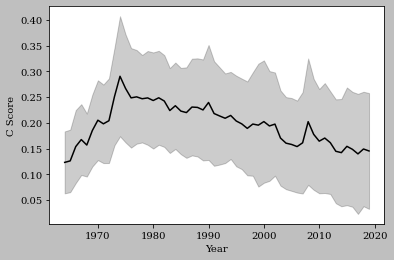

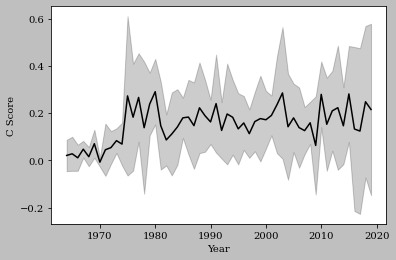

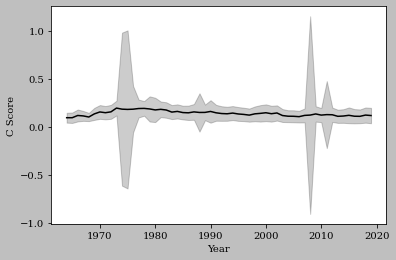

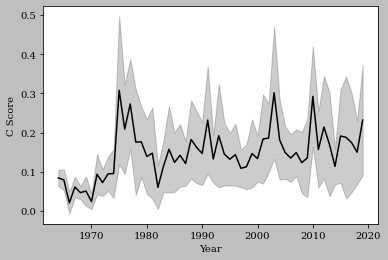

In [292]:
# Basic specification
cs.plot_time(data, specparam_basic, 'c_L', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_basic, 'c_Lfmy', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_basic, 'c_NN', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_basic, 'c_NNy', estimator=estimator, ci=ci)

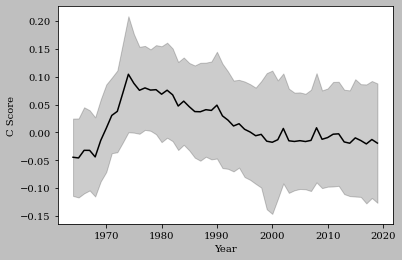

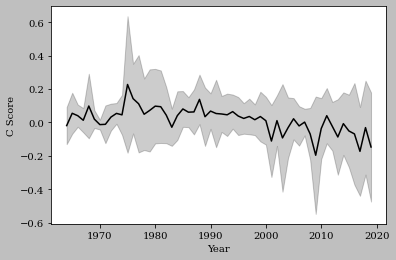

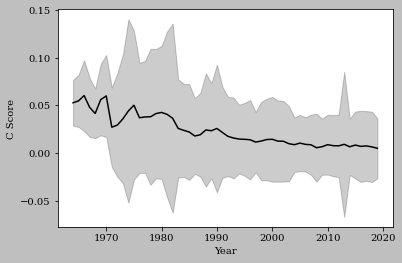

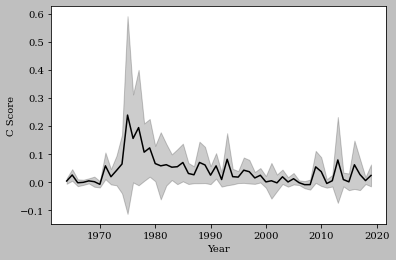

In [293]:
# KW specification
cs.plot_time(data, specparam_kw, 'c_L', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_kw, 'c_Lfmy', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_kw, 'c_NN', estimator=estimator, ci=ci)
cs.plot_time(data, specparam_kw, 'c_NNy', estimator=estimator, ci=ci)

### Plots

In [194]:
# Number of points to consider for the plots
nq = 20
xlim=None

#### Linear

##### Plot for x:logeq, y:c_L_basic #####


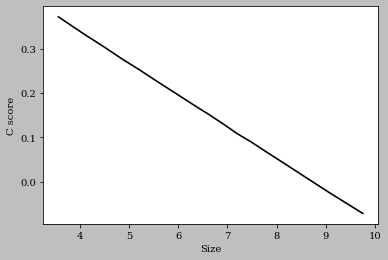

##### Plot for x:logeqdef, y:c_L_basic #####


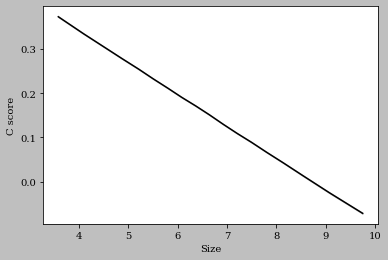

##### Plot for x:m_b, y:c_L_basic #####


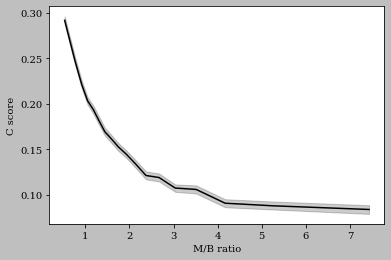

##### Plot for x:flev, y:c_L_basic #####


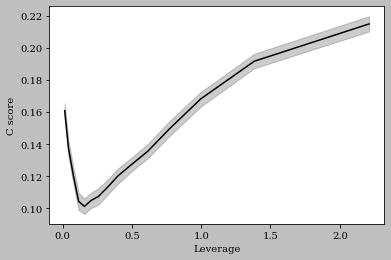

##### Plot for x:yvolatd, y:c_L_basic #####


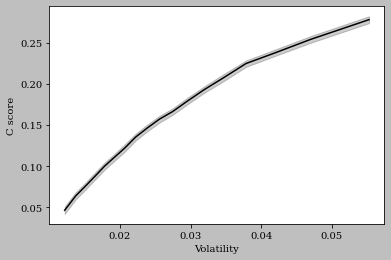

##### Plot for x:noacc, y:c_L_basic #####


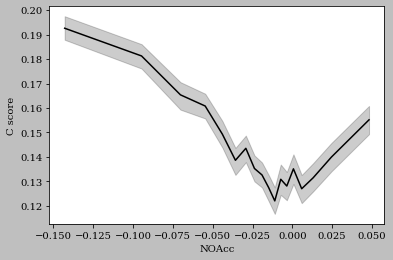

##### Plot for x:cfoa, y:c_L_basic #####


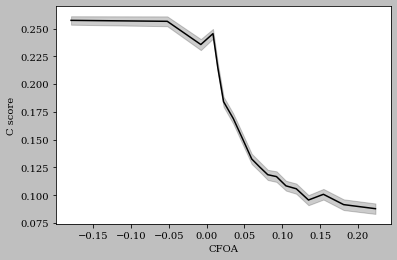

##### Plot for x:invcycle, y:c_L_basic #####


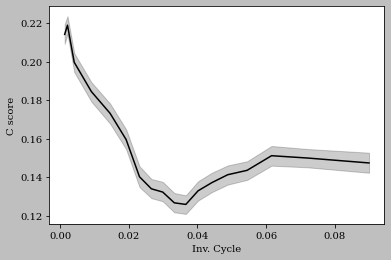

##### Plot for x:age, y:c_L_basic #####


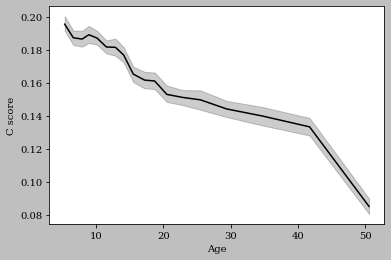

##### Plot for x:problit, y:c_L_basic #####


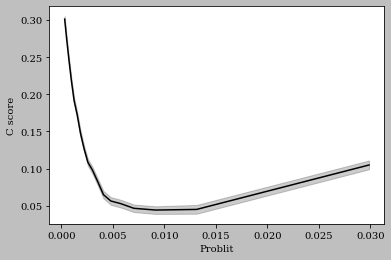

##### Plot for x:pin, y:c_L_basic #####


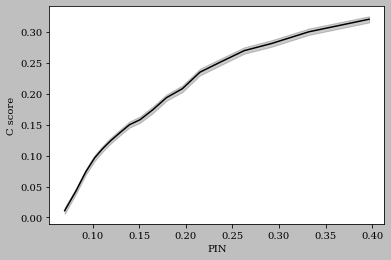

##### Plot for x:dbas, y:c_L_basic #####


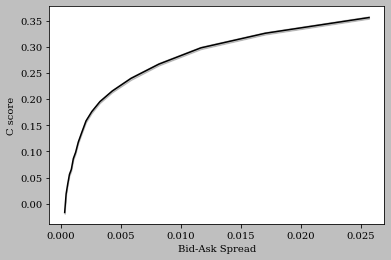

##### Plot for x:logeq, y:c_L_kw #####


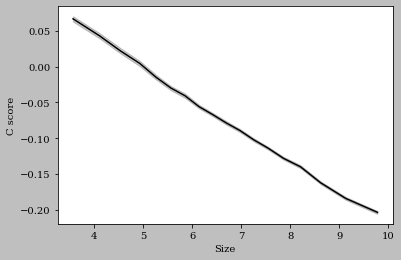

##### Plot for x:logeqdef, y:c_L_kw #####


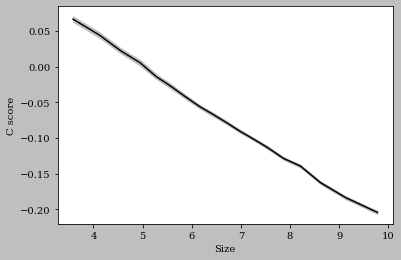

##### Plot for x:m_b, y:c_L_kw #####


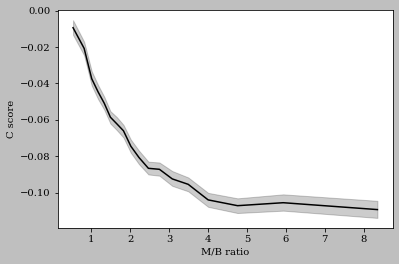

##### Plot for x:flev, y:c_L_kw #####


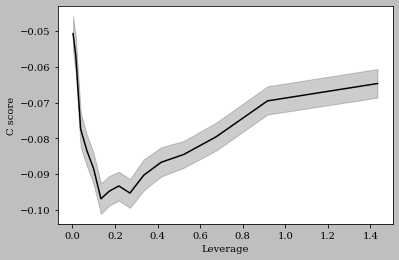

##### Plot for x:yvolatd, y:c_L_kw #####


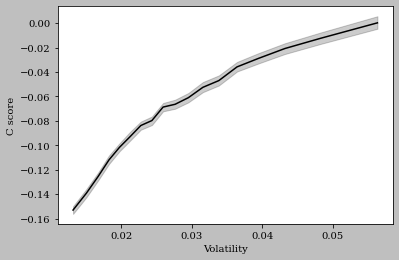

##### Plot for x:noacc, y:c_L_kw #####


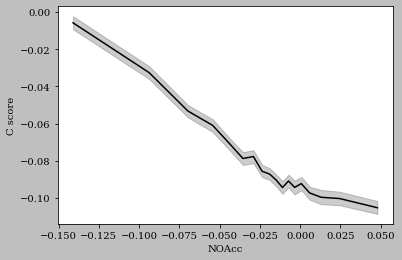

##### Plot for x:cfoa, y:c_L_kw #####


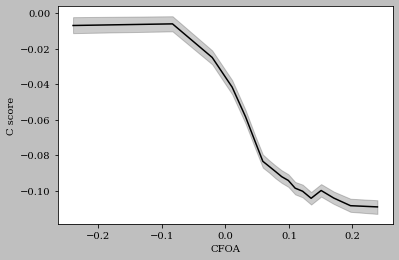

##### Plot for x:invcycle, y:c_L_kw #####


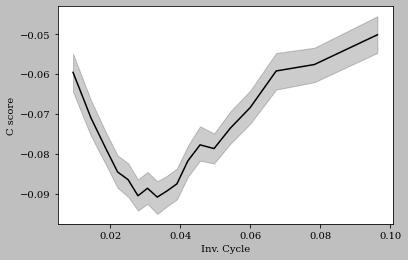

##### Plot for x:age, y:c_L_kw #####


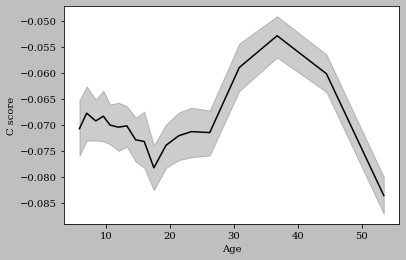

##### Plot for x:problit, y:c_L_kw #####


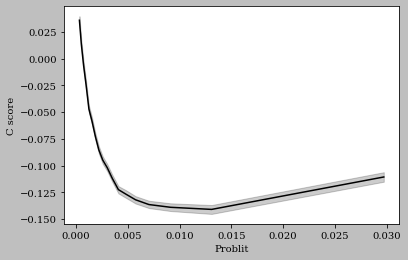

##### Plot for x:pin, y:c_L_kw #####


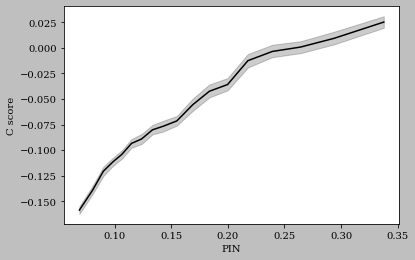

##### Plot for x:dbas, y:c_L_kw #####


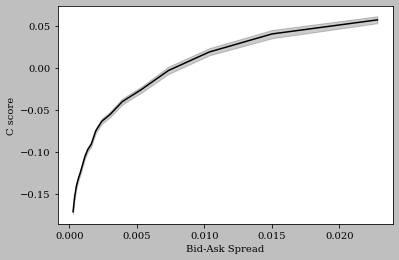

In [112]:
# Basic
cs.plot_all_vars('c_L_basic', data, specparam_basic, nq=nq, quantiles=True, xlim=xlim, sample='full')
# KW
cs.plot_all_vars('c_L_kw', data, specparam_kw, nq=nq, quantiles=True, xlim=xlim, sample='full')

#### FM Yearly

##### Plot for x:logeq, y:c_Lfmy_basic #####


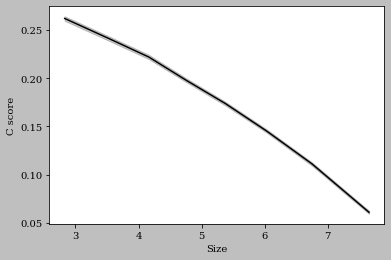

##### Plot for x:logeqdef, y:c_Lfmy_basic #####


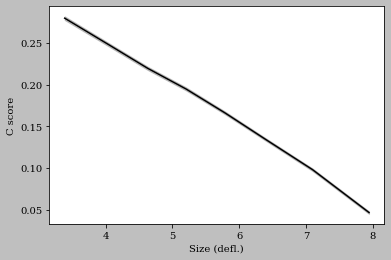

##### Plot for x:m_b, y:c_Lfmy_basic #####


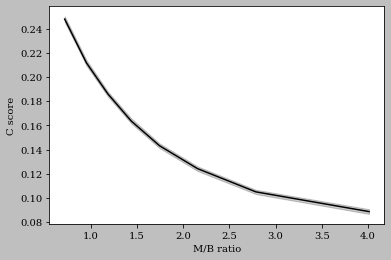

##### Plot for x:flev, y:c_Lfmy_basic #####


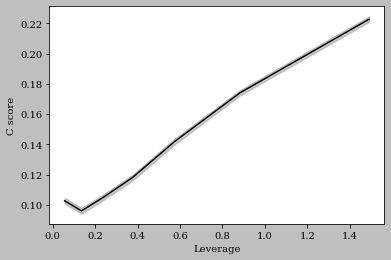

##### Plot for x:yvolatd, y:c_Lfmy_basic #####


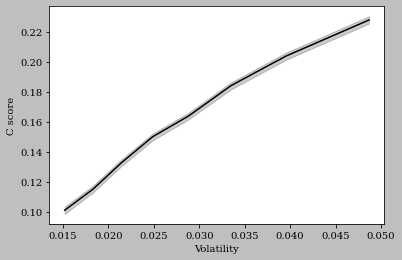

##### Plot for x:noacc, y:c_Lfmy_basic #####


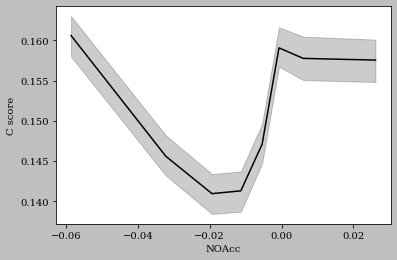

##### Plot for x:cfoa, y:c_Lfmy_basic #####


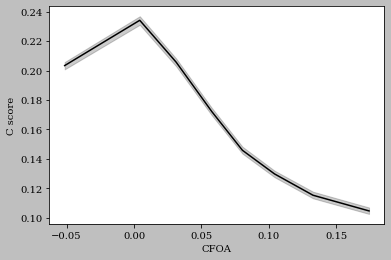

##### Plot for x:invcycle, y:c_Lfmy_basic #####


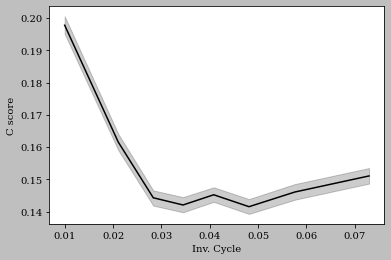

##### Plot for x:age, y:c_Lfmy_basic #####


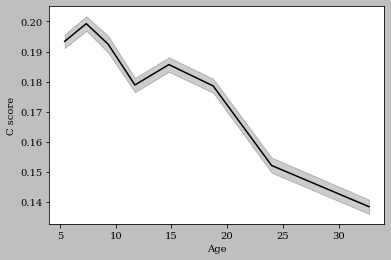

##### Plot for x:problit, y:c_Lfmy_basic #####


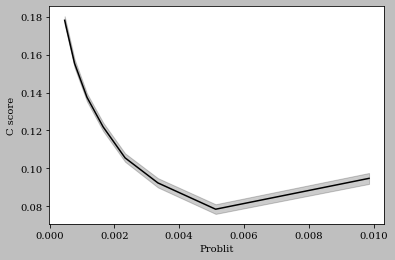

##### Plot for x:pin, y:c_Lfmy_basic #####


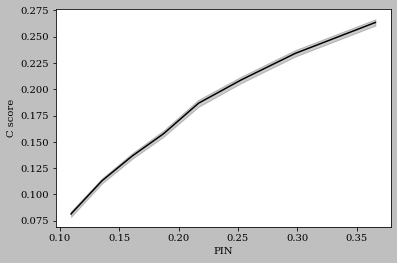

##### Plot for x:dbas, y:c_Lfmy_basic #####


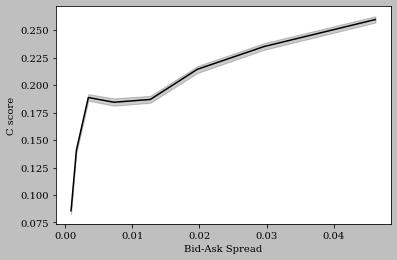

##### Plot for x:logeq, y:c_Lfmy_kw #####


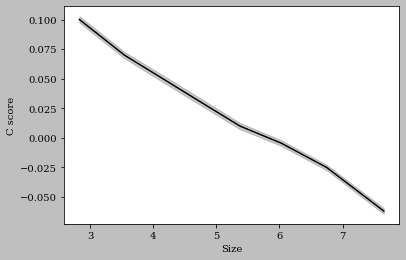

##### Plot for x:logeqdef, y:c_Lfmy_kw #####


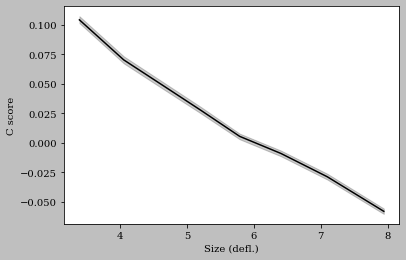

##### Plot for x:m_b, y:c_Lfmy_kw #####


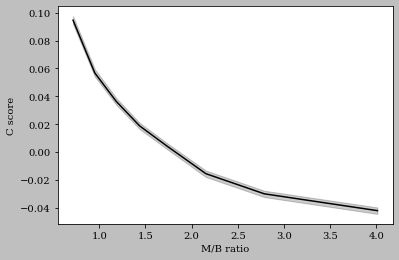

##### Plot for x:flev, y:c_Lfmy_kw #####


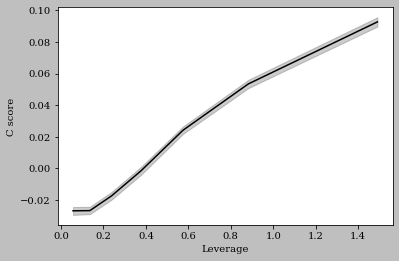

##### Plot for x:yvolatd, y:c_Lfmy_kw #####


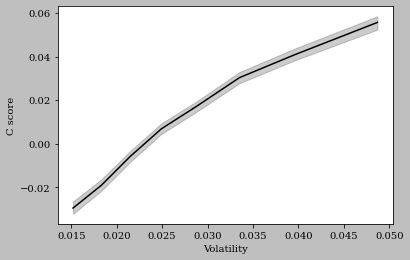

##### Plot for x:noacc, y:c_Lfmy_kw #####


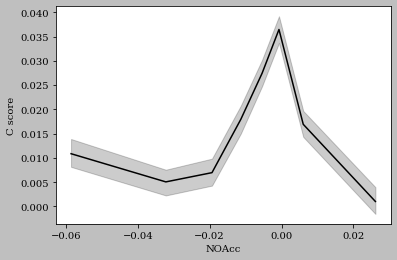

##### Plot for x:cfoa, y:c_Lfmy_kw #####


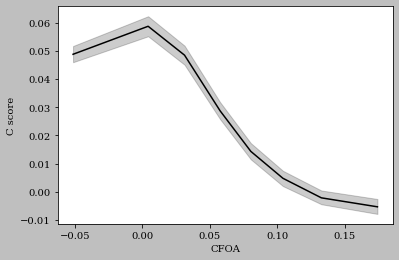

##### Plot for x:invcycle, y:c_Lfmy_kw #####


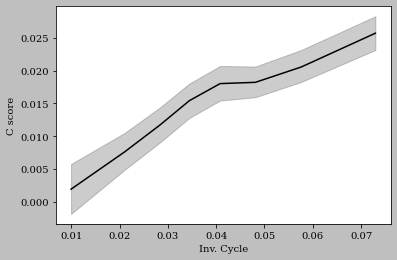

##### Plot for x:age, y:c_Lfmy_kw #####


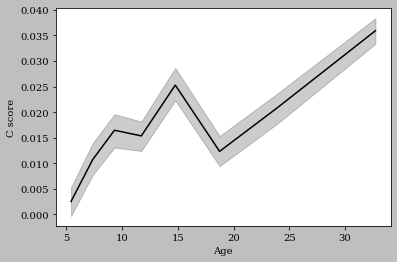

##### Plot for x:problit, y:c_Lfmy_kw #####


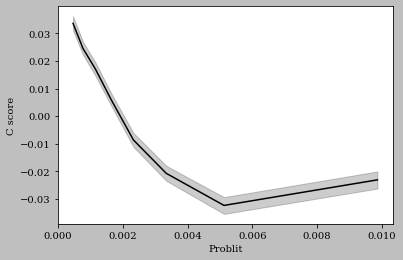

##### Plot for x:pin, y:c_Lfmy_kw #####


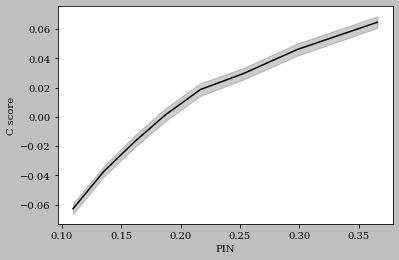

##### Plot for x:dbas, y:c_Lfmy_kw #####


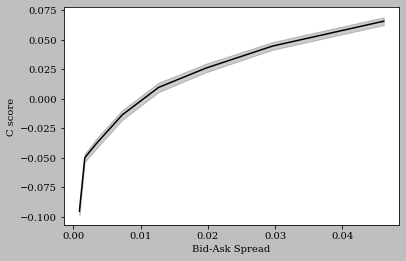

In [50]:
# Basic
cs.plot_all_vars('c_Lfmy_basic', data, specparam_basic, nq=nq, quantiles=True, xlim=xlim, sample='full')
# KW
cs.plot_all_vars('c_Lfmy_kw', data, specparam_kw, nq=nq, quantiles=True, xlim=xlim, sample='full')

#### NN without YFE

##### Plot for x:logeq, y:c_NN_basic #####


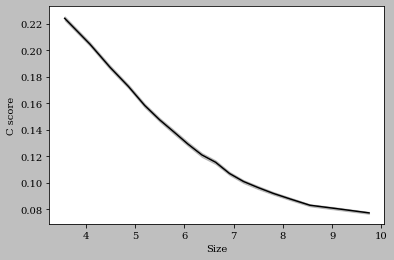

##### Plot for x:logeqdef, y:c_NN_basic #####


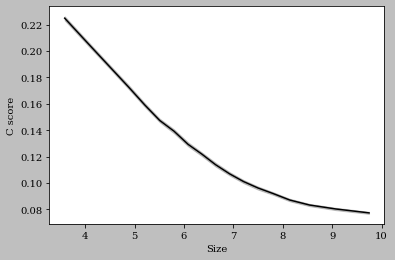

##### Plot for x:m_b, y:c_NN_basic #####


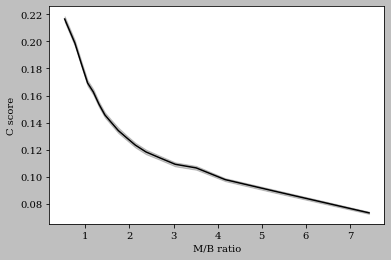

##### Plot for x:flev, y:c_NN_basic #####


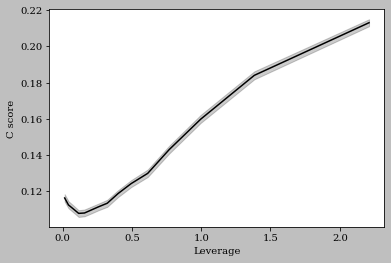

##### Plot for x:yvolatd, y:c_NN_basic #####


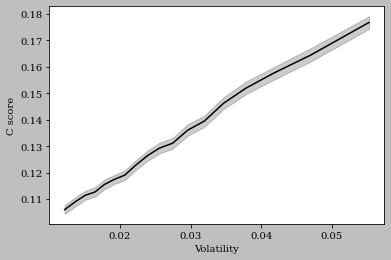

##### Plot for x:noacc, y:c_NN_basic #####


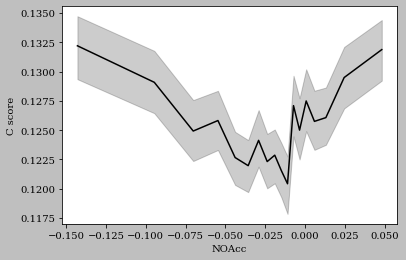

##### Plot for x:cfoa, y:c_NN_basic #####


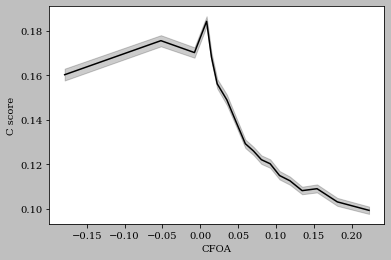

##### Plot for x:invcycle, y:c_NN_basic #####


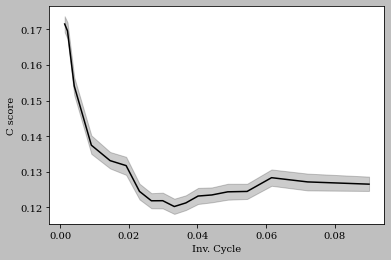

##### Plot for x:age, y:c_NN_basic #####


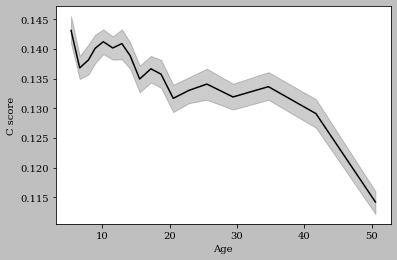

##### Plot for x:problit, y:c_NN_basic #####


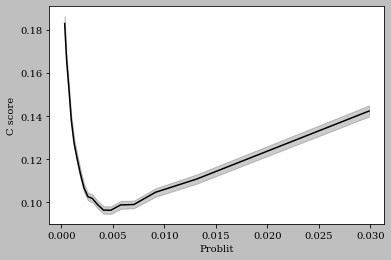

##### Plot for x:pin, y:c_NN_basic #####


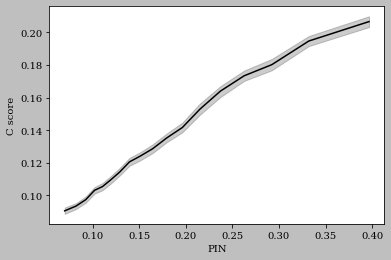

##### Plot for x:dbas, y:c_NN_basic #####


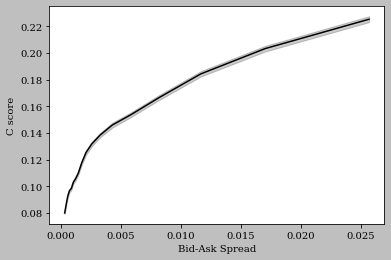

##### Plot for x:logeq, y:c_NN_kw #####


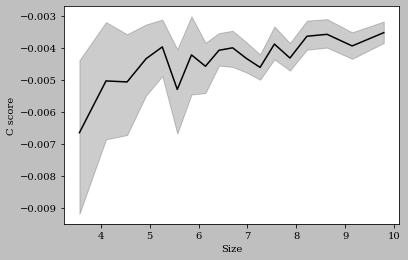

##### Plot for x:logeqdef, y:c_NN_kw #####


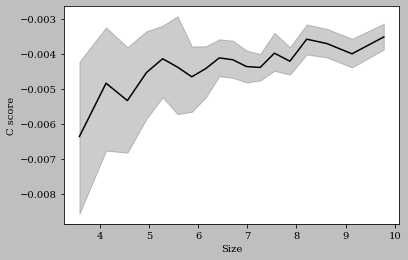

##### Plot for x:m_b, y:c_NN_kw #####


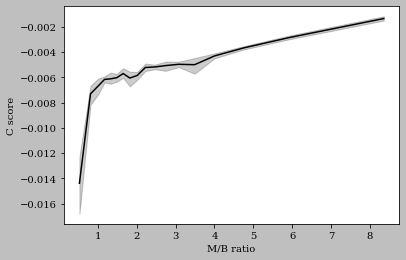

##### Plot for x:flev, y:c_NN_kw #####


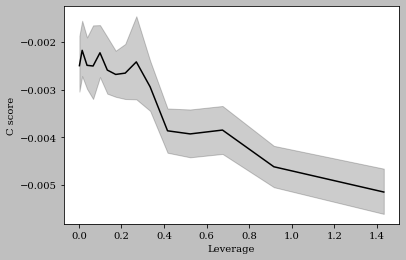

##### Plot for x:yvolatd, y:c_NN_kw #####


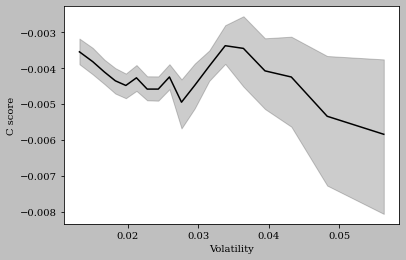

##### Plot for x:noacc, y:c_NN_kw #####


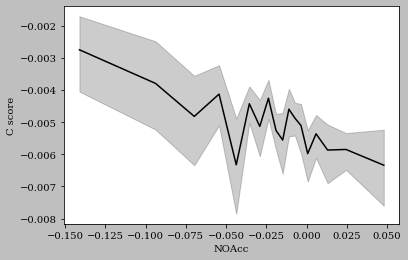

##### Plot for x:cfoa, y:c_NN_kw #####


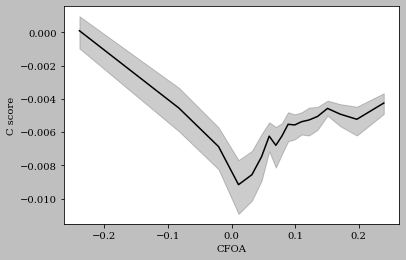

##### Plot for x:invcycle, y:c_NN_kw #####


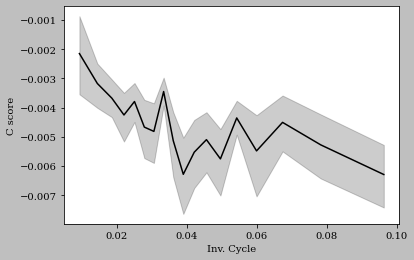

##### Plot for x:age, y:c_NN_kw #####


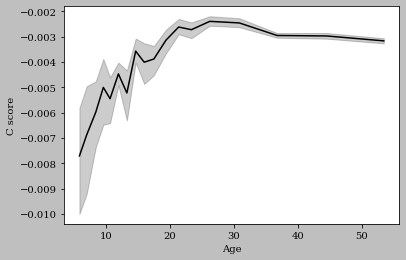

##### Plot for x:problit, y:c_NN_kw #####


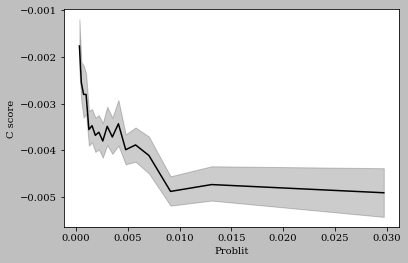

##### Plot for x:pin, y:c_NN_kw #####


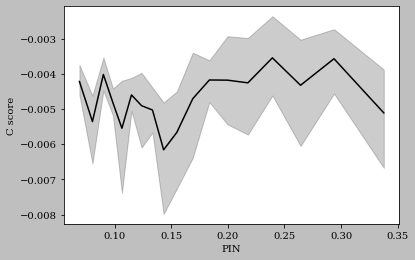

##### Plot for x:dbas, y:c_NN_kw #####


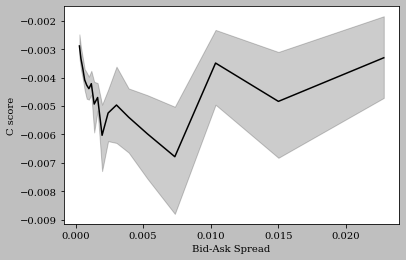

In [195]:
# Basic
cs.plot_all_vars('c_NN_basic', data, specparam_basic, nq=nq, quantiles=True, xlim=xlim, sample='full')
# KW
cs.plot_all_vars('c_NN_kw', data, specparam_kw, nq=nq, quantiles=True, xlim=xlim, sample='full')

#### NN with YFE

##### Plot for x:logeq, y:c_NNy_basic #####


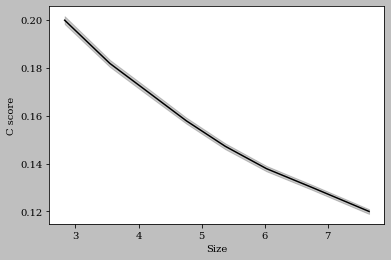

##### Plot for x:logeqdef, y:c_NNy_basic #####


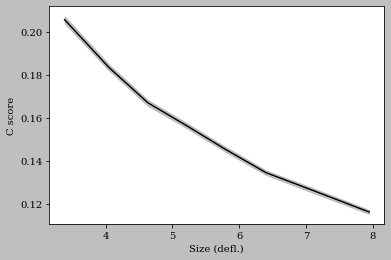

##### Plot for x:m_b, y:c_NNy_basic #####


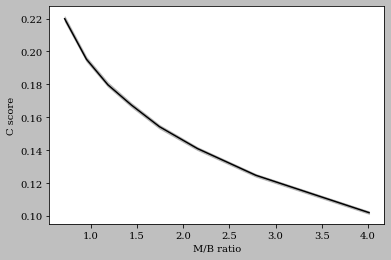

##### Plot for x:flev, y:c_NNy_basic #####


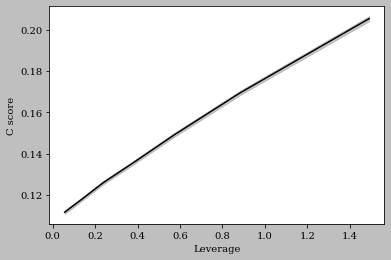

##### Plot for x:yvolatd, y:c_NNy_basic #####


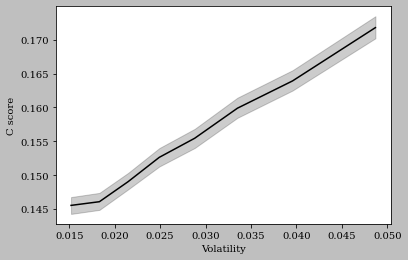

##### Plot for x:noacc, y:c_NNy_basic #####


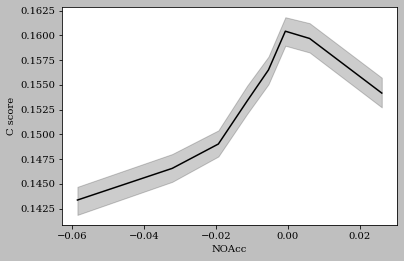

##### Plot for x:cfoa, y:c_NNy_basic #####


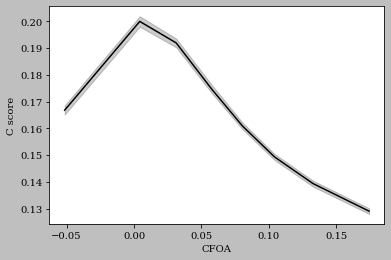

##### Plot for x:invcycle, y:c_NNy_basic #####


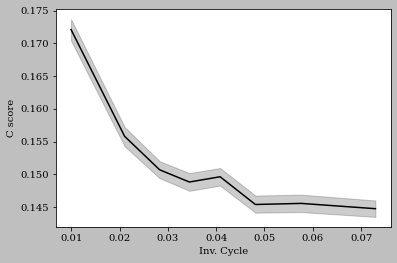

##### Plot for x:age, y:c_NNy_basic #####


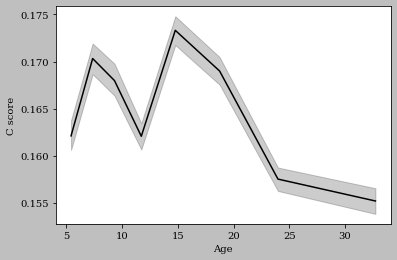

##### Plot for x:problit, y:c_NNy_basic #####


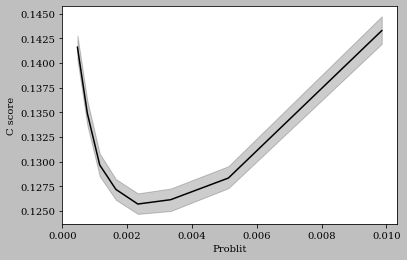

##### Plot for x:pin, y:c_NNy_basic #####


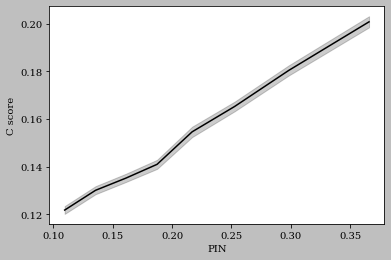

##### Plot for x:dbas, y:c_NNy_basic #####


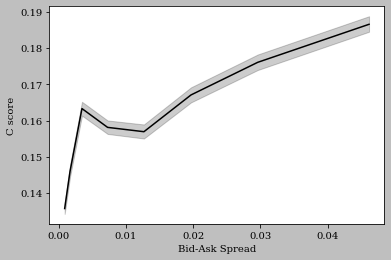

##### Plot for x:logeq, y:c_NNy_kw #####


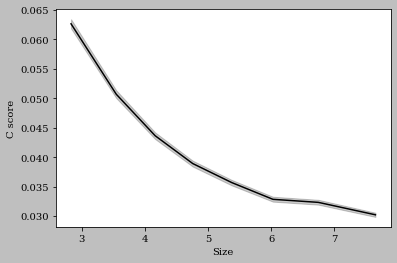

##### Plot for x:logeqdef, y:c_NNy_kw #####


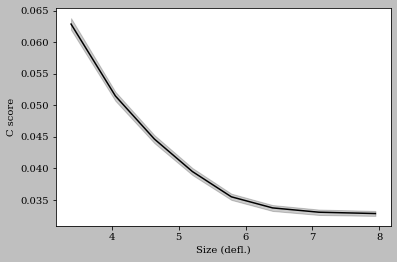

##### Plot for x:m_b, y:c_NNy_kw #####


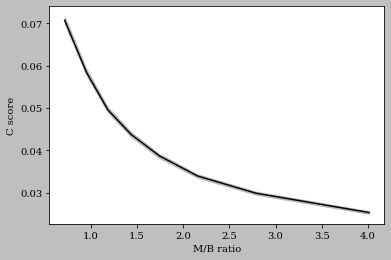

##### Plot for x:flev, y:c_NNy_kw #####


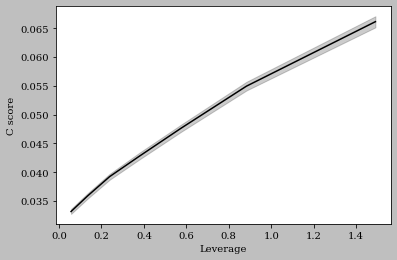

##### Plot for x:yvolatd, y:c_NNy_kw #####


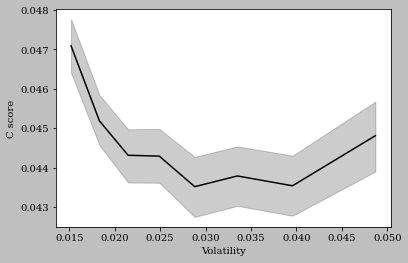

##### Plot for x:noacc, y:c_NNy_kw #####


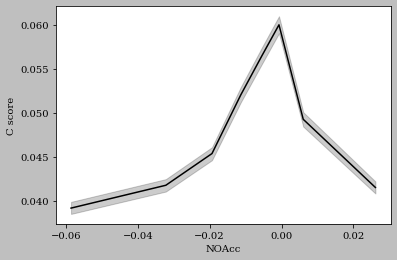

##### Plot for x:cfoa, y:c_NNy_kw #####


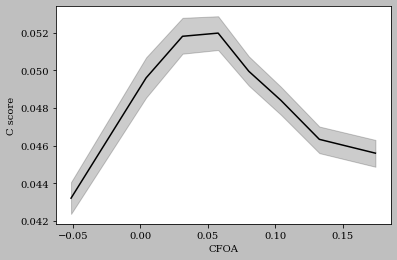

##### Plot for x:invcycle, y:c_NNy_kw #####


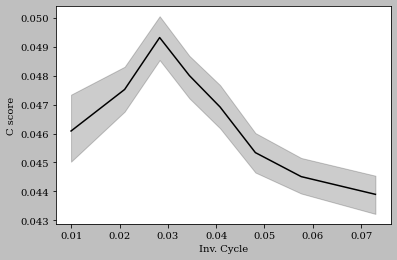

##### Plot for x:age, y:c_NNy_kw #####


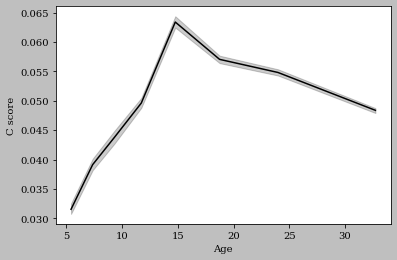

##### Plot for x:problit, y:c_NNy_kw #####


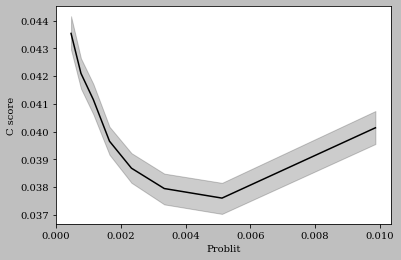

##### Plot for x:pin, y:c_NNy_kw #####


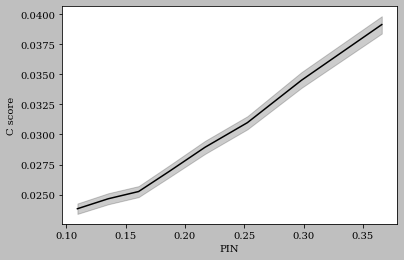

##### Plot for x:dbas, y:c_NNy_kw #####


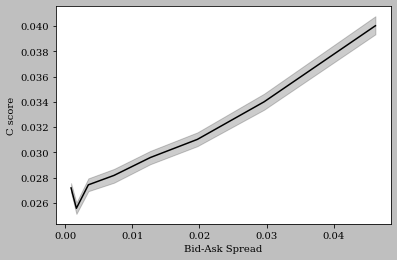

In [48]:
# Basic
cs.plot_all_vars('c_NNy_basic', data, specparam_basic, nq=nq, quantiles=True, xlim=xlim, sample='full')
# KW
cs.plot_all_vars('c_NNy_kw', data, specparam_kw, nq=nq, quantiles=True, xlim=xlim, sample='full')

### Densities

#### Linear

Basic


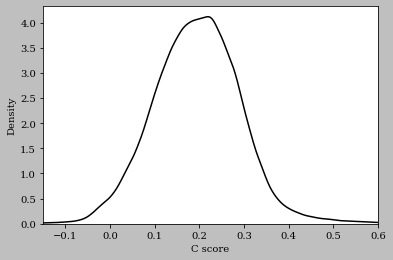

KW


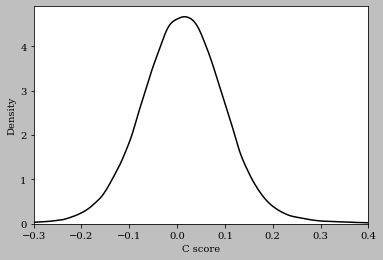

In [202]:
print('Basic')
xlim=(-0.15, 0.6)
cs.plot_score_density('c_L_basic', data, specparam_basic, sample='full', xlim=xlim)
print('KW')
xlim=(-0.3, 0.4)
cs.plot_score_density('c_L_kw', data, specparam_basic, sample='full', xlim=xlim)

#### FM Yearly

Basic


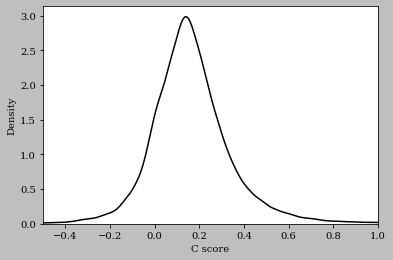

KW


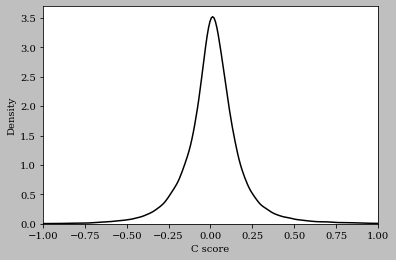

In [203]:
xlim=None
print('Basic')
xlim=(-.5, 1)
cs.plot_score_density('c_Lfmy_basic', data, specparam_basic, sample='full', xlim=xlim)
print('KW')
xlim=(-1,1)
cs.plot_score_density('c_Lfmy_kw', data, specparam_basic, sample='full', xlim=xlim)

#### NN without YFE

Basic


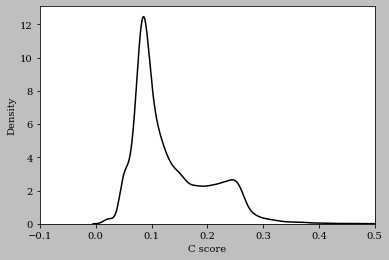

KW


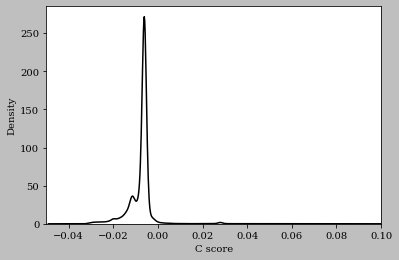

In [115]:
xlim=None
print('Basic')
xlim=(-.1, .5)
cs.plot_score_density('c_NN_basic', data, specparam_basic, sample='full', xlim=xlim)
print('KW')
xlim=(-.05, .1)
cs.plot_score_density('c_NN_kw', data, specparam_basic, sample='full', xlim=xlim)

#### NN with YFE

Basic


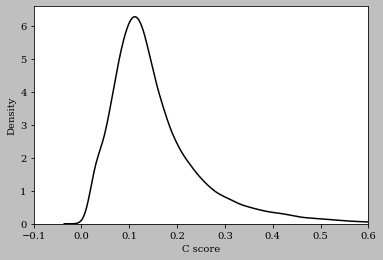

KW


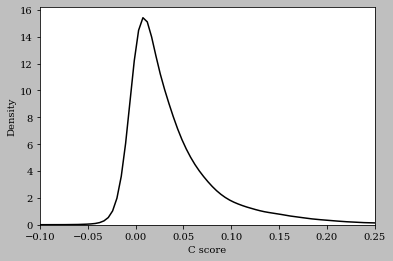

In [106]:
xlim=None
print('Basic')
xlim=(-.1, .6)
cs.plot_score_density('c_NNy_basic', data, specparam_basic, sample='full', xlim=xlim)
print('KW')
xlim=(-.1, .25)
cs.plot_score_density('c_NNy_kw', data, specparam_basic, sample='full', xlim=xlim)

### Densities of G score

#### FM Yearly

G Score


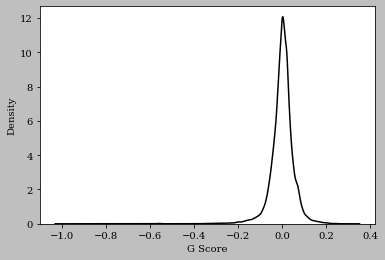

G+C Scores


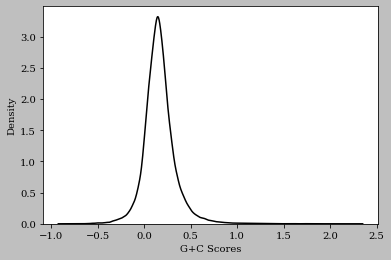

In [214]:
# Densities g and g+c scores
xlim=None
print('G Score')
#xlim=(-.4, .3)
cs.plot_score_density('g_Lfmy_basic', data, specparam_basic, sample='full', xlim=xlim, score='G Score')
print('G+C Scores')
#xlim=(-.6, 1.)
cs.plot_score_density('gc_Lfmy_basic', data, specparam_basic, sample='full', xlim=xlim, score='G+C Scores')


#### NN without YFE

G Score


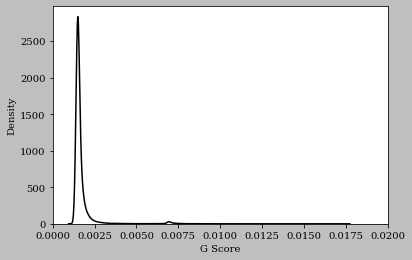

G+C Scores


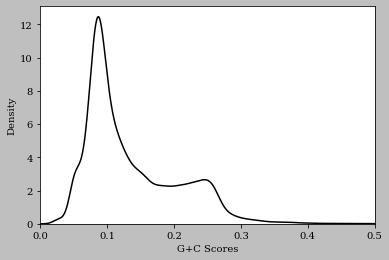

In [114]:
# Densities g and g+c scores
xlim=None
print('G Score')
xlim=(0, .02)
cs.plot_score_density('g_NN_basic', data, specparam_basic, sample='full', xlim=xlim, score='G Score')
print('G+C Scores')
xlim=(0, .5)
cs.plot_score_density('gc_NN_basic', data, specparam_basic, sample='full', xlim=xlim, score='G+C Scores')


#### NN with YFE

G Score


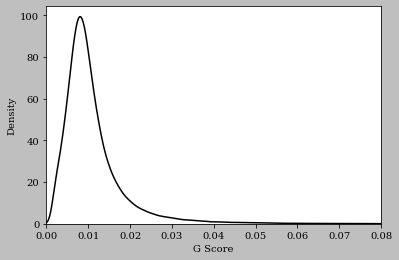

G+C Scores


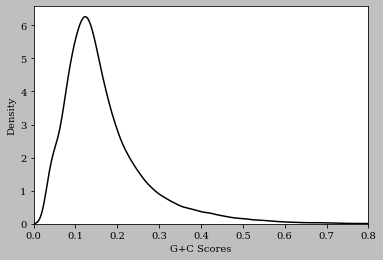

In [218]:
# Densities g and g+c scores
xlim=None
print('G Score')
xlim=(0, .08)
cs.plot_score_density('g_NNy_basic', data, specparam_basic, sample='full', xlim=xlim, score='G Score')
print('G+C Scores')
xlim=(0, .8)
cs.plot_score_density('gc_NNy_basic', data, specparam_basic, sample='full', xlim=xlim, score='G+C Scores')


# Additional Tests

## Replication KW Plots

0.016893645383450874


0.017002817123654798

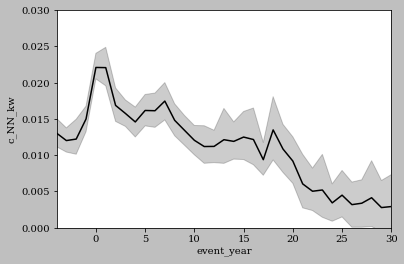

In [22]:
import matplotlib as plt
import seaborn as sns
df = data.copy()
# Compute changes in problit
df = df.sort_values(['gvkey', 'fyear'])
df['problit_lag'] = df.groupby('gvkey')['problit'].shift(1)
df['problit_ch'] = df.problit - df.problit_lag
# Identify the top 5% ('significant increase in problit')
ph = df.problit_ch.quantile(.95)
df['problit_incr'] = 0
df.loc[df.problit_ch > ph, 'problit_incr'] = 1
print(ph)
df[df.problit_incr==1][['gvkey', 'fyear', 'problit', 'problit_lag', 'problit_ch', 'problit_incr']]
# Keep the companies with only one event
gvkey_count = df[df.problit_incr==1].groupby('gvkey')['fyear'].count()
gvkeys = list(gvkey_count[gvkey_count==1].index)
df = df[df.gvkey.isin(gvkeys)]
df_year_incr = df[df.problit_incr==1][['gvkey', 'fyear']]
df_year_incr.columns = ['gvkey','year_event']
df = df.merge(df_year_incr)
df['event_year'] = df.fyear - df.year_event
df[['gvkey', 'fyear', 'problit_incr', 'year_event', 'event_year', 'c_Lfmy_basic']]
# Plot changes

cscore = 'c_Lfmy_basic'
cscore = 'c_NN_kw'
g = sns.lineplot(data=df, x='event_year', y=cscore)
g.set(xlim=(-4, 30))
g.set(ylim=(0,.03))

np.mean(data.c_Lfmy_kw)